In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [2]:
list_of_sync = []
file_path = r'C:\Users\PC\semester B project - final V444444444444444'
for file in os.listdir(file_path):
    if file.endswith('Sync.csv'):
        list_of_sync.append(os.path.join(r'C:\Users\PC\semester B project - final V444444444444444', file))

In [3]:
list_of_sync

['C:\\Users\\PC\\semester B project - final V444444444444444\\Evyatar636771053639929594Sync.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Nofar636759797397919664Sync.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Oriya636759806131350399Sync.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\OryaB636771084494502229Sync.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Revital636770957894370062Sync.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Sachar636771046527112972Sync.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Shelly636759789526313406Sync.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Yael636771060699529085Sync.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Yoel636760923490742912Sync.csv']

In [4]:
pd.set_option("display.max_columns", 50)

In [5]:
list_of_element_in_last_index = []
list_of_element_in_first_index = []
lst_of_last_index = []
df_sync = pd.DataFrame()
for file in list_of_sync:
    
    #create temp df from the csv list
    temp_df = pd.read_csv(file)
    
    # get the sec that is after 7 sec
    after_7_sec = round(temp_df['Time'][0])+7
    
    # filter condition, get all rows that 'Time column start after 'after_7_sec'
    filt = temp_df['Time'] > after_7_sec
    
    # df that start after first 7 sec 
    df_without_7 = temp_df[filt]
    df_without_7.reset_index(drop=True,inplace=True)
    df_without_7
    
    
    # **************************************
    shape_of_df = df_without_7.shape[0]
    lst_of_last_index.append(shape_of_df)                      
#     print(shape_of_df)                                       
                                                               
                                                              
                                                              
    
    list_of_element_in_first_index.append(df_without_7['Time'][0])
    list_of_element_in_last_index.append(df_without_7['Time'][shape_of_df-1])

#     print(df_without_7['Time'])
    # **************************************
    
    df_sync = pd.concat([df_sync,df_without_7])

## this is the last Time in each csv file for each person

In [6]:
list_of_element_in_last_index

[502.1996,
 681.8129,
 774.2013,
 539.5377,
 722.2589,
 548.3006,
 769.4308,
 366.0006,
 856.3295]

### the index of the last Time in each DataFrame

In [7]:
lst_of_last_index

[8234, 8188, 8219, 8152, 7583, 8238, 8262, 7985, 4102]

In [8]:
df_sync.reset_index(drop=True,inplace=True)
df_sync

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,434.0068,139851,right,2,88.97786,255.1120,16.540360,186.70610,64.81861,235.72850,0.807923,-1.533069,-0.224396,107.8167,200.2694,55.40918,260.2089,25.23613,142.77350,0.0,0.091649,0.0
1,434.0068,139851,left,2,-98.77985,263.0475,1.243820,25.97290,294.78810,18.93556,0.908295,1.526528,0.305277,-119.1429,204.1970,32.81262,-268.6581,10.17476,71.45286,0.0,0.000000,0.0
2,434.0233,139853,right,2,92.42403,254.7337,21.025710,190.51970,-34.77150,259.98610,0.838640,-1.525952,-0.233524,111.1249,198.6932,58.27766,258.9904,18.73742,143.39080,0.0,0.097160,0.0
3,434.0233,139853,left,2,-98.43199,268.1114,2.399554,28.04229,291.68330,75.63093,0.923825,1.521683,0.305795,-118.7314,208.8160,33.13684,-270.2953,16.00045,69.78494,0.0,0.000000,0.0
4,434.0403,139855,right,2,95.61993,254.1702,25.548180,175.19900,-42.24110,239.69450,0.868469,-1.524048,-0.247945,114.3713,197.0582,61.14340,259.6010,13.72502,143.54360,0.0,0.101707,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68958,856.2631,67309,right,2,101.91230,212.0264,42.535680,79.95810,113.41030,190.77140,1.065334,-1.225539,-0.574317,131.8590,149.6264,66.09853,283.6185,-58.03491,95.29868,0.0,0.000000,0.0
68959,856.2958,67311,left,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,0.459446,-109.7250,130.7078,34.03360,-295.5957,-14.97817,140.02630,0.0,0.000000,0.0
68960,856.2958,67311,right,2,103.84750,214.7484,47.070820,61.11773,95.13531,155.74530,1.110287,-1.214715,-0.612753,134.0416,151.5924,68.17693,288.9688,-54.13820,94.23959,0.0,0.000000,0.0
68961,856.3295,67314,left,2,-84.05124,187.8450,-5.172269,-57.17249,109.20360,58.48146,0.824793,1.787295,0.434273,-109.5167,131.6489,33.32945,-282.9649,-31.35462,135.07610,0.0,0.000000,0.0


In [9]:
df_sync.shape

(68963, 22)

In [10]:
df_sync.columns

Index(['Time', ' Frame ID', ' Hand Type', ' # hands', ' Position X',
       ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

In [11]:
df_sync = df_sync.rename(columns={'Time': 'Time', ' Frame ID': 'Frame_ID', ' Hand Type': 'Hand_Type',
                                  ' # hands':'Number_of_hands', ' Position X': 'Position_X', ' Position Y': 'Position_Y',
                                ' Position Z': 'Position_Z', ' Velocity X': 'Velocity_X', ' Velocity Y': 'Velocity_Y',
                                ' Velocity Z': 'Velocity_Z', ' Pitch' : 'Pitch',  ' Roll': 'Roll', ' Yaw': 'Yaw',
                                 ' Wrist Pos X': 'Wrist_Pos_X', ' Wrist Pos Y': 'Wrist_Pos_Y', ' Wrist Pos Z': 'Wrist_Pos_Z',
                                 ' Elbow pos X': 'Elbow_Pos_X',  ' Elbow Pos Y':  'Elbow_Pos_Y', ' Elbow Pos Z': 'Elbow_Pos_Z',
                                 ' Grab Strenth': 'Grab_Strenth', ' Grab Angle': 'Grab_Angle', ' Pinch Strength': 'Pinch_Strength'})

In [12]:
df_sync.head(1)

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,434.0068,139851,right,2,88.97786,255.112,16.54036,186.7061,64.81861,235.7285,0.807923,-1.533069,-0.224396,107.8167,200.2694,55.40918,260.2089,25.23613,142.7735,0.0,0.091649,0.0


In [13]:
df_sync.columns

Index(['Time', 'Frame_ID', 'Hand_Type', 'Number_of_hands', 'Position_X',
       'Position_Y', 'Position_Z', 'Velocity_X', 'Velocity_Y', 'Velocity_Z',
       'Pitch', 'Roll', 'Yaw', 'Wrist_Pos_X', 'Wrist_Pos_Y', 'Wrist_Pos_Z',
       'Elbow_Pos_X', 'Elbow_Pos_Y', 'Elbow_Pos_Z', 'Grab_Strenth',
       'Grab_Angle', 'Pinch_Strength'],
      dtype='object')

## get_dummies on 'Hand_Type'

In [14]:
df_sync = pd.get_dummies(df_sync)
df_sync

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,434.0068,139851,2,88.97786,255.1120,16.540360,186.70610,64.81861,235.72850,0.807923,-1.533069,-0.224396,107.8167,200.2694,55.40918,260.2089,25.23613,142.77350,0.0,0.091649,0.0,0,1
1,434.0068,139851,2,-98.77985,263.0475,1.243820,25.97290,294.78810,18.93556,0.908295,1.526528,0.305277,-119.1429,204.1970,32.81262,-268.6581,10.17476,71.45286,0.0,0.000000,0.0,1,0
2,434.0233,139853,2,92.42403,254.7337,21.025710,190.51970,-34.77150,259.98610,0.838640,-1.525952,-0.233524,111.1249,198.6932,58.27766,258.9904,18.73742,143.39080,0.0,0.097160,0.0,0,1
3,434.0233,139853,2,-98.43199,268.1114,2.399554,28.04229,291.68330,75.63093,0.923825,1.521683,0.305795,-118.7314,208.8160,33.13684,-270.2953,16.00045,69.78494,0.0,0.000000,0.0,1,0
4,434.0403,139855,2,95.61993,254.1702,25.548180,175.19900,-42.24110,239.69450,0.868469,-1.524048,-0.247945,114.3713,197.0582,61.14340,259.6010,13.72502,143.54360,0.0,0.101707,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68958,856.2631,67309,2,101.91230,212.0264,42.535680,79.95810,113.41030,190.77140,1.065334,-1.225539,-0.574317,131.8590,149.6264,66.09853,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0,1
68959,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,0.459446,-109.7250,130.7078,34.03360,-295.5957,-14.97817,140.02630,0.0,0.000000,0.0,1,0
68960,856.2958,67311,2,103.84750,214.7484,47.070820,61.11773,95.13531,155.74530,1.110287,-1.214715,-0.612753,134.0416,151.5924,68.17693,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0,1
68961,856.3295,67314,2,-84.05124,187.8450,-5.172269,-57.17249,109.20360,58.48146,0.824793,1.787295,0.434273,-109.5167,131.6489,33.32945,-282.9649,-31.35462,135.07610,0.0,0.000000,0.0,1,0


# Explanation of the features
- ***Time*** - the time the shoot have been made
- ***Frame_ID*** - Frame ID
- ***Hand_Type*** - How many hands were there (1/2)
- ***Position_X*** - hand position on the X axis
- ***Position_Y*** - hand position on the Y axis
- ***Position_Z*** - hand position on the Z axis
- ***Velocity_X*** - hand Velocity on the X axis
- ***Velocity_Y*** - hand Velocity on the Y axis
- ***Velocity_Z*** - hand Velocity on the Z axis
- ***Pitch*** - type of rotation the hand makes
- ***Roll*** - type of rotation the hand makes
- ***Yaw*** - type of rotation the hand makes
- ***Wrist_Pos_X*** - Wrist position on the X axis
- ***Wrist_Pos_Y*** - Wrist position on the Y axis
- ***Wrist_Pos_Z*** - Wrist position on the Z axis
- ***Elbow_pos_X*** - Elbow position on the X axis
- ***Elbow_Pos_Y*** - Elbow position on the Y axis
- ***Elbow_Pos_Z*** - Elbow position on the Z axis
- ***Grab_Strenth*** - Grab Strenth
- ***Grab_Angle*** - Is the fist open or closed (0: open, 1: closed, 0-1: can also be in between)

## As we can see there are no missing values

In [15]:
df_sync.isna().sum()

Time               0
Frame_ID           0
Number_of_hands    0
Position_X         0
Position_Y         0
Position_Z         0
Velocity_X         0
Velocity_Y         0
Velocity_Z         0
Pitch              0
Roll               0
Yaw                0
Wrist_Pos_X        0
Wrist_Pos_Y        0
Wrist_Pos_Z        0
Elbow_Pos_X        0
Elbow_Pos_Y        0
Elbow_Pos_Z        0
Grab_Strenth       0
Grab_Angle         0
Pinch_Strength     0
Hand_Type_left     0
Hand_Type_right    0
dtype: int64

In [16]:
df_sync_left = pd.DataFrame(df_sync[df_sync['Hand_Type_left'] == 1])
df_sync_right = pd.DataFrame(df_sync[df_sync['Hand_Type_right'] == 1])

In [17]:
df_sync_left

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
1,434.0068,139851,2,-98.77985,263.0475,1.243820,25.97290,294.78810,18.93556,0.908295,1.526528,0.305277,-119.1429,204.1970,32.81262,-268.6581,10.174760,71.45286,0.0,0.0,0.0,1,0
3,434.0233,139853,2,-98.43199,268.1114,2.399554,28.04229,291.68330,75.63093,0.923825,1.521683,0.305795,-118.7314,208.8160,33.13684,-270.2953,16.000450,69.78494,0.0,0.0,0.0,1,0
5,434.0403,139855,2,-97.15244,271.7866,3.736130,101.60100,161.18750,78.79465,0.940332,1.516992,0.306200,-117.3276,212.0058,33.58400,-270.0541,19.741340,68.24654,0.0,0.0,0.0,1,0
7,434.0565,139857,2,-95.41085,274.1502,5.400790,102.27600,148.79190,92.22256,0.953317,1.497453,0.332849,-116.4369,214.2107,34.37278,-269.6696,21.954820,66.77574,0.0,0.0,0.0,1,0
9,434.0730,139859,2,-93.66457,275.9866,7.074855,88.82202,136.00620,87.79492,0.968087,1.482461,0.363277,-115.5835,215.8732,35.03019,-270.2304,24.322240,64.78082,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68953,856.1965,67304,2,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,0.429763,-107.8500,127.8215,32.85250,-318.7630,20.751860,138.01250,0.0,0.0,0.0,1,0
68955,856.2291,67306,2,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,0.434664,-108.0805,128.1729,33.40391,-314.6744,14.308990,139.99090,0.0,0.0,0.0,1,0
68957,856.2631,67309,2,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,0.456099,-109.0018,129.5246,33.89856,-304.9600,-0.548136,142.01090,0.0,0.0,0.0,1,0
68959,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,0.459446,-109.7250,130.7078,34.03360,-295.5957,-14.978170,140.02630,0.0,0.0,0.0,1,0


In [18]:
df_sync_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,434.0068,139851,2,88.97786,255.1120,16.54036,186.70610,64.81861,235.7285,0.807923,-1.533069,-0.224396,107.8167,200.2694,55.40918,260.2089,25.236130,142.77350,0.0,0.091649,0.0,0,1
2,434.0233,139853,2,92.42403,254.7337,21.02571,190.51970,-34.77150,259.9861,0.838640,-1.525952,-0.233524,111.1249,198.6932,58.27766,258.9904,18.737420,143.39080,0.0,0.097160,0.0,0,1
4,434.0403,139855,2,95.61993,254.1702,25.54818,175.19900,-42.24110,239.6945,0.868469,-1.524048,-0.247945,114.3713,197.0582,61.14340,259.6010,13.725020,143.54360,0.0,0.101707,0.0,0,1
6,434.0565,139857,2,98.69880,253.5125,29.60830,185.77450,-36.56618,215.8356,0.903786,-1.523372,-0.247160,116.9383,195.1323,63.36440,260.4316,9.226142,142.99550,0.0,0.096988,0.0,0,1
8,434.0730,139859,2,102.56700,252.7335,33.88854,213.58610,-48.65784,228.5274,0.928630,-1.528881,-0.254348,120.7624,193.5770,66.23931,266.4863,8.217018,143.04280,0.0,0.087040,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68954,856.1965,67304,2,97.75611,205.9629,30.04651,28.36298,77.44335,162.1428,0.909181,-1.253298,-0.495629,129.1261,148.7041,62.82404,300.6781,-33.586720,128.75430,0.0,0.000000,0.0,0,1
68956,856.2291,67306,2,98.93275,208.3153,34.85991,44.38393,71.36857,187.5408,0.983621,-1.239014,-0.525644,129.2868,148.1146,63.11218,285.6505,-53.666400,106.02620,0.0,0.000000,0.0,0,1
68958,856.2631,67309,2,101.91230,212.0264,42.53568,79.95810,113.41030,190.7714,1.065334,-1.225539,-0.574317,131.8590,149.6264,66.09853,283.6185,-58.034910,95.29868,0.0,0.000000,0.0,0,1
68960,856.2958,67311,2,103.84750,214.7484,47.07082,61.11773,95.13531,155.7453,1.110287,-1.214715,-0.612753,134.0416,151.5924,68.17693,288.9688,-54.138200,94.23959,0.0,0.000000,0.0,0,1


# this rows is for reset the index for left and right df

In [19]:
df_sync_left.reset_index(drop=True,inplace=True)
df_sync_left

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,434.0068,139851,2,-98.77985,263.0475,1.243820,25.97290,294.78810,18.93556,0.908295,1.526528,0.305277,-119.1429,204.1970,32.81262,-268.6581,10.174760,71.45286,0.0,0.0,0.0,1,0
1,434.0233,139853,2,-98.43199,268.1114,2.399554,28.04229,291.68330,75.63093,0.923825,1.521683,0.305795,-118.7314,208.8160,33.13684,-270.2953,16.000450,69.78494,0.0,0.0,0.0,1,0
2,434.0403,139855,2,-97.15244,271.7866,3.736130,101.60100,161.18750,78.79465,0.940332,1.516992,0.306200,-117.3276,212.0058,33.58400,-270.0541,19.741340,68.24654,0.0,0.0,0.0,1,0
3,434.0565,139857,2,-95.41085,274.1502,5.400790,102.27600,148.79190,92.22256,0.953317,1.497453,0.332849,-116.4369,214.2107,34.37278,-269.6696,21.954820,66.77574,0.0,0.0,0.0,1,0
4,434.0730,139859,2,-93.66457,275.9866,7.074855,88.82202,136.00620,87.79492,0.968087,1.482461,0.363277,-115.5835,215.8732,35.03019,-270.2304,24.322240,64.78082,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34121,856.1965,67304,2,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,0.429763,-107.8500,127.8215,32.85250,-318.7630,20.751860,138.01250,0.0,0.0,0.0,1,0
34122,856.2291,67306,2,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,0.434664,-108.0805,128.1729,33.40391,-314.6744,14.308990,139.99090,0.0,0.0,0.0,1,0
34123,856.2631,67309,2,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,0.456099,-109.0018,129.5246,33.89856,-304.9600,-0.548136,142.01090,0.0,0.0,0.0,1,0
34124,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,0.459446,-109.7250,130.7078,34.03360,-295.5957,-14.978170,140.02630,0.0,0.0,0.0,1,0


In [20]:
df_sync_right.reset_index(drop=True,inplace=True)
df_sync_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,434.0068,139851,2,88.97786,255.1120,16.54036,186.70610,64.81861,235.7285,0.807923,-1.533069,-0.224396,107.8167,200.2694,55.40918,260.2089,25.236130,142.77350,0.0,0.091649,0.0,0,1
1,434.0233,139853,2,92.42403,254.7337,21.02571,190.51970,-34.77150,259.9861,0.838640,-1.525952,-0.233524,111.1249,198.6932,58.27766,258.9904,18.737420,143.39080,0.0,0.097160,0.0,0,1
2,434.0403,139855,2,95.61993,254.1702,25.54818,175.19900,-42.24110,239.6945,0.868469,-1.524048,-0.247945,114.3713,197.0582,61.14340,259.6010,13.725020,143.54360,0.0,0.101707,0.0,0,1
3,434.0565,139857,2,98.69880,253.5125,29.60830,185.77450,-36.56618,215.8356,0.903786,-1.523372,-0.247160,116.9383,195.1323,63.36440,260.4316,9.226142,142.99550,0.0,0.096988,0.0,0,1
4,434.0730,139859,2,102.56700,252.7335,33.88854,213.58610,-48.65784,228.5274,0.928630,-1.528881,-0.254348,120.7624,193.5770,66.23931,266.4863,8.217018,143.04280,0.0,0.087040,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34832,856.1965,67304,2,97.75611,205.9629,30.04651,28.36298,77.44335,162.1428,0.909181,-1.253298,-0.495629,129.1261,148.7041,62.82404,300.6781,-33.586720,128.75430,0.0,0.000000,0.0,0,1
34833,856.2291,67306,2,98.93275,208.3153,34.85991,44.38393,71.36857,187.5408,0.983621,-1.239014,-0.525644,129.2868,148.1146,63.11218,285.6505,-53.666400,106.02620,0.0,0.000000,0.0,0,1
34834,856.2631,67309,2,101.91230,212.0264,42.53568,79.95810,113.41030,190.7714,1.065334,-1.225539,-0.574317,131.8590,149.6264,66.09853,283.6185,-58.034910,95.29868,0.0,0.000000,0.0,0,1
34835,856.2958,67311,2,103.84750,214.7484,47.07082,61.11773,95.13531,155.7453,1.110287,-1.214715,-0.612753,134.0416,151.5924,68.17693,288.9688,-54.138200,94.23959,0.0,0.000000,0.0,0,1


In [21]:
print(df_sync['Hand_Type_left'].value_counts())
print(df_sync['Hand_Type_right'].value_counts())
print('0 - left \n1 - right')

0    34837
1    34126
Name: Hand_Type_left, dtype: int64
1    34837
0    34126
Name: Hand_Type_right, dtype: int64
0 - left 
1 - right


In [22]:
df_sync_left = df_sync_left.rename(columns={'Time': 'Time_left', 'Frame_ID': 'Frame_ID_left', 'Hand_Type_left': 'Hand_Type_left_left'})
df_sync_right= df_sync_right.rename(columns={'Time': 'Time_right', 'Frame_ID': 'Frame_ID_right', 'Hand_Type_right': 'Hand_Type_right_right'})

In [23]:
final_sync = pd.concat([df_sync_right,df_sync_left], axis=1)
final_sync

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right
0,434.0068,139851,2,88.97786,255.1120,16.54036,186.70610,64.81861,235.7285,0.807923,-1.533069,-0.224396,107.8167,200.2694,55.40918,260.2089,25.236130,142.77350,0.0,0.091649,0.0,0,1,434.0068,139851.0,2.0,-98.77985,263.0475,1.243820,25.97290,294.7881,18.93556,0.908295,1.526528,0.305277,-119.1429,204.1970,32.81262,-268.6581,10.17476,71.45286,0.0,0.0,0.0,1.0,0.0
1,434.0233,139853,2,92.42403,254.7337,21.02571,190.51970,-34.77150,259.9861,0.838640,-1.525952,-0.233524,111.1249,198.6932,58.27766,258.9904,18.737420,143.39080,0.0,0.097160,0.0,0,1,434.0233,139853.0,2.0,-98.43199,268.1114,2.399554,28.04229,291.6833,75.63093,0.923825,1.521683,0.305795,-118.7314,208.8160,33.13684,-270.2953,16.00045,69.78494,0.0,0.0,0.0,1.0,0.0
2,434.0403,139855,2,95.61993,254.1702,25.54818,175.19900,-42.24110,239.6945,0.868469,-1.524048,-0.247945,114.3713,197.0582,61.14340,259.6010,13.725020,143.54360,0.0,0.101707,0.0,0,1,434.0403,139855.0,2.0,-97.15244,271.7866,3.736130,101.60100,161.1875,78.79465,0.940332,1.516992,0.306200,-117.3276,212.0058,33.58400,-270.0541,19.74134,68.24654,0.0,0.0,0.0,1.0,0.0
3,434.0565,139857,2,98.69880,253.5125,29.60830,185.77450,-36.56618,215.8356,0.903786,-1.523372,-0.247160,116.9383,195.1323,63.36440,260.4316,9.226142,142.99550,0.0,0.096988,0.0,0,1,434.0565,139857.0,2.0,-95.41085,274.1502,5.400790,102.27600,148.7919,92.22256,0.953317,1.497453,0.332849,-116.4369,214.2107,34.37278,-269.6696,21.95482,66.77574,0.0,0.0,0.0,1.0,0.0
4,434.0730,139859,2,102.56700,252.7335,33.88854,213.58610,-48.65784,228.5274,0.928630,-1.528881,-0.254348,120.7624,193.5770,66.23931,266.4863,8.217018,143.04280,0.0,0.087040,0.0,0,1,434.0730,139859.0,2.0,-93.66457,275.9866,7.074855,88.82202,136.0062,87.79492,0.968087,1.482461,0.363277,-115.5835,215.8732,35.03019,-270.2304,24.32224,64.78082,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34832,856.1965,67304,2,97.75611,205.9629,30.04651,28.36298,77.44335,162.1428,0.909181,-1.253298,-0.495629,129.1261,148.7041,62.82404,300.6781,-33.586720,128.75430,0.0,0.000000,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34833,856.2291,67306,2,98.93275,208.3153,34.85991,44.38393,71.36857,187.5408,0.983621,-1.239014,-0.525644,129.2868,148.1146,63.11218,285.6505,-53.666400,106.02620,0.0,0.000000,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34834,856.2631,67309,2,101.91230,212.0264,42.53568,79.95810,113.41030,190.7714,1.065334,-1.225539,-0.574317,131.8590,149.6264,66.09853,283.6185,-58.034910,95.29868,0.0,0.000000,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34835,856.2958,67311,2,103.84750,214.7484,47.07082,61.11773,95.13531,155.7453,1.110287,-1.214715,-0.612753,134.0416,151.5924,68.17693,288.9688,-54.138200,94.23959,0.0,0.000000,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# There is more right hand than left hand so I deleted everything that did not match <br>
- I chose to just delete them because relative to all the data they are a small group so it will not interfere with the model if we delete them

In [24]:
filt_1 = final_sync['Hand_Type_right_right'] == 1
filt_2 = final_sync['Hand_Type_left_left'] == 1
filt = filt_1 & filt_2
final_sync = final_sync[filt]
final_sync

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right
0,434.0068,139851,2,88.97786,255.1120,16.54036,186.70610,64.81861,235.72850,0.807923,-1.533069,-0.224396,107.8167,200.2694,55.40918,260.2089,25.236130,142.77350,0.0,0.091649,0.0,0,1,434.0068,139851.0,2.0,-98.77985,263.0475,1.243820,25.97290,294.78810,18.93556,0.908295,1.526528,0.305277,-119.1429,204.1970,32.81262,-268.6581,10.174760,71.45286,0.0,0.0,0.0,1.0,0.0
1,434.0233,139853,2,92.42403,254.7337,21.02571,190.51970,-34.77150,259.98610,0.838640,-1.525952,-0.233524,111.1249,198.6932,58.27766,258.9904,18.737420,143.39080,0.0,0.097160,0.0,0,1,434.0233,139853.0,2.0,-98.43199,268.1114,2.399554,28.04229,291.68330,75.63093,0.923825,1.521683,0.305795,-118.7314,208.8160,33.13684,-270.2953,16.000450,69.78494,0.0,0.0,0.0,1.0,0.0
2,434.0403,139855,2,95.61993,254.1702,25.54818,175.19900,-42.24110,239.69450,0.868469,-1.524048,-0.247945,114.3713,197.0582,61.14340,259.6010,13.725020,143.54360,0.0,0.101707,0.0,0,1,434.0403,139855.0,2.0,-97.15244,271.7866,3.736130,101.60100,161.18750,78.79465,0.940332,1.516992,0.306200,-117.3276,212.0058,33.58400,-270.0541,19.741340,68.24654,0.0,0.0,0.0,1.0,0.0
3,434.0565,139857,2,98.69880,253.5125,29.60830,185.77450,-36.56618,215.83560,0.903786,-1.523372,-0.247160,116.9383,195.1323,63.36440,260.4316,9.226142,142.99550,0.0,0.096988,0.0,0,1,434.0565,139857.0,2.0,-95.41085,274.1502,5.400790,102.27600,148.79190,92.22256,0.953317,1.497453,0.332849,-116.4369,214.2107,34.37278,-269.6696,21.954820,66.77574,0.0,0.0,0.0,1.0,0.0
4,434.0730,139859,2,102.56700,252.7335,33.88854,213.58610,-48.65784,228.52740,0.928630,-1.528881,-0.254348,120.7624,193.5770,66.23931,266.4863,8.217018,143.04280,0.0,0.087040,0.0,0,1,434.0730,139859.0,2.0,-93.66457,275.9866,7.074855,88.82202,136.00620,87.79492,0.968087,1.482461,0.363277,-115.5835,215.8732,35.03019,-270.2304,24.322240,64.78082,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34121,832.5021,65414,2,149.22710,241.8716,68.29596,-85.72346,-166.42990,-7.82673,1.368640,-0.997254,-1.183783,187.8361,179.7907,76.09933,287.4435,-60.943650,91.56512,0.0,0.370643,0.0,0,1,856.1965,67304.0,2.0,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,0.429763,-107.8500,127.8215,32.85250,-318.7630,20.751860,138.01250,0.0,0.0,0.0,1.0,0.0
34122,832.5356,65418,2,147.04620,236.7361,65.28412,-74.03969,-176.05630,-102.98630,1.377106,-0.984282,-1.203382,186.0613,174.9540,73.19309,284.4780,-65.828590,94.44676,0.0,0.176104,0.0,0,1,856.2291,67306.0,2.0,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,0.434664,-108.0805,128.1729,33.40391,-314.6744,14.308990,139.99090,0.0,0.0,0.0,1.0,0.0
34123,832.5690,65422,2,142.45840,228.2199,58.78500,-110.33740,-268.45260,-209.02630,1.338487,-0.912522,-1.168690,183.9038,168.4741,69.64153,296.4621,-64.015350,106.96600,0.0,0.000000,0.0,0,1,856.2631,67309.0,2.0,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,0.456099,-109.0018,129.5246,33.89856,-304.9600,-0.548136,142.01090,0.0,0.0,0.0,1.0,0.0
34124,832.6017,65426,2,139.33440,222.3187,51.49604,-98.12629,-271.06970,-239.72120,1.281642,-0.859181,-1.091981,181.2836,163.6111,65.60870,296.0988,-67.254830,106.00900,0.0,0.006764,0.0,0,1,856.2958,67311.0,2.0,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,0.459446,-109.7250,130.7078,34.03360,-295

### add new column for: Sync \ Spontaneous \ Alone

In [25]:
final_sync['Category'] = 'Sync'
final_sync

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right,Category
0,434.0068,139851,2,88.97786,255.1120,16.54036,186.70610,64.81861,235.72850,0.807923,-1.533069,-0.224396,107.8167,200.2694,55.40918,260.2089,25.236130,142.77350,0.0,0.091649,0.0,0,1,434.0068,139851.0,2.0,-98.77985,263.0475,1.243820,25.97290,294.78810,18.93556,0.908295,1.526528,0.305277,-119.1429,204.1970,32.81262,-268.6581,10.174760,71.45286,0.0,0.0,0.0,1.0,0.0,Sync
1,434.0233,139853,2,92.42403,254.7337,21.02571,190.51970,-34.77150,259.98610,0.838640,-1.525952,-0.233524,111.1249,198.6932,58.27766,258.9904,18.737420,143.39080,0.0,0.097160,0.0,0,1,434.0233,139853.0,2.0,-98.43199,268.1114,2.399554,28.04229,291.68330,75.63093,0.923825,1.521683,0.305795,-118.7314,208.8160,33.13684,-270.2953,16.000450,69.78494,0.0,0.0,0.0,1.0,0.0,Sync
2,434.0403,139855,2,95.61993,254.1702,25.54818,175.19900,-42.24110,239.69450,0.868469,-1.524048,-0.247945,114.3713,197.0582,61.14340,259.6010,13.725020,143.54360,0.0,0.101707,0.0,0,1,434.0403,139855.0,2.0,-97.15244,271.7866,3.736130,101.60100,161.18750,78.79465,0.940332,1.516992,0.306200,-117.3276,212.0058,33.58400,-270.0541,19.741340,68.24654,0.0,0.0,0.0,1.0,0.0,Sync
3,434.0565,139857,2,98.69880,253.5125,29.60830,185.77450,-36.56618,215.83560,0.903786,-1.523372,-0.247160,116.9383,195.1323,63.36440,260.4316,9.226142,142.99550,0.0,0.096988,0.0,0,1,434.0565,139857.0,2.0,-95.41085,274.1502,5.400790,102.27600,148.79190,92.22256,0.953317,1.497453,0.332849,-116.4369,214.2107,34.37278,-269.6696,21.954820,66.77574,0.0,0.0,0.0,1.0,0.0,Sync
4,434.0730,139859,2,102.56700,252.7335,33.88854,213.58610,-48.65784,228.52740,0.928630,-1.528881,-0.254348,120.7624,193.5770,66.23931,266.4863,8.217018,143.04280,0.0,0.087040,0.0,0,1,434.0730,139859.0,2.0,-93.66457,275.9866,7.074855,88.82202,136.00620,87.79492,0.968087,1.482461,0.363277,-115.5835,215.8732,35.03019,-270.2304,24.322240,64.78082,0.0,0.0,0.0,1.0,0.0,Sync
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34121,832.5021,65414,2,149.22710,241.8716,68.29596,-85.72346,-166.42990,-7.82673,1.368640,-0.997254,-1.183783,187.8361,179.7907,76.09933,287.4435,-60.943650,91.56512,0.0,0.370643,0.0,0,1,856.1965,67304.0,2.0,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,0.429763,-107.8500,127.8215,32.85250,-318.7630,20.751860,138.01250,0.0,0.0,0.0,1.0,0.0,Sync
34122,832.5356,65418,2,147.04620,236.7361,65.28412,-74.03969,-176.05630,-102.98630,1.377106,-0.984282,-1.203382,186.0613,174.9540,73.19309,284.4780,-65.828590,94.44676,0.0,0.176104,0.0,0,1,856.2291,67306.0,2.0,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,0.434664,-108.0805,128.1729,33.40391,-314.6744,14.308990,139.99090,0.0,0.0,0.0,1.0,0.0,Sync
34123,832.5690,65422,2,142.45840,228.2199,58.78500,-110.33740,-268.45260,-209.02630,1.338487,-0.912522,-1.168690,183.9038,168.4741,69.64153,296.4621,-64.015350,106.96600,0.0,0.000000,0.0,0,1,856.2631,67309.0,2.0,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,0.456099,-109.0018,129.5246,33.89856,-304.9600,-0.548136,142.01090,0.0,0.0,0.0,1.0,0.0,Sync
34124,832.6017,65426,2,139.33440,222.3187,51.49604,-98.12629,-271.06970,-239.72120,1.281642,-0.859181,-1.091981,181.2836,163.6111,65.60870,296.0988,-67.254830,106.00900,0.0,0.006764,0.0,0,1,856.2958,67311.0,2.0,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.7625

# So far I have been working on the synchronous now I am starting to work on the spontaneous <br> 
- same work as above

In [26]:
list_of_Spontan = []
file_path = r'C:\Users\PC\semester B project - final V444444444444444'
for file in os.listdir(file_path):
    if file.endswith('Spontan.csv'):
        list_of_Spontan.append(os.path.join(r'C:\Users\PC\semester B project - final V444444444444444', file))

In [27]:
list_of_Spontan

['C:\\Users\\PC\\semester B project - final V444444444444444\\Evyatar636771052727603804Spontan.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Nofar636759795182793299Spontan.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Oriya636759804404113837Spontan.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\OryaB636771083605535985Spontan.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Revital636770957038873193Spontan.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Sachar636771045591258071Spontan.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Shelly636759787508979097Spontan.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Yael636771059544754823Spontan.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Yoel636760921663075813Spontan.csv']

In [28]:
list_of_element_in_last_index = []
list_of_element_in_first_index = []
lst_of_last_index = []
df_Spontan = pd.DataFrame()
for file in list_of_Spontan:
    
    #create temp df from the csv list
    temp_df = pd.read_csv(file)
    
    # get the sec that is after 7 sec
    after_7_sec = round(temp_df['Time'][0])+7
    
    # filter condition, get all rows that 'Time column start after 'after_7_sec'
    filt = temp_df['Time'] > after_7_sec
    
    # df that start after first 7 sec 
    df_without_7 = temp_df[filt]
    df_without_7.reset_index(drop=True,inplace=True)
    df_without_7
    
    
    # **************************************
    shape_of_df = df_without_7.shape[0]
    lst_of_last_index.append(shape_of_df)                   
#     print(shape_of_df)                                    
                                                               
                                                               
                                                              
    
    list_of_element_in_first_index.append(df_without_7['Time'][0])
    list_of_element_in_last_index.append(df_without_7['Time'][shape_of_df-1])

#     print(df_without_7['Time'])
    # **************************************
    
    df_Spontan = pd.concat([df_Spontan,df_without_7])

In [29]:
df_Spontan.reset_index(drop=True,inplace=True)
df_Spontan

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,343.0061,129364,right,2,152.31350,204.6813,-39.256710,-28.56766,23.00662,8.315823,0.654996,-0.130873,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.709900,1.0,2.793122,0.329752
1,343.0061,129364,left,2,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,1.423625,0.510471,1.481006,-164.0542,164.5314,-1.686393,-322.2086,-30.71549,11.754400,0.0,1.870325,0.000000
2,343.0227,129365,right,2,151.83340,204.4899,-39.084380,-54.05849,-21.54555,19.405560,0.652891,-0.134715,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.858900,1.0,2.704073,0.293775
3,343.0227,129365,left,2,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,1.429039,0.500107,1.486744,-165.7898,168.1620,-2.054844,-318.4708,-31.61653,7.529989,0.0,1.851572,0.000000
4,343.0392,129367,right,2,151.40560,203.4883,-38.142800,-14.11075,-56.44812,68.092860,0.637780,-0.134837,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.374600,1.0,2.422549,0.175940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68926,673.4894,52512,left,2,-81.66566,203.9826,24.040280,240.80950,-160.56200,-222.444200,1.124147,0.938394,0.845894,-121.2401,146.1889,44.914080,-263.3239,-65.38571,89.689400,0.0,1.299514,0.000000
68927,673.5233,52516,right,2,158.51870,172.6876,-29.329130,62.95145,93.99306,-63.022420,0.323673,-0.665635,-0.452287,200.4651,148.9561,25.427530,400.5782,31.01108,139.279600,0.0,0.448368,0.000000
68928,673.5233,52516,left,2,-77.57621,198.9182,20.579730,127.00290,-218.65710,-80.403090,1.037299,0.911163,0.827028,-120.1531,144.5244,44.439020,-276.8819,-56.07000,90.445170,0.0,0.542512,0.000000
68929,673.5560,52519,right,2,159.35720,175.7603,-30.162820,10.30027,118.67660,-7.947631,0.365282,-0.655039,-0.432002,199.5587,149.5821,24.801710,390.8217,24.22654,145.633700,0.0,0.513919,0.000000


In [30]:
df_Spontan.shape

(68931, 22)

In [31]:
df_Spontan.columns

Index(['Time', ' Frame ID', ' Hand Type', ' # hands', ' Position X',
       ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

In [32]:
df_Spontan = df_Spontan.rename(columns={'Time': 'Time', ' Frame ID': 'Frame_ID', ' Hand Type': 'Hand_Type',
                                  ' # hands':'Number_of_hands', ' Position X': 'Position_X', ' Position Y': 'Position_Y',
                                ' Position Z': 'Position_Z', ' Velocity X': 'Velocity_X', ' Velocity Y': 'Velocity_Y',
                                ' Velocity Z': 'Velocity_Z', ' Pitch' : 'Pitch',  ' Roll': 'Roll', ' Yaw': 'Yaw',
                                 ' Wrist Pos X': 'Wrist_Pos_X', ' Wrist Pos Y': 'Wrist_Pos_Y', ' Wrist Pos Z': 'Wrist_Pos_Z',
                                 ' Elbow pos X': 'Elbow_Pos_X',  ' Elbow Pos Y':  'Elbow_Pos_Y', ' Elbow Pos Z': 'Elbow_Pos_Z',
                                 ' Grab Strenth': 'Grab_Strenth', ' Grab Angle': 'Grab_Angle', ' Pinch Strength': 'Pinch_Strength'})

In [33]:
df_Spontan.head(1)

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,343.0061,129364,right,2,152.3135,204.6813,-39.25671,-28.56766,23.00662,8.315823,0.654996,-0.130873,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.0,2.793122,0.329752


In [34]:
df_Spontan.columns

Index(['Time', 'Frame_ID', 'Hand_Type', 'Number_of_hands', 'Position_X',
       'Position_Y', 'Position_Z', 'Velocity_X', 'Velocity_Y', 'Velocity_Z',
       'Pitch', 'Roll', 'Yaw', 'Wrist_Pos_X', 'Wrist_Pos_Y', 'Wrist_Pos_Z',
       'Elbow_Pos_X', 'Elbow_Pos_Y', 'Elbow_Pos_Z', 'Grab_Strenth',
       'Grab_Angle', 'Pinch_Strength'],
      dtype='object')

## get_dummies on 'Hand_Type'

In [35]:
df_Spontan = pd.get_dummies(df_Spontan)
df_Spontan

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,343.0061,129364,2,152.31350,204.6813,-39.256710,-28.56766,23.00662,8.315823,0.654996,-0.130873,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.709900,1.0,2.793122,0.329752,0,1
1,343.0061,129364,2,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,1.423625,0.510471,1.481006,-164.0542,164.5314,-1.686393,-322.2086,-30.71549,11.754400,0.0,1.870325,0.000000,1,0
2,343.0227,129365,2,151.83340,204.4899,-39.084380,-54.05849,-21.54555,19.405560,0.652891,-0.134715,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.858900,1.0,2.704073,0.293775,0,1
3,343.0227,129365,2,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,1.429039,0.500107,1.486744,-165.7898,168.1620,-2.054844,-318.4708,-31.61653,7.529989,0.0,1.851572,0.000000,1,0
4,343.0392,129367,2,151.40560,203.4883,-38.142800,-14.11075,-56.44812,68.092860,0.637780,-0.134837,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.374600,1.0,2.422549,0.175940,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68926,673.4894,52512,2,-81.66566,203.9826,24.040280,240.80950,-160.56200,-222.444200,1.124147,0.938394,0.845894,-121.2401,146.1889,44.914080,-263.3239,-65.38571,89.689400,0.0,1.299514,0.000000,1,0
68927,673.5233,52516,2,158.51870,172.6876,-29.329130,62.95145,93.99306,-63.022420,0.323673,-0.665635,-0.452287,200.4651,148.9561,25.427530,400.5782,31.01108,139.279600,0.0,0.448368,0.000000,0,1
68928,673.5233,52516,2,-77.57621,198.9182,20.579730,127.00290,-218.65710,-80.403090,1.037299,0.911163,0.827028,-120.1531,144.5244,44.439020,-276.8819,-56.07000,90.445170,0.0,0.542512,0.000000,1,0
68929,673.5560,52519,2,159.35720,175.7603,-30.162820,10.30027,118.67660,-7.947631,0.365282,-0.655039,-0.432002,199.5587,149.5821,24.801710,390.8217,24.22654,145.633700,0.0,0.513919,0.000000,0,1


## As we can see there are no missing values

In [36]:
df_Spontan.isna().sum()

Time               0
Frame_ID           0
Number_of_hands    0
Position_X         0
Position_Y         0
Position_Z         0
Velocity_X         0
Velocity_Y         0
Velocity_Z         0
Pitch              0
Roll               0
Yaw                0
Wrist_Pos_X        0
Wrist_Pos_Y        0
Wrist_Pos_Z        0
Elbow_Pos_X        0
Elbow_Pos_Y        0
Elbow_Pos_Z        0
Grab_Strenth       0
Grab_Angle         0
Pinch_Strength     0
Hand_Type_left     0
Hand_Type_right    0
dtype: int64

In [37]:
df_Spontan_left = pd.DataFrame(df_Spontan[df_Spontan['Hand_Type_left'] == 1])
df_Spontan_right = pd.DataFrame(df_Spontan[df_Spontan['Hand_Type_right'] == 1])

In [38]:
df_Spontan_left

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
1,343.0061,129364,2,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,1.423625,0.510471,1.481006,-164.0542,164.5314,-1.686393,-322.2086,-30.71549,11.754400,0.000000,1.870325,0.000000,1,0
3,343.0227,129365,2,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,1.429039,0.500107,1.486744,-165.7898,168.1620,-2.054844,-318.4708,-31.61653,7.529989,0.000000,1.851572,0.000000,1,0
5,343.0392,129367,2,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,1.441357,0.489946,1.496526,-168.4939,174.6985,-3.134404,-316.4541,-28.81729,-1.155143,0.000000,1.865896,0.000000,1,0
7,343.0558,129369,2,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,1.444497,0.483316,1.499930,-170.1878,179.6781,-4.185746,-315.3597,-25.78214,-9.287997,0.000000,1.899355,0.000000,1,0
9,343.0723,129371,2,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,1.431969,0.488396,1.491886,-171.4205,183.7144,-4.797314,-311.4874,-25.01130,-16.183130,0.000000,1.950082,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68922,673.4224,52505,2,-93.01819,221.5837,37.953460,93.66040,-705.10900,-58.953580,1.390923,1.208312,1.025598,-122.3104,155.2745,46.468090,-248.2816,-59.02841,118.862500,0.705491,2.090956,0.902568,1,0
68924,673.4561,52509,2,-87.87977,207.0944,30.250840,161.30820,-332.78340,-239.552200,1.268201,1.078444,0.884023,-121.6544,144.0002,45.220440,-262.4403,-65.83310,101.248100,0.000000,1.569239,0.000000,1,0
68926,673.4894,52512,2,-81.66566,203.9826,24.040280,240.80950,-160.56200,-222.444200,1.124147,0.938394,0.845894,-121.2401,146.1889,44.914080,-263.3239,-65.38571,89.689400,0.000000,1.299514,0.000000,1,0
68928,673.5233,52516,2,-77.57621,198.9182,20.579730,127.00290,-218.65710,-80.403090,1.037299,0.911163,0.827028,-120.1531,144.5244,44.439020,-276.8819,-56.07000,90.445170,0.000000,0.542512,0.000000,1,0


In [39]:
df_Spontan_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,343.0061,129364,2,152.3135,204.6813,-39.25671,-28.56766,23.006620,8.315823,0.654996,-0.130873,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752,0,1
2,343.0227,129365,2,151.8334,204.4899,-39.08438,-54.05849,-21.545550,19.405560,0.652891,-0.134715,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775,0,1
4,343.0392,129367,2,151.4056,203.4883,-38.14280,-14.11075,-56.448120,68.092860,0.637780,-0.134837,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940,0,1
6,343.0558,129369,2,151.6132,202.9217,-37.08601,21.48209,-21.234860,51.146260,0.608950,-0.142477,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777,0,1
8,343.0723,129371,2,152.4920,202.8671,-36.85715,57.06179,4.746809,17.712610,0.568949,-0.165198,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68921,673.4224,52505,2,145.7597,165.2668,-11.46475,91.24690,13.510820,-246.509300,0.240453,-0.710270,-0.651545,198.7744,148.9755,36.172150,429.8078,88.65751,136.2759,0.000000,0.256132,0.000000,0,1
68923,673.4561,52509,2,150.4383,166.7286,-20.47393,125.38030,45.907990,-203.121800,0.263213,-0.736751,-0.555046,198.7646,147.6285,30.820090,424.2537,67.32506,129.2876,0.000000,0.275538,0.000000,0,1
68925,673.4894,52512,2,154.7135,169.0202,-25.62977,146.81950,88.378460,-162.631200,0.289343,-0.709449,-0.491103,199.4005,147.6265,27.941760,413.8865,47.81111,132.7705,0.000000,0.342347,0.000000,0,1
68927,673.5233,52516,2,158.5187,172.6876,-29.32913,62.95145,93.993060,-63.022420,0.323673,-0.665635,-0.452287,200.4651,148.9561,25.427530,400.5782,31.01108,139.2796,0.000000,0.448368,0.000000,0,1


# this rows is for reset the index for left and right df

In [40]:
df_Spontan_left.reset_index(drop=True,inplace=True)
df_Spontan_left

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,343.0061,129364,2,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,1.423625,0.510471,1.481006,-164.0542,164.5314,-1.686393,-322.2086,-30.71549,11.754400,0.000000,1.870325,0.000000,1,0
1,343.0227,129365,2,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,1.429039,0.500107,1.486744,-165.7898,168.1620,-2.054844,-318.4708,-31.61653,7.529989,0.000000,1.851572,0.000000,1,0
2,343.0392,129367,2,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,1.441357,0.489946,1.496526,-168.4939,174.6985,-3.134404,-316.4541,-28.81729,-1.155143,0.000000,1.865896,0.000000,1,0
3,343.0558,129369,2,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,1.444497,0.483316,1.499930,-170.1878,179.6781,-4.185746,-315.3597,-25.78214,-9.287997,0.000000,1.899355,0.000000,1,0
4,343.0723,129371,2,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,1.431969,0.488396,1.491886,-171.4205,183.7144,-4.797314,-311.4874,-25.01130,-16.183130,0.000000,1.950082,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34410,673.4224,52505,2,-93.01819,221.5837,37.953460,93.66040,-705.10900,-58.953580,1.390923,1.208312,1.025598,-122.3104,155.2745,46.468090,-248.2816,-59.02841,118.862500,0.705491,2.090956,0.902568,1,0
34411,673.4561,52509,2,-87.87977,207.0944,30.250840,161.30820,-332.78340,-239.552200,1.268201,1.078444,0.884023,-121.6544,144.0002,45.220440,-262.4403,-65.83310,101.248100,0.000000,1.569239,0.000000,1,0
34412,673.4894,52512,2,-81.66566,203.9826,24.040280,240.80950,-160.56200,-222.444200,1.124147,0.938394,0.845894,-121.2401,146.1889,44.914080,-263.3239,-65.38571,89.689400,0.000000,1.299514,0.000000,1,0
34413,673.5233,52516,2,-77.57621,198.9182,20.579730,127.00290,-218.65710,-80.403090,1.037299,0.911163,0.827028,-120.1531,144.5244,44.439020,-276.8819,-56.07000,90.445170,0.000000,0.542512,0.000000,1,0


In [41]:
df_Spontan_right.reset_index(drop=True,inplace=True)
df_Spontan_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,343.0061,129364,2,152.3135,204.6813,-39.25671,-28.56766,23.006620,8.315823,0.654996,-0.130873,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752,0,1
1,343.0227,129365,2,151.8334,204.4899,-39.08438,-54.05849,-21.545550,19.405560,0.652891,-0.134715,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775,0,1
2,343.0392,129367,2,151.4056,203.4883,-38.14280,-14.11075,-56.448120,68.092860,0.637780,-0.134837,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940,0,1
3,343.0558,129369,2,151.6132,202.9217,-37.08601,21.48209,-21.234860,51.146260,0.608950,-0.142477,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777,0,1
4,343.0723,129371,2,152.4920,202.8671,-36.85715,57.06179,4.746809,17.712610,0.568949,-0.165198,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34511,673.4224,52505,2,145.7597,165.2668,-11.46475,91.24690,13.510820,-246.509300,0.240453,-0.710270,-0.651545,198.7744,148.9755,36.172150,429.8078,88.65751,136.2759,0.000000,0.256132,0.000000,0,1
34512,673.4561,52509,2,150.4383,166.7286,-20.47393,125.38030,45.907990,-203.121800,0.263213,-0.736751,-0.555046,198.7646,147.6285,30.820090,424.2537,67.32506,129.2876,0.000000,0.275538,0.000000,0,1
34513,673.4894,52512,2,154.7135,169.0202,-25.62977,146.81950,88.378460,-162.631200,0.289343,-0.709449,-0.491103,199.4005,147.6265,27.941760,413.8865,47.81111,132.7705,0.000000,0.342347,0.000000,0,1
34514,673.5233,52516,2,158.5187,172.6876,-29.32913,62.95145,93.993060,-63.022420,0.323673,-0.665635,-0.452287,200.4651,148.9561,25.427530,400.5782,31.01108,139.2796,0.000000,0.448368,0.000000,0,1


In [42]:
print(df_Spontan['Hand_Type_left'].value_counts())
print(df_Spontan['Hand_Type_right'].value_counts())
print('0 - left \n1 - right')

0    34516
1    34415
Name: Hand_Type_left, dtype: int64
1    34516
0    34415
Name: Hand_Type_right, dtype: int64
0 - left 
1 - right


In [43]:
df_Spontan_left = df_Spontan_left.rename(columns={'Time': 'Time_left', 'Frame_ID': 'Frame_ID_left', 'Hand_Type_left': 'Hand_Type_left_left'})
df_Spontan_right= df_Spontan_right.rename(columns={'Time': 'Time_right', 'Frame_ID': 'Frame_ID_right', 'Hand_Type_right': 'Hand_Type_right_right'})

In [44]:
final_Spontan = pd.concat([df_Spontan_right,df_Spontan_left], axis=1)
final_Spontan

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right
0,343.0061,129364,2,152.3135,204.6813,-39.25671,-28.56766,23.006620,8.315823,0.654996,-0.130873,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752,0,1,343.0061,129364.0,2.0,-102.2870,198.3166,-2.122641,-174.57210,379.1468,28.479910,1.423625,0.510471,1.481006,-164.0542,164.5314,-1.686393,-322.2086,-30.71549,11.754400,0.0,1.870325,0.0,1.0,0.0
1,343.0227,129365,2,151.8334,204.4899,-39.08438,-54.05849,-21.545550,19.405560,0.652891,-0.134715,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775,0,1,343.0227,129365.0,2.0,-103.8721,201.4944,-2.063620,-178.50250,357.8548,6.646493,1.429039,0.500107,1.486744,-165.7898,168.1620,-2.054844,-318.4708,-31.61653,7.529989,0.0,1.851572,0.0,1.0,0.0
2,343.0392,129367,2,151.4056,203.4883,-38.14280,-14.11075,-56.448120,68.092860,0.637780,-0.134837,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940,0,1,343.0392,129367.0,2.0,-106.3691,207.4667,-2.337110,-126.78780,318.5284,-12.872290,1.441357,0.489946,1.496526,-168.4939,174.6985,-3.134404,-316.4541,-28.81729,-1.155143,0.0,1.865896,0.0,1.0,0.0
3,343.0558,129369,2,151.6132,202.9217,-37.08601,21.48209,-21.234860,51.146260,0.608950,-0.142477,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777,0,1,343.0558,129369.0,2.0,-107.9509,212.1324,-2.788956,-74.28078,244.4823,-30.771300,1.444497,0.483316,1.499930,-170.1878,179.6781,-4.185746,-315.3597,-25.78214,-9.287997,0.0,1.899355,0.0,1.0,0.0
4,343.0723,129371,2,152.4920,202.8671,-36.85715,57.06179,4.746809,17.712610,0.568949,-0.165198,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000,0,1,343.0723,129371.0,2.0,-109.5427,216.8003,-3.337280,-96.49666,269.5434,-37.723870,1.431969,0.488396,1.491886,-171.4205,183.7144,-4.797314,-311.4874,-25.01130,-16.183130,0.0,1.950082,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34511,673.4224,52505,2,145.7597,165.2668,-11.46475,91.24690,13.510820,-246.509300,0.240453,-0.710270,-0.651545,198.7744,148.9755,36.172150,429.8078,88.65751,136.2759,0.000000,0.256132,0.000000,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34512,673.4561,52509,2,150.4383,166.7286,-20.47393,125.38030,45.907990,-203.121800,0.263213,-0.736751,-0.555046,198.7646,147.6285,30.820090,424.2537,67.32506,129.2876,0.000000,0.275538,0.000000,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34513,673.4894,52512,2,154.7135,169.0202,-25.62977,146.81950,88.378460,-162.631200,0.289343,-0.709449,-0.491103,199.4005,147.6265,27.941760,413.8865,47.81111,132.7705,0.000000,0.342347,0.000000,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34514,673.5233,52516,2,158.5187,172.6876,-29.32913,62.95145,93.993060,-63.022420,0.323673,-0.665635,-0.452287,200.4651,148.9561,25.427530,400.5782,31.01108,139.2796,0.000000,0.448368,0.000000,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# There is more right hand than left hand so I deleted everything that did not match <br>
- I chose to just delete them because relative to all the data they are a small group so it will not interfere with the model if we delete them

In [45]:
filt_1 = final_Spontan['Hand_Type_right_right'] == 1
filt_2 = final_Spontan['Hand_Type_left_left'] == 1
filt = filt_1 & filt_2
final_Spontan = final_Spontan[filt]
final_Spontan

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right
0,343.0061,129364,2,152.3135,204.6813,-39.25671,-28.56766,23.006620,8.315823,0.654996,-0.130873,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752,0,1,343.0061,129364.0,2.0,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,1.423625,0.510471,1.481006,-164.0542,164.5314,-1.686393,-322.2086,-30.71549,11.754400,0.000000,1.870325,0.000000,1.0,0.0
1,343.0227,129365,2,151.8334,204.4899,-39.08438,-54.05849,-21.545550,19.405560,0.652891,-0.134715,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775,0,1,343.0227,129365.0,2.0,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,1.429039,0.500107,1.486744,-165.7898,168.1620,-2.054844,-318.4708,-31.61653,7.529989,0.000000,1.851572,0.000000,1.0,0.0
2,343.0392,129367,2,151.4056,203.4883,-38.14280,-14.11075,-56.448120,68.092860,0.637780,-0.134837,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940,0,1,343.0392,129367.0,2.0,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,1.441357,0.489946,1.496526,-168.4939,174.6985,-3.134404,-316.4541,-28.81729,-1.155143,0.000000,1.865896,0.000000,1.0,0.0
3,343.0558,129369,2,151.6132,202.9217,-37.08601,21.48209,-21.234860,51.146260,0.608950,-0.142477,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777,0,1,343.0558,129369.0,2.0,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,1.444497,0.483316,1.499930,-170.1878,179.6781,-4.185746,-315.3597,-25.78214,-9.287997,0.000000,1.899355,0.000000,1.0,0.0
4,343.0723,129371,2,152.4920,202.8671,-36.85715,57.06179,4.746809,17.712610,0.568949,-0.165198,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000,0,1,343.0723,129371.0,2.0,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,1.431969,0.488396,1.491886,-171.4205,183.7144,-4.797314,-311.4874,-25.01130,-16.183130,0.000000,1.950082,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34410,670.0574,52148,2,154.9592,222.3168,78.88577,-194.36700,-222.992200,-274.142400,0.723846,-0.854637,-0.628042,200.1669,178.9948,117.376100,409.4882,36.16426,177.2987,0.000000,0.000000,0.000000,0,1,673.4224,52505.0,2.0,-93.01819,221.5837,37.953460,93.66040,-705.10900,-58.953580,1.390923,1.208312,1.025598,-122.3104,155.2745,46.468090,-248.2816,-59.02841,118.862500,0.705491,2.090956,0.902568,1.0,0.0
34411,670.0907,52152,2,147.6736,212.8269,69.69353,-160.67820,-258.855800,-217.115400,0.700183,-0.772096,-0.633162,193.6919,171.6963,109.645700,400.1896,32.49872,185.5437,0.000000,0.000000,0.000000,0,1,673.4561,52509.0,2.0,-87.87977,207.0944,30.250840,161.30820,-332.78340,-239.552200,1.268201,1.078444,0.884023,-121.6544,144.0002,45.220440,-262.4403,-65.83310,101.248100,0.000000,1.569239,0.000000,1.0,0.0
34412,670.1248,52156,2,142.2823,203.1129,61.74149,-148.13900,-271.961600,-221.804700,0.636716,-0.694804,-0.663076,190.8017,165.6268,102.212700,393.6895,17.20102,169.6982,0.000000,0.000000,0.000000,0,1,673.4894,52512.0,2.0,-81.66566,203.9826,24.040280,240.80950,-160.56200,-222.444200,1.124147,0.938394,0.845894,-121.2401,146.1889,44.914080,-263.3239,-65.38571,89.689400,0.000000,1.299514,0.000000,1.0,0.0
34413,670.1570,52159,2,138.4271,196.5314,54.80759,-149.41850,-267.175200,-2

In [46]:
final_Spontan['Category'] = 'Spontan'
final_Spontan

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right,Category
0,343.0061,129364,2,152.3135,204.6813,-39.25671,-28.56766,23.006620,8.315823,0.654996,-0.130873,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752,0,1,343.0061,129364.0,2.0,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,1.423625,0.510471,1.481006,-164.0542,164.5314,-1.686393,-322.2086,-30.71549,11.754400,0.000000,1.870325,0.000000,1.0,0.0,Spontan
1,343.0227,129365,2,151.8334,204.4899,-39.08438,-54.05849,-21.545550,19.405560,0.652891,-0.134715,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775,0,1,343.0227,129365.0,2.0,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,1.429039,0.500107,1.486744,-165.7898,168.1620,-2.054844,-318.4708,-31.61653,7.529989,0.000000,1.851572,0.000000,1.0,0.0,Spontan
2,343.0392,129367,2,151.4056,203.4883,-38.14280,-14.11075,-56.448120,68.092860,0.637780,-0.134837,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940,0,1,343.0392,129367.0,2.0,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,1.441357,0.489946,1.496526,-168.4939,174.6985,-3.134404,-316.4541,-28.81729,-1.155143,0.000000,1.865896,0.000000,1.0,0.0,Spontan
3,343.0558,129369,2,151.6132,202.9217,-37.08601,21.48209,-21.234860,51.146260,0.608950,-0.142477,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777,0,1,343.0558,129369.0,2.0,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,1.444497,0.483316,1.499930,-170.1878,179.6781,-4.185746,-315.3597,-25.78214,-9.287997,0.000000,1.899355,0.000000,1.0,0.0,Spontan
4,343.0723,129371,2,152.4920,202.8671,-36.85715,57.06179,4.746809,17.712610,0.568949,-0.165198,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000,0,1,343.0723,129371.0,2.0,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,1.431969,0.488396,1.491886,-171.4205,183.7144,-4.797314,-311.4874,-25.01130,-16.183130,0.000000,1.950082,0.000000,1.0,0.0,Spontan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34410,670.0574,52148,2,154.9592,222.3168,78.88577,-194.36700,-222.992200,-274.142400,0.723846,-0.854637,-0.628042,200.1669,178.9948,117.376100,409.4882,36.16426,177.2987,0.000000,0.000000,0.000000,0,1,673.4224,52505.0,2.0,-93.01819,221.5837,37.953460,93.66040,-705.10900,-58.953580,1.390923,1.208312,1.025598,-122.3104,155.2745,46.468090,-248.2816,-59.02841,118.862500,0.705491,2.090956,0.902568,1.0,0.0,Spontan
34411,670.0907,52152,2,147.6736,212.8269,69.69353,-160.67820,-258.855800,-217.115400,0.700183,-0.772096,-0.633162,193.6919,171.6963,109.645700,400.1896,32.49872,185.5437,0.000000,0.000000,0.000000,0,1,673.4561,52509.0,2.0,-87.87977,207.0944,30.250840,161.30820,-332.78340,-239.552200,1.268201,1.078444,0.884023,-121.6544,144.0002,45.220440,-262.4403,-65.83310,101.248100,0.000000,1.569239,0.000000,1.0,0.0,Spontan
34412,670.1248,52156,2,142.2823,203.1129,61.74149,-148.13900,-271.961600,-221.804700,0.636716,-0.694804,-0.663076,190.8017,165.6268,102.212700,393.6895,17.20102,169.6982,0.000000,0.000000,0.000000,0,1,673.4894,52512.0,2.0,-81.66566,203.9826,24.040280,240.80950,-160.56200,-222.444200,1.124147,0.938394,0.845894,-121.2401,146.1889,44.914080,-263.3239,-65.38571,89.689400,0.000000,1.299514,0.000000,1.0,0.0,Sponta

# From here start working on the HandRight and  Alone

In [47]:
df_HandRight = pd.read_csv('HandRight.csv')
df_HandRight

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.671670,226.2064,20.264700,34.26665,-195.214700,-35.043020,0.270987,-0.017635,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.117810,36.16443,-180.093900,-4.052799,0.245085,-0.014770,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.949720,26.35298,-95.088190,-11.157620,0.230796,-0.008779,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.676790,19.46804,-61.755180,-21.303780,0.217681,-0.010759,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.131280,21.94964,-8.355943,-35.081790,0.220696,-0.017380,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,208.1942,24687,right,1,-15.404800,208.0276,9.980799,167.86240,510.085200,-105.529500,0.235165,-0.401107,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0
4808,208.2108,24689,right,1,-12.678650,218.1196,9.314082,145.00970,562.359400,-20.707010,0.309213,-0.548390,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0
4809,208.2276,24691,right,1,-9.643562,228.2807,9.722980,180.42160,591.901900,28.880570,0.369046,-0.704982,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0
4810,208.2443,24692,right,1,-7.980715,233.5056,10.419080,192.45930,604.734400,80.566980,0.381206,-0.770612,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0


In [48]:
df_HandRight.isna().sum()

Time                 0
 Frame ID            0
 Hand Type           0
 # hands             0
 Position X          0
 Position Y          0
 Position Z          0
 Velocity X          0
 Velocity Y          0
 Velocity Z          0
 Pitch               0
 Roll                0
 Yaw                 0
 Wrist Pos X       384
 Wrist Pos Y       384
 Wrist Pos Z       384
 Elbow pos X       384
 Elbow Pos Y       384
 Elbow Pos Z       384
 Grab Strenth        0
 Grab Angle          0
 Pinch Strength      0
dtype: int64

In [49]:
df_HandRight = df_HandRight.rename(columns={'Time': 'Time', ' Frame ID': 'Frame_ID', ' Hand Type': 'Hand_Type',
                                  ' # hands':'Number_of_hands', ' Position X': 'Position_X', ' Position Y': 'Position_Y',
                                ' Position Z': 'Position_Z', ' Velocity X': 'Velocity_X', ' Velocity Y': 'Velocity_Y',
                                ' Velocity Z': 'Velocity_Z', ' Pitch' : 'Pitch',  ' Roll': 'Roll', ' Yaw': 'Yaw',
                                 ' Wrist Pos X': 'Wrist_Pos_X', ' Wrist Pos Y': 'Wrist_Pos_Y', ' Wrist Pos Z': 'Wrist_Pos_Z',
                                 ' Elbow pos X': 'Elbow_Pos_X',  ' Elbow Pos Y':  'Elbow_Pos_Y', ' Elbow Pos Z': 'Elbow_Pos_Z',
                                 ' Grab Strenth': 'Grab_Strenth', ' Grab Angle': 'Grab_Angle', ' Pinch Strength': 'Pinch_Strength'})

In [50]:
df_HandRight.head(1)

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,128.2883,15478,right,1,15.67167,226.2064,20.2647,34.26665,-195.2147,-35.04302,0.270987,-0.017635,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0


In [51]:
df_HandRight.columns

Index(['Time', 'Frame_ID', 'Hand_Type', 'Number_of_hands', 'Position_X',
       'Position_Y', 'Position_Z', 'Velocity_X', 'Velocity_Y', 'Velocity_Z',
       'Pitch', 'Roll', 'Yaw', 'Wrist_Pos_X', 'Wrist_Pos_Y', 'Wrist_Pos_Z',
       'Elbow_Pos_X', 'Elbow_Pos_Y', 'Elbow_Pos_Z', 'Grab_Strenth',
       'Grab_Angle', 'Pinch_Strength'],
      dtype='object')

In [52]:
filt_1 = df_HandRight['Wrist_Pos_X'].isna()
filt_2 = df_HandRight['Wrist_Pos_Y'].isna()
filt_3 = df_HandRight['Wrist_Pos_Z'].isna()
filt_4 = df_HandRight['Elbow_Pos_X'].isna()
filt_5 = df_HandRight['Elbow_Pos_Y'].isna()
filt_6 = df_HandRight['Elbow_Pos_Z'].isna()
filt = ~filt_1 & ~filt_2 & ~filt_3 & ~filt_4 & ~filt_5 & ~filt_6
df_HandRight = df_HandRight[filt]
df_HandRight

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,128.2883,15478,right,1,15.671670,226.2064,20.26470,34.266650,-195.214700,-35.043020,0.270987,-0.017635,-0.277800,46.888310,207.35480,86.23589,203.83370,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.11781,36.164430,-180.093900,-4.052799,0.245085,-0.014770,-0.277763,47.548610,205.65680,86.42250,203.95530,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.94972,26.352980,-95.088190,-11.157620,0.230796,-0.008779,-0.278792,48.150300,204.51820,86.35149,204.62310,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.67679,19.468040,-61.755180,-21.303780,0.217681,-0.010759,-0.279768,48.641750,203.99890,86.16056,204.99390,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.13128,21.949640,-8.355943,-35.081790,0.220696,-0.017380,-0.278629,48.931350,203.37770,85.59017,204.59520,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,201.7963,23950,left,1,-0.323175,133.7385,101.87010,1.267956,-281.917800,319.237200,0.227275,-3.135063,0.014095,1.693034,105.98620,171.82360,-108.34840,-93.43824,319.8367,0.0,0.133462,0.0
4424,201.8130,23952,left,1,-0.147323,129.7719,106.21060,-9.675756,-231.337500,248.109700,0.180896,-3.133838,0.038956,0.450534,104.88660,177.28050,-104.47600,-95.64841,327.4911,0.0,0.100465,0.0
4425,201.8304,23954,left,1,-0.362086,125.4905,107.51370,0.578270,-205.407100,86.839940,0.125492,3.130329,0.039169,0.317466,103.76150,179.51640,-98.71099,-100.80110,328.2934,0.0,0.202968,0.0
4426,201.8472,23956,left,1,-0.431924,121.2493,107.08130,-0.375302,-235.595100,-55.290660,0.092061,3.109525,0.036723,0.433988,101.23320,179.47840,-94.49784,-108.06140,324.2915,0.0,0.261246,0.0


# Deletes the first 7 seconds

In [53]:
filt_7 = round(df_HandRight['Time'][0])+7
filt = df_HandRight['Time'] > filt_7
df_HandRight = df_HandRight[filt]
df_HandRight

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
403,135.0024,16253,right,1,8.843476,221.2352,6.470119,104.513400,-281.7388,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.70460,46.08551,278.68150,133.46980,198.1875,0.0,0.358833,0.0
404,135.0197,16255,right,1,10.148750,216.5558,6.559062,66.571840,-279.2295,6.164072,0.084091,0.006277,-0.915060,74.376650,214.79590,46.51600,281.33790,132.69300,198.2479,0.0,0.368574,0.0
405,135.0359,16257,right,1,11.245270,213.2907,7.028064,64.020250,-131.8281,36.326210,0.079246,0.007753,-0.913869,75.472790,211.66720,46.97842,283.27650,128.60950,197.0070,0.0,0.308148,0.0
406,135.0526,16259,right,1,12.286960,210.7743,7.346128,55.014500,-144.5763,7.151942,0.055594,0.019090,-0.913344,76.489270,209.96820,47.27846,284.01010,124.12240,196.1059,0.0,0.237091,0.0
407,135.0695,16260,right,1,12.752960,209.5283,7.357905,53.779130,-143.7969,1.359107,0.045028,0.027953,-0.911791,76.880190,209.12000,47.37424,284.26250,121.84240,195.5516,0.0,0.217961,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,201.7963,23950,left,1,-0.323175,133.7385,101.870100,1.267956,-281.9178,319.237200,0.227275,-3.135063,0.014095,1.693034,105.98620,171.82360,-108.34840,-93.43824,319.8367,0.0,0.133462,0.0
4424,201.8130,23952,left,1,-0.147323,129.7719,106.210600,-9.675756,-231.3375,248.109700,0.180896,-3.133838,0.038956,0.450534,104.88660,177.28050,-104.47600,-95.64841,327.4911,0.0,0.100465,0.0
4425,201.8304,23954,left,1,-0.362086,125.4905,107.513700,0.578270,-205.4071,86.839940,0.125492,3.130329,0.039169,0.317466,103.76150,179.51640,-98.71099,-100.80110,328.2934,0.0,0.202968,0.0
4426,201.8472,23956,left,1,-0.431924,121.2493,107.081300,-0.375302,-235.5951,-55.290660,0.092061,3.109525,0.036723,0.433988,101.23320,179.47840,-94.49784,-108.06140,324.2915,0.0,0.261246,0.0


## The HandRight file should be only right hand All files alone should be only left hand but I found some misses, they are not many so I decided to delete them from the data. This way we can finally connect the HandRight file with all the files alone

In [54]:
num_of_left_hand = (df_HandRight['Hand_Type'] == 'left').sum()
num__of_2_hands = (df_HandRight['Number_of_hands'] == 2).sum()
print(f'in the HandRight file there are some left hands but not that much so I decided to delete them \nthere {num_of_left_hand} from {df_HandRight.shape[0]} total')
print()
print(f'also in \'Number_of_hands\' there are some 2 insted of 1 but also not that much so I decided to delete them to \nthere {num__of_2_hands} from {df_HandRight.shape[0]} total')

in the HandRight file there are some left hands but not that much so I decided to delete them 
there 74 from 4025 total

also in 'Number_of_hands' there are some 2 insted of 1 but also not that much so I decided to delete them to 
there 80 from 4025 total


In [55]:
filt_1 = df_HandRight['Hand_Type'] == 'left'
filt_2 = df_HandRight['Number_of_hands'] == 2
filt = ~filt_1 & ~filt_2
final_HandRight = df_HandRight[filt]
final_HandRight

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
403,135.0024,16253,right,1,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0
404,135.0197,16255,right,1,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0
405,135.0359,16257,right,1,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0
406,135.0526,16259,right,1,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0
407,135.0695,16260,right,1,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,201.0806,23867,right,1,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
4390,201.0967,23869,right,1,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
4391,201.1133,23871,right,1,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
4392,201.1299,23873,right,1,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [56]:
print((final_HandRight['Hand_Type'] == 'left').sum())
print((final_HandRight['Number_of_hands'] == 2).sum())
print(final_HandRight.shape)

0
0
(3911, 22)


In [57]:
list_of_Alone = []
file_path = r'C:\Users\PC\semester B project - final V444444444444444'
for file in os.listdir(file_path):
    if file.endswith('Alone.csv'):
        list_of_Alone.append(os.path.join(r'C:\Users\PC\semester B project - final V444444444444444', file))

In [58]:
list_of_Alone

['C:\\Users\\PC\\semester B project - final V444444444444444\\Evyatar636771054555711409Alone.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Nofar636759796290435160Alone.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Oriya636759805268396661Alone.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\OryaB636771082736601528Alone.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Revital636770955999435879Alone.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Sachar636771047408504303Alone.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Shelly636759788383205274Alone.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Yael636771061659067649Alone.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Yoel636760922573364655Alone.csv']

In [59]:
list_of_element_in_last_index = []
list_of_element_in_first_index = []
lst_of_last_index = []
df_Alone = pd.DataFrame()
for file in list_of_Alone:
    
    #create temp df from the csv list
    temp_df = pd.read_csv(file)
    
    # get the sec that is after 7 sec
    after_7_sec = round(temp_df['Time'][0])+7
    
    # filter condition, get all rows that 'Time column start after 'after_7_sec'
    filt = temp_df['Time'] > after_7_sec
    
    # df that start after first 7 sec 
    df_without_7 = temp_df[filt]
    df_without_7.reset_index(drop=True,inplace=True)
    df_without_7
    
    df_Alone = pd.concat([df_Alone,df_without_7])

In [60]:
df_Alone

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,526.0007,150449,left,1,-46.60518,178.0750,-18.75702,5.439669,96.988980,-12.102810,0.670744,2.865586,1.276748,-109.9697,150.9967,-0.477304,-319.7815,15.893110,36.89470,0.000000,0.633779,0.000000
1,526.0173,150451,left,1,-47.65659,180.8680,-18.60894,-88.205730,216.326900,22.978370,0.730817,2.949419,1.289513,-110.5201,152.4546,-0.617038,-314.3767,9.378931,39.91059,0.000000,0.672294,0.000000
2,526.0342,150453,left,1,-49.63403,186.0965,-18.27436,-133.965000,338.190200,17.422920,0.783819,3.000619,1.295304,-111.8223,156.1861,-0.351931,-309.1339,5.299267,44.05437,0.000000,0.630160,0.000000
3,526.0508,150455,left,1,-51.27046,190.2099,-18.01929,-79.817410,174.090800,15.082860,0.811619,3.016540,1.300166,-113.0904,159.4020,-0.359026,-303.8646,0.705623,45.37170,0.000000,0.665860,0.000000
4,526.0672,150457,left,1,-52.21944,190.8335,-17.44433,-46.785630,-4.991557,39.310180,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.76416,0.000000,0.735482,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,764.4578,59984,left,1,-125.81370,214.8894,20.59324,20.170870,19.997410,37.082170,1.099869,1.391745,0.409534,-146.6314,148.2971,44.407660,-258.0887,-77.529710,112.97060,0.116068,1.901876,0.000000
2025,764.4913,59986,left,1,-125.92320,215.6769,22.09264,-6.867068,21.957800,42.485630,1.100429,1.404892,0.399021,-146.1113,148.8045,45.689300,-253.6847,-80.136250,109.99670,0.134497,1.952747,0.000000
2026,764.5253,59988,left,1,-125.62170,215.7428,23.39750,17.454730,-3.217659,31.446690,1.101742,1.429256,0.379251,-144.8174,148.4588,46.660750,-249.6531,-83.331760,105.00430,0.120680,1.984825,0.000000
2027,764.5587,59989,left,1,-125.13520,215.6353,23.80248,25.567410,-5.648659,21.284490,1.107025,1.437351,0.368866,-143.8482,148.1024,46.728610,-248.2768,-84.269360,103.46830,0.097735,1.988376,0.000000


In [61]:
df_Alone = df_Alone.rename(columns={'Time': 'Time', ' Frame ID': 'Frame_ID', ' Hand Type': 'Hand_Type',
                                  ' # hands':'Number_of_hands', ' Position X': 'Position_X', ' Position Y': 'Position_Y',
                                ' Position Z': 'Position_Z', ' Velocity X': 'Velocity_X', ' Velocity Y': 'Velocity_Y',
                                ' Velocity Z': 'Velocity_Z', ' Pitch' : 'Pitch',  ' Roll': 'Roll', ' Yaw': 'Yaw',
                                 ' Wrist Pos X': 'Wrist_Pos_X', ' Wrist Pos Y': 'Wrist_Pos_Y', ' Wrist Pos Z': 'Wrist_Pos_Z',
                                 ' Elbow pos X': 'Elbow_Pos_X',  ' Elbow Pos Y':  'Elbow_Pos_Y', ' Elbow Pos Z': 'Elbow_Pos_Z',
                                 ' Grab Strenth': 'Grab_Strenth', ' Grab Angle': 'Grab_Angle', ' Pinch Strength': 'Pinch_Strength'})

In [62]:
df_Alone.head(1)

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,526.0007,150449,left,1,-46.60518,178.075,-18.75702,5.439669,96.98898,-12.10281,0.670744,2.865586,1.276748,-109.9697,150.9967,-0.477304,-319.7815,15.89311,36.8947,0.0,0.633779,0.0


In [63]:
num_of_right_hand = (df_Alone['Hand_Type'] == 'right').sum()
num__of_2_hands = (df_Alone['Number_of_hands'] == 2).sum()
print(f'in the Alone files there are some right hands but not that much so I decided to delete them \nthere {num_of_right_hand} from {df_Alone.shape[0]} total')
print()
print(f'also in \'Number_of_hands\' there are some 2 insted of 1 but also not that much so I decided to delete them to \nthere {num__of_2_hands} from {df_Alone.shape[0]} total')

in the Alone files there are some right hands but not that much so I decided to delete them 
there 786 from 35004 total

also in 'Number_of_hands' there are some 2 insted of 1 but also not that much so I decided to delete them to 
there 566 from 35004 total


In [64]:
filt_1 = df_Alone['Hand_Type'] == 'right'
filt_2 = df_Alone['Number_of_hands'] == 2
filt = ~filt_1 & ~filt_2
final_Alone = df_Alone[filt]
final_Alone

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,526.0007,150449,left,1,-46.60518,178.0750,-18.75702,5.439669,96.988980,-12.102810,0.670744,2.865586,1.276748,-109.9697,150.9967,-0.477304,-319.7815,15.893110,36.89470,0.000000,0.633779,0.000000
1,526.0173,150451,left,1,-47.65659,180.8680,-18.60894,-88.205730,216.326900,22.978370,0.730817,2.949419,1.289513,-110.5201,152.4546,-0.617038,-314.3767,9.378931,39.91059,0.000000,0.672294,0.000000
2,526.0342,150453,left,1,-49.63403,186.0965,-18.27436,-133.965000,338.190200,17.422920,0.783819,3.000619,1.295304,-111.8223,156.1861,-0.351931,-309.1339,5.299267,44.05437,0.000000,0.630160,0.000000
3,526.0508,150455,left,1,-51.27046,190.2099,-18.01929,-79.817410,174.090800,15.082860,0.811619,3.016540,1.300166,-113.0904,159.4020,-0.359026,-303.8646,0.705623,45.37170,0.000000,0.665860,0.000000
4,526.0672,150457,left,1,-52.21944,190.8335,-17.44433,-46.785630,-4.991557,39.310180,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.76416,0.000000,0.735482,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,764.4578,59984,left,1,-125.81370,214.8894,20.59324,20.170870,19.997410,37.082170,1.099869,1.391745,0.409534,-146.6314,148.2971,44.407660,-258.0887,-77.529710,112.97060,0.116068,1.901876,0.000000
2025,764.4913,59986,left,1,-125.92320,215.6769,22.09264,-6.867068,21.957800,42.485630,1.100429,1.404892,0.399021,-146.1113,148.8045,45.689300,-253.6847,-80.136250,109.99670,0.134497,1.952747,0.000000
2026,764.5253,59988,left,1,-125.62170,215.7428,23.39750,17.454730,-3.217659,31.446690,1.101742,1.429256,0.379251,-144.8174,148.4588,46.660750,-249.6531,-83.331760,105.00430,0.120680,1.984825,0.000000
2027,764.5587,59989,left,1,-125.13520,215.6353,23.80248,25.567410,-5.648659,21.284490,1.107025,1.437351,0.368866,-143.8482,148.1024,46.728610,-248.2768,-84.269360,103.46830,0.097735,1.988376,0.000000


In [65]:
print((final_Alone['Hand_Type'] == 'right').sum())
print((final_Alone['Number_of_hands'] == 2).sum())
print(final_Alone.shape)

0
0
(33935, 22)


In [66]:
print(final_HandRight.shape[0])
print(final_Alone.shape[0])
diff = final_Alone.shape[0] - final_HandRight.shape[0]
div = final_Alone.shape[0] / final_HandRight.shape[0]
print(f'The difference is: {diff}\nIt is {div} times more')

3911
33935
The difference is: 30024
It is 8.67680900025569 times more


In [67]:
final_df_HandRight = pd.DataFrame()
for i in range(8):
#     df_HandRight_copy = df_HandRight.copy(deep=True)
    final_df_HandRight = pd.concat([final_df_HandRight,final_HandRight])

In [68]:
final_df_HandRight.head()

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
403,135.0024,16253,right,1,8.843476,221.2352,6.470119,104.51340,-281.7388,15.508580,0.100931,-0.002752,-0.921538,73.24500,218.7046,46.08551,278.6815,133.4698,198.1875,0.0,0.358833,0.0
404,135.0197,16255,right,1,10.148750,216.5558,6.559062,66.57184,-279.2295,6.164072,0.084091,0.006277,-0.915060,74.37665,214.7959,46.51600,281.3379,132.6930,198.2479,0.0,0.368574,0.0
405,135.0359,16257,right,1,11.245270,213.2907,7.028064,64.02025,-131.8281,36.326210,0.079246,0.007753,-0.913869,75.47279,211.6672,46.97842,283.2765,128.6095,197.0070,0.0,0.308148,0.0
406,135.0526,16259,right,1,12.286960,210.7743,7.346128,55.01450,-144.5763,7.151942,0.055594,0.019090,-0.913344,76.48927,209.9682,47.27846,284.0101,124.1224,196.1059,0.0,0.237091,0.0
407,135.0695,16260,right,1,12.752960,209.5283,7.357905,53.77913,-143.7969,1.359107,0.045028,0.027953,-0.911791,76.88019,209.1200,47.37424,284.2625,121.8424,195.5516,0.0,0.217961,0.0


In [69]:
final_df_HandRight.shape

(31288, 22)

In [70]:
final_df_HandRight.reset_index(drop=True,inplace=True)
final_Alone.reset_index(drop=True,inplace=True)

In [71]:
final_Alone = final_Alone.rename(columns={'Time': 'Time_left', 'Frame_ID': 'Frame_ID_left', 'Hand_Type': 'Hand_Type_left'})
final_df_HandRight= final_df_HandRight.rename(columns={'Time': 'Time_right', 'Frame_ID': 'Frame_ID_right', 'Hand_Type': 'Hand_Type_right'})

In [72]:
final_df_alone = pd.concat([final_df_HandRight,final_Alone],axis=1)
final_df_alone

,Time_right,Frame_ID_right,Hand_Type_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Time_left,Frame_ID_left,Hand_Type_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,135.0024,16253.0,right,1.0,8.843476,221.2352,6.470119,104.51340,-281.7388,15.508580,0.100931,-0.002752,-0.921538,73.24500,218.7046,46.08551,278.6815,133.4698,198.1875,0.0,0.358833,0.0,526.0007,150449,left,1,-46.60518,178.0750,-18.75702,5.439669,96.988980,-12.102810,0.670744,2.865586,1.276748,-109.9697,150.9967,-0.477304,-319.7815,15.893110,36.89470,0.000000,0.633779,0.000000
1,135.0197,16255.0,right,1.0,10.148750,216.5558,6.559062,66.57184,-279.2295,6.164072,0.084091,0.006277,-0.915060,74.37665,214.7959,46.51600,281.3379,132.6930,198.2479,0.0,0.368574,0.0,526.0173,150451,left,1,-47.65659,180.8680,-18.60894,-88.205730,216.326900,22.978370,0.730817,2.949419,1.289513,-110.5201,152.4546,-0.617038,-314.3767,9.378931,39.91059,0.000000,0.672294,0.000000
2,135.0359,16257.0,right,1.0,11.245270,213.2907,7.028064,64.02025,-131.8281,36.326210,0.079246,0.007753,-0.913869,75.47279,211.6672,46.97842,283.2765,128.6095,197.0070,0.0,0.308148,0.0,526.0342,150453,left,1,-49.63403,186.0965,-18.27436,-133.965000,338.190200,17.422920,0.783819,3.000619,1.295304,-111.8223,156.1861,-0.351931,-309.1339,5.299267,44.05437,0.000000,0.630160,0.000000
3,135.0526,16259.0,right,1.0,12.286960,210.7743,7.346128,55.01450,-144.5763,7.151942,0.055594,0.019090,-0.913344,76.48927,209.9682,47.27846,284.0101,124.1224,196.1059,0.0,0.237091,0.0,526.0508,150455,left,1,-51.27046,190.2099,-18.01929,-79.817410,174.090800,15.082860,0.811619,3.016540,1.300166,-113.0904,159.4020,-0.359026,-303.8646,0.705623,45.37170,0.000000,0.665860,0.000000
4,135.0695,16260.0,right,1.0,12.752960,209.5283,7.357905,53.77913,-143.7969,1.359107,0.045028,0.027953,-0.911791,76.88019,209.1200,47.37424,284.2625,121.8424,195.5516,0.0,0.217961,0.0,526.0672,150457,left,1,-52.21944,190.8335,-17.44433,-46.785630,-4.991557,39.310180,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.76416,0.000000,0.735482,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764.4578,59984,left,1,-125.81370,214.8894,20.59324,20.170870,19.997410,37.082170,1.099869,1.391745,0.409534,-146.6314,148.2971,44.407660,-258.0887,-77.529710,112.97060,0.116068,1.901876,0.000000
33931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764.4913,59986,left,1,-125.92320,215.6769,22.09264,-6.867068,21.957800,42.485630,1.100429,1.404892,0.399021,-146.1113,148.8045,45.689300,-253.6847,-80.136250,109.99670,0.134497,1.952747,0.000000
33932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764.5253,59988,left,1,-125.62170,215.7428,23.39750,17.454730,-3.217659,31.446690,1.101742,1.429256,0.379251,-144.8174,148.4588,46.660750,-249.6531,-83.331760,105.00430,0.120680,1.984825,0.000000
33933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764.5587,59989,left,1,-125.13520,215.6353,23.80248,25.567410,-5.648659,21.284490,1.107025,1.437351,0.368866,-143.8482,148.1024,46.728610,-248.2768,-84.269360,103.46830,0.097735,1.988376,0.000000


In [73]:
filt_1 = final_df_alone['Time_right'].isna()
filt = ~filt_1
final_df_alone = final_df_alone[filt]
final_df_alone

,Time_right,Frame_ID_right,Hand_Type_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Time_left,Frame_ID_left,Hand_Type_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,135.0024,16253.0,right,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0,526.0007,150449,left,1,-46.60518,178.0750,-18.75702,5.439669,96.988980,-12.10281,0.670744,2.865586,1.276748,-109.9697,150.9967,-0.477304,-319.7815,15.893110,36.89470,0.000000,0.633779,0.000000
1,135.0197,16255.0,right,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0,526.0173,150451,left,1,-47.65659,180.8680,-18.60894,-88.205730,216.326900,22.97837,0.730817,2.949419,1.289513,-110.5201,152.4546,-0.617038,-314.3767,9.378931,39.91059,0.000000,0.672294,0.000000
2,135.0359,16257.0,right,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0,526.0342,150453,left,1,-49.63403,186.0965,-18.27436,-133.965000,338.190200,17.42292,0.783819,3.000619,1.295304,-111.8223,156.1861,-0.351931,-309.1339,5.299267,44.05437,0.000000,0.630160,0.000000
3,135.0526,16259.0,right,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0,526.0508,150455,left,1,-51.27046,190.2099,-18.01929,-79.817410,174.090800,15.08286,0.811619,3.016540,1.300166,-113.0904,159.4020,-0.359026,-303.8646,0.705623,45.37170,0.000000,0.665860,0.000000
4,135.0695,16260.0,right,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0,526.0672,150457,left,1,-52.21944,190.8335,-17.44433,-46.785630,-4.991557,39.31018,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.76416,0.000000,0.735482,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31283,201.0806,23867.0,right,1.0,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0,450.7745,52487,left,1,-134.40640,240.2701,-89.01874,-56.774700,54.647420,-17.01546,1.179899,0.985561,0.707110,-164.2962,180.9380,-65.867940,-264.6676,-15.153790,51.39249,0.171941,1.696197,0.250939
31284,201.0967,23869.0,right,1.0,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0,450.7914,52489,left,1,-135.44210,241.5728,-89.44501,-59.857810,79.668820,-27.70627,1.188965,0.988383,0.721784,-165.2687,182.1126,-66.646390,-261.0406,-14.300930,53.87703,0.000000,1.665961,0.249049
31285,201.1133,23871.0,right,1.0,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0,450.8078,52491,left,1,-136.47610,243.4997,-90.15284,-57.309920,114.960300,-46.37724,1.197679,0.985448,0.745548,-166.4897,184.0270,-67.763920,-256.2649,-13.763010,55.10165,0.000000,1.624903,0.231022
31286,201.1299,23873.0,right,1.0,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0,450.8242,52493,left,1,-137.41960,245

In [74]:
df_alone_left = final_df_alone.loc[:,'Time_left':]
df_alone_right = final_df_alone.loc[:,:'Time_left']
df_alone_right = df_alone_right.drop(columns=['Time_left'])

In [75]:
df_alone_left

,Time_left,Frame_ID_left,Hand_Type_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,526.0007,150449,left,1,-46.60518,178.0750,-18.75702,5.439669,96.988980,-12.10281,0.670744,2.865586,1.276748,-109.9697,150.9967,-0.477304,-319.7815,15.893110,36.89470,0.000000,0.633779,0.000000
1,526.0173,150451,left,1,-47.65659,180.8680,-18.60894,-88.205730,216.326900,22.97837,0.730817,2.949419,1.289513,-110.5201,152.4546,-0.617038,-314.3767,9.378931,39.91059,0.000000,0.672294,0.000000
2,526.0342,150453,left,1,-49.63403,186.0965,-18.27436,-133.965000,338.190200,17.42292,0.783819,3.000619,1.295304,-111.8223,156.1861,-0.351931,-309.1339,5.299267,44.05437,0.000000,0.630160,0.000000
3,526.0508,150455,left,1,-51.27046,190.2099,-18.01929,-79.817410,174.090800,15.08286,0.811619,3.016540,1.300166,-113.0904,159.4020,-0.359026,-303.8646,0.705623,45.37170,0.000000,0.665860,0.000000
4,526.0672,150457,left,1,-52.21944,190.8335,-17.44433,-46.785630,-4.991557,39.31018,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.76416,0.000000,0.735482,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31283,450.7745,52487,left,1,-134.40640,240.2701,-89.01874,-56.774700,54.647420,-17.01546,1.179899,0.985561,0.707110,-164.2962,180.9380,-65.867940,-264.6676,-15.153790,51.39249,0.171941,1.696197,0.250939
31284,450.7914,52489,left,1,-135.44210,241.5728,-89.44501,-59.857810,79.668820,-27.70627,1.188965,0.988383,0.721784,-165.2687,182.1126,-66.646390,-261.0406,-14.300930,53.87703,0.000000,1.665961,0.249049
31285,450.8078,52491,left,1,-136.47610,243.4997,-90.15284,-57.309920,114.960300,-46.37724,1.197679,0.985448,0.745548,-166.4897,184.0270,-67.763920,-256.2649,-13.763010,55.10165,0.000000,1.624903,0.231022
31286,450.8242,52493,left,1,-137.41960,245.3409,-91.21413,-61.442390,108.111700,-68.16440,1.204521,0.974210,0.773730,-167.8365,185.9375,-69.291620,-251.0292,-15.786820,51.79810,0.000000,1.673167,0.191427


In [76]:
df_alone_right

,Time_right,Frame_ID_right,Hand_Type_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,135.0024,16253.0,right,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0
1,135.0197,16255.0,right,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0
2,135.0359,16257.0,right,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0
3,135.0526,16259.0,right,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0
4,135.0695,16260.0,right,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31283,201.0806,23867.0,right,1.0,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
31284,201.0967,23869.0,right,1.0,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
31285,201.1133,23871.0,right,1.0,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
31286,201.1299,23873.0,right,1.0,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [77]:
df_alone_left = df_alone_left.rename(columns={'Time_left': 'Time', 'Frame_ID_left': 'Frame_ID', 'Hand_Type_left': 'Hand_Type'})
df_alone_right= df_alone_right.rename(columns={'Time_right': 'Time', 'Frame_ID_right': 'Frame_ID', 'Hand_Type_right': 'Hand_Type'})

In [78]:
df_alone_left.columns

Index(['Time', 'Frame_ID', 'Hand_Type', 'Number_of_hands', 'Position_X',
       'Position_Y', 'Position_Z', 'Velocity_X', 'Velocity_Y', 'Velocity_Z',
       'Pitch', 'Roll', 'Yaw', 'Wrist_Pos_X', 'Wrist_Pos_Y', 'Wrist_Pos_Z',
       'Elbow_Pos_X', 'Elbow_Pos_Y', 'Elbow_Pos_Z', 'Grab_Strenth',
       'Grab_Angle', 'Pinch_Strength'],
      dtype='object')

# Concat axis 0 for get_dummies

In [79]:
final_df_alone = pd.concat([df_alone_right,df_alone_left])
final_df_alone

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,135.0024,16253.0,right,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.24500,218.7046,46.08551,278.6815,133.46980,198.18750,0.000000,0.358833,0.000000
1,135.0197,16255.0,right,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.37665,214.7959,46.51600,281.3379,132.69300,198.24790,0.000000,0.368574,0.000000
2,135.0359,16257.0,right,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.47279,211.6672,46.97842,283.2765,128.60950,197.00700,0.000000,0.308148,0.000000
3,135.0526,16259.0,right,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.48927,209.9682,47.27846,284.0101,124.12240,196.10590,0.000000,0.237091,0.000000
4,135.0695,16260.0,right,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.88019,209.1200,47.37424,284.2625,121.84240,195.55160,0.000000,0.217961,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31283,450.7745,52487.0,left,1.0,-134.406400,240.2701,-89.018740,-56.77470,54.64742,-17.015460,1.179899,0.985561,0.707110,-164.29620,180.9380,-65.86794,-264.6676,-15.15379,51.39249,0.171941,1.696197,0.250939
31284,450.7914,52489.0,left,1.0,-135.442100,241.5728,-89.445010,-59.85781,79.66882,-27.706270,1.188965,0.988383,0.721784,-165.26870,182.1126,-66.64639,-261.0406,-14.30093,53.87703,0.000000,1.665961,0.249049
31285,450.8078,52491.0,left,1.0,-136.476100,243.4997,-90.152840,-57.30992,114.96030,-46.377240,1.197679,0.985448,0.745548,-166.48970,184.0270,-67.76392,-256.2649,-13.76301,55.10165,0.000000,1.624903,0.231022
31286,450.8242,52493.0,left,1.0,-137.419600,245.3409,-91.214130,-61.44239,108.11170,-68.164400,1.204521,0.974210,0.773730,-167.83650,185.9375,-69.29162,-251.0292,-15.78682,51.79810,0.000000,1.673167,0.191427


## get_dummies

In [80]:
final_df_alone = pd.get_dummies(final_df_alone)
final_df_alone

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.24500,218.7046,46.08551,278.6815,133.46980,198.18750,0.000000,0.358833,0.000000,0,1
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.37665,214.7959,46.51600,281.3379,132.69300,198.24790,0.000000,0.368574,0.000000,0,1
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.47279,211.6672,46.97842,283.2765,128.60950,197.00700,0.000000,0.308148,0.000000,0,1
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.48927,209.9682,47.27846,284.0101,124.12240,196.10590,0.000000,0.237091,0.000000,0,1
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.88019,209.1200,47.37424,284.2625,121.84240,195.55160,0.000000,0.217961,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31283,450.7745,52487.0,1.0,-134.406400,240.2701,-89.018740,-56.77470,54.64742,-17.015460,1.179899,0.985561,0.707110,-164.29620,180.9380,-65.86794,-264.6676,-15.15379,51.39249,0.171941,1.696197,0.250939,1,0
31284,450.7914,52489.0,1.0,-135.442100,241.5728,-89.445010,-59.85781,79.66882,-27.706270,1.188965,0.988383,0.721784,-165.26870,182.1126,-66.64639,-261.0406,-14.30093,53.87703,0.000000,1.665961,0.249049,1,0
31285,450.8078,52491.0,1.0,-136.476100,243.4997,-90.152840,-57.30992,114.96030,-46.377240,1.197679,0.985448,0.745548,-166.48970,184.0270,-67.76392,-256.2649,-13.76301,55.10165,0.000000,1.624903,0.231022,1,0
31286,450.8242,52493.0,1.0,-137.419600,245.3409,-91.214130,-61.44239,108.11170,-68.164400,1.204521,0.974210,0.773730,-167.83650,185.9375,-69.29162,-251.0292,-15.78682,51.79810,0.000000,1.673167,0.191427,1,0


In [81]:
df_alone_left = pd.DataFrame(final_df_alone[final_df_alone['Hand_Type_left'] == 1])
df_alone_right = pd.DataFrame(final_df_alone[final_df_alone['Hand_Type_right'] == 1])

In [82]:
df_alone_left

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,526.0007,150449.0,1.0,-46.60518,178.0750,-18.75702,5.439669,96.988980,-12.10281,0.670744,2.865586,1.276748,-109.9697,150.9967,-0.477304,-319.7815,15.893110,36.89470,0.000000,0.633779,0.000000,1,0
1,526.0173,150451.0,1.0,-47.65659,180.8680,-18.60894,-88.205730,216.326900,22.97837,0.730817,2.949419,1.289513,-110.5201,152.4546,-0.617038,-314.3767,9.378931,39.91059,0.000000,0.672294,0.000000,1,0
2,526.0342,150453.0,1.0,-49.63403,186.0965,-18.27436,-133.965000,338.190200,17.42292,0.783819,3.000619,1.295304,-111.8223,156.1861,-0.351931,-309.1339,5.299267,44.05437,0.000000,0.630160,0.000000,1,0
3,526.0508,150455.0,1.0,-51.27046,190.2099,-18.01929,-79.817410,174.090800,15.08286,0.811619,3.016540,1.300166,-113.0904,159.4020,-0.359026,-303.8646,0.705623,45.37170,0.000000,0.665860,0.000000,1,0
4,526.0672,150457.0,1.0,-52.21944,190.8335,-17.44433,-46.785630,-4.991557,39.31018,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.76416,0.000000,0.735482,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31283,450.7745,52487.0,1.0,-134.40640,240.2701,-89.01874,-56.774700,54.647420,-17.01546,1.179899,0.985561,0.707110,-164.2962,180.9380,-65.867940,-264.6676,-15.153790,51.39249,0.171941,1.696197,0.250939,1,0
31284,450.7914,52489.0,1.0,-135.44210,241.5728,-89.44501,-59.857810,79.668820,-27.70627,1.188965,0.988383,0.721784,-165.2687,182.1126,-66.646390,-261.0406,-14.300930,53.87703,0.000000,1.665961,0.249049,1,0
31285,450.8078,52491.0,1.0,-136.47610,243.4997,-90.15284,-57.309920,114.960300,-46.37724,1.197679,0.985448,0.745548,-166.4897,184.0270,-67.763920,-256.2649,-13.763010,55.10165,0.000000,1.624903,0.231022,1,0
31286,450.8242,52493.0,1.0,-137.41960,245.3409,-91.21413,-61.442390,108.111700,-68.16440,1.204521,0.974210,0.773730,-167.8365,185.9375,-69.291620,-251.0292,-15.786820,51.79810,0.000000,1.673167,0.191427,1,0


In [83]:
df_alone_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0,0,1
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0,0,1
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0,0,1
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0,0,1
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31283,201.0806,23867.0,1.0,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0,0,1
31284,201.0967,23869.0,1.0,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0,0,1
31285,201.1133,23871.0,1.0,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0,0,1
31286,201.1299,23873.0,1.0,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0,0,1


In [84]:
# this rows is for reset the index for left and right df

df_alone_left.reset_index(drop=True,inplace=True)
df_alone_left

df_alone_right.reset_index(drop=True,inplace=True)
df_alone_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0,0,1
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0,0,1
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0,0,1
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0,0,1
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31283,201.0806,23867.0,1.0,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0,0,1
31284,201.0967,23869.0,1.0,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0,0,1
31285,201.1133,23871.0,1.0,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0,0,1
31286,201.1299,23873.0,1.0,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0,0,1


In [85]:
print(final_df_alone['Hand_Type_left'].value_counts())
print(final_df_alone['Hand_Type_right'].value_counts())
print('0 - left \n1 - right')

1    31288
0    31288
Name: Hand_Type_left, dtype: int64
1    31288
0    31288
Name: Hand_Type_right, dtype: int64
0 - left 
1 - right


In [86]:
df_alone_left = df_alone_left.rename(columns={'Time': 'Time_left', 'Frame_ID': 'Frame_ID_left', 'Hand_Type_left': 'Hand_Type_left_left'})
df_alone_right= df_alone_right.rename(columns={'Time': 'Time_right', 'Frame_ID': 'Frame_ID_right', 'Hand_Type_right': 'Hand_Type_right_right'})

In [87]:
final_df_alone = pd.concat([df_alone_right,df_alone_left], axis=1)
final_df_alone

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0,0,1,526.0007,150449.0,1.0,-46.60518,178.0750,-18.75702,5.439669,96.988980,-12.10281,0.670744,2.865586,1.276748,-109.9697,150.9967,-0.477304,-319.7815,15.893110,36.89470,0.000000,0.633779,0.000000,1,0
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0,0,1,526.0173,150451.0,1.0,-47.65659,180.8680,-18.60894,-88.205730,216.326900,22.97837,0.730817,2.949419,1.289513,-110.5201,152.4546,-0.617038,-314.3767,9.378931,39.91059,0.000000,0.672294,0.000000,1,0
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0,0,1,526.0342,150453.0,1.0,-49.63403,186.0965,-18.27436,-133.965000,338.190200,17.42292,0.783819,3.000619,1.295304,-111.8223,156.1861,-0.351931,-309.1339,5.299267,44.05437,0.000000,0.630160,0.000000,1,0
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0,0,1,526.0508,150455.0,1.0,-51.27046,190.2099,-18.01929,-79.817410,174.090800,15.08286,0.811619,3.016540,1.300166,-113.0904,159.4020,-0.359026,-303.8646,0.705623,45.37170,0.000000,0.665860,0.000000,1,0
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0,0,1,526.0672,150457.0,1.0,-52.21944,190.8335,-17.44433,-46.785630,-4.991557,39.31018,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.76416,0.000000,0.735482,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31283,201.0806,23867.0,1.0,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0,0,1,450.7745,52487.0,1.0,-134.40640,240.2701,-89.01874,-56.774700,54.647420,-17.01546,1.179899,0.985561,0.707110,-164.2962,180.9380,-65.867940,-264.6676,-15.153790,51.39249,0.171941,1.696197,0.250939,1,0
31284,201.0967,23869.0,1.0,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0,0,1,450.7914,52489.0,1.0,-135.44210,241.5728,-89.44501,-59.857810,79.668820,-27.70627,1.188965,0.988383,0.721784,-165.2687,182.1126,-66.646390,-261.0406,-14.300930,53.87703,0.000000,1.665961,0.249049,1,0
31285,201.1133,23871.0,1.0,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0,0,1,450.8078,52491.0,1.0,-136.47610,243.4997,-90.15284,-57.309920,114.960300,-46.37724,1.197679,0.985448,0.745548,-166.4897,184.0270,-67.763920,-256.2649,-13.763010,55.10165,0.000000,1.624903,0.231022,1,0
31286,201.1299,23873.0,1.0,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0

In [88]:
final_df_alone['Category'] = 'Alone'
final_df_alone

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right,Category
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0,0,1,526.0007,150449.0,1.0,-46.60518,178.0750,-18.75702,5.439669,96.988980,-12.10281,0.670744,2.865586,1.276748,-109.9697,150.9967,-0.477304,-319.7815,15.893110,36.89470,0.000000,0.633779,0.000000,1,0,Alone
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0,0,1,526.0173,150451.0,1.0,-47.65659,180.8680,-18.60894,-88.205730,216.326900,22.97837,0.730817,2.949419,1.289513,-110.5201,152.4546,-0.617038,-314.3767,9.378931,39.91059,0.000000,0.672294,0.000000,1,0,Alone
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0,0,1,526.0342,150453.0,1.0,-49.63403,186.0965,-18.27436,-133.965000,338.190200,17.42292,0.783819,3.000619,1.295304,-111.8223,156.1861,-0.351931,-309.1339,5.299267,44.05437,0.000000,0.630160,0.000000,1,0,Alone
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0,0,1,526.0508,150455.0,1.0,-51.27046,190.2099,-18.01929,-79.817410,174.090800,15.08286,0.811619,3.016540,1.300166,-113.0904,159.4020,-0.359026,-303.8646,0.705623,45.37170,0.000000,0.665860,0.000000,1,0,Alone
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0,0,1,526.0672,150457.0,1.0,-52.21944,190.8335,-17.44433,-46.785630,-4.991557,39.31018,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.76416,0.000000,0.735482,0.000000,1,0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31283,201.0806,23867.0,1.0,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0,0,1,450.7745,52487.0,1.0,-134.40640,240.2701,-89.01874,-56.774700,54.647420,-17.01546,1.179899,0.985561,0.707110,-164.2962,180.9380,-65.867940,-264.6676,-15.153790,51.39249,0.171941,1.696197,0.250939,1,0,Alone
31284,201.0967,23869.0,1.0,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0,0,1,450.7914,52489.0,1.0,-135.44210,241.5728,-89.44501,-59.857810,79.668820,-27.70627,1.188965,0.988383,0.721784,-165.2687,182.1126,-66.646390,-261.0406,-14.300930,53.87703,0.000000,1.665961,0.249049,1,0,Alone
31285,201.1133,23871.0,1.0,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0,0,1,450.8078,52491.0,1.0,-136.47610,243.4997,-90.15284,-57.309920,114.960300,-46.37724,1.197679,0.985448,0.745548,-166.4897,184.0270,-67.763920,-256.2649,-13.763010,55.10165,0.000000,1.624903,0.231022,1,0,Alone
31286,201.1299,23873.0,1.0,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.0044

# Concat all the DataFrame together

In [89]:
df_all = pd.concat([final_df_alone,final_Spontan,final_sync])
df_all

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right,Category
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.7388,15.508580,0.100931,-0.002752,-0.921538,73.24500,218.7046,46.08551,278.6815,133.46980,198.18750,0.0,0.358833,0.0,0,1,526.0007,150449.0,1.0,-46.60518,178.0750,-18.757020,5.439669,96.988980,-12.10281,0.670744,2.865586,1.276748,-109.9697,150.9967,-0.477304,-319.7815,15.893110,36.89470,0.0,0.633779,0.0,1.0,0.0,Alone
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.2295,6.164072,0.084091,0.006277,-0.915060,74.37665,214.7959,46.51600,281.3379,132.69300,198.24790,0.0,0.368574,0.0,0,1,526.0173,150451.0,1.0,-47.65659,180.8680,-18.608940,-88.205730,216.326900,22.97837,0.730817,2.949419,1.289513,-110.5201,152.4546,-0.617038,-314.3767,9.378931,39.91059,0.0,0.672294,0.0,1.0,0.0,Alone
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.8281,36.326210,0.079246,0.007753,-0.913869,75.47279,211.6672,46.97842,283.2765,128.60950,197.00700,0.0,0.308148,0.0,0,1,526.0342,150453.0,1.0,-49.63403,186.0965,-18.274360,-133.965000,338.190200,17.42292,0.783819,3.000619,1.295304,-111.8223,156.1861,-0.351931,-309.1339,5.299267,44.05437,0.0,0.630160,0.0,1.0,0.0,Alone
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.5763,7.151942,0.055594,0.019090,-0.913344,76.48927,209.9682,47.27846,284.0101,124.12240,196.10590,0.0,0.237091,0.0,0,1,526.0508,150455.0,1.0,-51.27046,190.2099,-18.019290,-79.817410,174.090800,15.08286,0.811619,3.016540,1.300166,-113.0904,159.4020,-0.359026,-303.8646,0.705623,45.37170,0.0,0.665860,0.0,1.0,0.0,Alone
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.7969,1.359107,0.045028,0.027953,-0.911791,76.88019,209.1200,47.37424,284.2625,121.84240,195.55160,0.0,0.217961,0.0,0,1,526.0672,150457.0,1.0,-52.21944,190.8335,-17.444330,-46.785630,-4.991557,39.31018,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.76416,0.0,0.735482,0.0,1.0,0.0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34121,832.5021,65414.0,2.0,149.227100,241.8716,68.295960,-85.72346,-166.4299,-7.826730,1.368640,-0.997254,-1.183783,187.83610,179.7907,76.09933,287.4435,-60.94365,91.56512,0.0,0.370643,0.0,0,1,856.1965,67304.0,2.0,-77.62601,173.7391,-14.213500,-46.750000,99.509110,71.01207,0.629213,1.887313,0.429763,-107.8500,127.8215,32.852500,-318.7630,20.751860,138.01250,0.0,0.000000,0.0,1.0,0.0,Sync
34122,832.5356,65418.0,2.0,147.046200,236.7361,65.284120,-74.03969,-176.0563,-102.986300,1.377106,-0.984282,-1.203382,186.06130,174.9540,73.19309,284.4780,-65.82859,94.44676,0.0,0.176104,0.0,0,1,856.2291,67306.0,2.0,-78.43058,176.0170,-12.152660,-33.690260,98.243610,59.77054,0.667618,1.870251,0.434664,-108.0805,128.1729,33.403910,-314.6744,14.308990,139.99090,0.0,0.000000,0.0,1.0,0.0,Sync
34123,832.5690,65422.0,2.0,142.458400,228.2199,58.785000,-110.33740,-268.4526,-209.026300,1.338487,-0.912522,-1.168690,183.90380,168.4741,69.64153,296.4621,-64.01535,106.96600,0.0,0.000000,0.0,0,1,856.2631,67309.0,2.0,-79.84506,180.2403,-9.015577,-68.451200,136.375800,87.63277,0.725945,1.838532,0.456099,-109.0018,129.5246,33.898560,-304.9600,-0.548136,142.01090,0.0,0.000000,0.0,1.0,0.0,Sync
34124,832.6017,65426.0,2.0,139.334400,222.3187,51.496040,-98.12629,-271.0697,-239.721200,1.281642,-0.859181,-1.091981,181.28360,163.6111,65.60870,296.0988,-67.25483,106.00

In [90]:
print(final_df_alone.shape[0])
print(final_Spontan.shape[0])
print(final_sync.shape[0])
sum_shape = final_df_alone.shape[0] + final_Spontan.shape[0] + final_sync.shape[0]
print(f'sum of all dataFrame together: {sum_shape}')
print(f'final dataFrame shpe: {df_all.shape[0]}')

31288
34415
34126
sum of all dataFrame together: 99829
final dataFrame shpe: 99829


# train \ test split (train)

In [91]:
df_all.dtypes

Time_right               float64
Frame_ID_right           float64
Number_of_hands          float64
Position_X               float64
Position_Y               float64
Position_Z               float64
Velocity_X               float64
Velocity_Y               float64
Velocity_Z               float64
Pitch                    float64
Roll                     float64
Yaw                      float64
Wrist_Pos_X              float64
Wrist_Pos_Y              float64
Wrist_Pos_Z              float64
Elbow_Pos_X              float64
Elbow_Pos_Y              float64
Elbow_Pos_Z              float64
Grab_Strenth             float64
Grab_Angle               float64
Pinch_Strength           float64
Hand_Type_left             uint8
Hand_Type_right_right      uint8
Time_left                float64
Frame_ID_left            float64
Number_of_hands          float64
Position_X               float64
Position_Y               float64
Position_Z               float64
Velocity_X               float64
Velocity_Y

In [92]:
df_all['Hand_Type_left'] = df_all['Hand_Type_left'].astype(np.float)
df_all['Hand_Type_right_right'] = df_all['Hand_Type_right_right'].astype(np.float)

# df_all['Category_Alone'] = df_all['Category_Alone'].astype(np.float)
# df_all['Category_Spontan'] = df_all['Category_Spontan'].astype(np.float)
# df_all['Category_Sync'] = df_all['Category_Sync'].astype(np.float)

In [93]:
# df_all[['Hand_Type_left', 'Hand_Type_right_right', 'Category_Alone', 'Category_Spontan', 'Category_Sync']].to_numpy()

In [94]:
# df_all = pd.to_numeric(df_all['Category_Alone'], downcast='float')
# # df_all = pd.to_numeric(df_all['Category_Spontan'], downcast='float')
# df_all = pd.to_numeric(df_all['Category_Sync'], downcast='float')

In [95]:
df_all.dtypes

Time_right               float64
Frame_ID_right           float64
Number_of_hands          float64
Position_X               float64
Position_Y               float64
Position_Z               float64
Velocity_X               float64
Velocity_Y               float64
Velocity_Z               float64
Pitch                    float64
Roll                     float64
Yaw                      float64
Wrist_Pos_X              float64
Wrist_Pos_Y              float64
Wrist_Pos_Z              float64
Elbow_Pos_X              float64
Elbow_Pos_Y              float64
Elbow_Pos_Z              float64
Grab_Strenth             float64
Grab_Angle               float64
Pinch_Strength           float64
Hand_Type_left           float64
Hand_Type_right_right    float64
Time_left                float64
Frame_ID_left            float64
Number_of_hands          float64
Position_X               float64
Position_Y               float64
Position_Z               float64
Velocity_X               float64
Velocity_Y

In [96]:
X_train = (df_all.drop(columns = 'Category')).to_numpy()
y_train = (df_all['Category']).to_numpy()

In [97]:
X_train = StandardScaler().fit_transform(X_train)

In [98]:
X_train = (df_all.drop(columns = 'Category')).to_numpy()
y_train = (df_all['Category']).to_numpy()

In [99]:
X_train.shape

(99829, 46)

In [100]:
y_train.shape

(99829,)

## df for the test<br> (Sync)

In [101]:
list_of_sync = []
file_path = r'C:\Users\PC\semester B project - final V444444444444444\Validation'
for file in os.listdir(file_path):
    if file.endswith('Sync.csv'):
        list_of_sync.append(os.path.join(r'C:\Users\PC\semester B project - final V444444444444444\Validation', file))

In [102]:
list_of_sync

['C:\\Users\\PC\\semester B project - final V444444444444444\\Validation\\Itiel636770941638547912Sync.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Validation\\Mor636771065531910215Sync.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Validation\\Oded636754671560850581Sync.csv']

In [103]:
list_of_element_in_last_index = []
list_of_element_in_first_index = []
lst_of_last_index = []
df_sync = pd.DataFrame()
for file in list_of_sync:
    
    #create temp df from the csv list
    temp_df = pd.read_csv(file)
    
    # get the sec that is after 7 sec
    after_7_sec = round(temp_df['Time'][0])+7
    
    # filter condition, get all rows that 'Time column start after 'after_7_sec'
    filt = temp_df['Time'] > after_7_sec
    
    # df that start after first 7 sec 
    df_without_7 = temp_df[filt]
    df_without_7.reset_index(drop=True,inplace=True)
    df_without_7
    
    
    # **************************************
    shape_of_df = df_without_7.shape[0]
    lst_of_last_index.append(shape_of_df)                   
#     print(shape_of_df)                                        
                                                              
                                                              
                                                              
    
    list_of_element_in_first_index.append(df_without_7['Time'][0])
    list_of_element_in_last_index.append(df_without_7['Time'][shape_of_df-1])

#     print(df_without_7['Time'])
    # **************************************
    
    df_sync = pd.concat([df_sync,df_without_7])

## this is the last Time in each csv file for each person

list_of_element_in_last_index

### the index of the last Time in each DataFrame

lst_of_last_index

df_sync.reset_index(drop=True,inplace=True)
df_sync

df_sync.shape

df_sync.columns

df_sync = df_sync.rename(columns={'Time': 'Time', ' Frame ID': 'Frame_ID', ' Hand Type': 'Hand_Type',
                                  ' # hands':'Number_of_hands', ' Position X': 'Position_X', ' Position Y': 'Position_Y',
                                ' Position Z': 'Position_Z', ' Velocity X': 'Velocity_X', ' Velocity Y': 'Velocity_Y',
                                ' Velocity Z': 'Velocity_Z', ' Pitch' : 'Pitch',  ' Roll': 'Roll', ' Yaw': 'Yaw',
                                 ' Wrist Pos X': 'Wrist_Pos_X', ' Wrist Pos Y': 'Wrist_Pos_Y', ' Wrist Pos Z': 'Wrist_Pos_Z',
                                 ' Elbow pos X': 'Elbow_Pos_X',  ' Elbow Pos Y':  'Elbow_Pos_Y', ' Elbow Pos Z': 'Elbow_Pos_Z',
                                 ' Grab Strenth': 'Grab_Strenth', ' Grab Angle': 'Grab_Angle', ' Pinch Strength': 'Pinch_Strength'})

df_sync.head(1)

df_sync.columns

## get_dummies on 'Hand_Type'

df_sync = pd.get_dummies(df_sync)
df_sync

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,873.0052,101916,2,125.67840,232.6640,5.539143,-203.14320,404.92760,142.52930,0.802115,-1.560183,0.189725,126.7503,179.9287,47.80795,222.4352,19.06148,198.3806,0.0,0.000000,0.0,0,1
1,873.0052,101916,2,-165.54570,210.9649,34.544110,-20.78199,141.12930,158.17200,1.118148,1.483493,0.422929,-184.7836,150.3946,57.01332,-323.1411,-12.50550,166.6798,0.0,0.000000,0.0,1,0
2,873.0218,101918,2,121.96130,238.2120,8.282627,-180.92320,336.21880,176.34840,0.847028,-1.555744,0.169112,124.2761,183.5448,48.00742,222.1145,14.49698,187.8518,0.0,0.000000,0.0,0,1
3,873.0218,101918,2,-166.27120,213.6761,37.096450,-41.68034,146.74810,152.49840,1.155207,1.488222,0.407189,-184.3011,152.1136,57.66708,-320.6704,-13.19601,166.2126,0.0,0.000000,0.0,1,0
4,873.0384,101919,2,120.59450,240.5899,10.272620,-157.77620,274.48410,229.71140,0.874375,-1.564486,0.169102,123.1464,184.8697,48.46577,223.1355,13.36058,183.7166,0.0,0.000000,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20182,998.8158,66221,2,-96.74767,323.8981,76.983160,27.14988,185.62180,33.74187,1.619489,0.895829,1.632054,-145.1963,267.8716,68.90888,-298.0420,57.52314,124.0967,0.0,0.075099,0.0,1,0
20183,998.8495,66224,2,111.83100,324.5124,102.834100,86.42312,119.68330,-13.67371,1.450944,-0.885369,-1.418975,163.0329,269.7217,103.07490,340.7914,72.96347,121.5707,0.0,0.024162,0.0,0,1
20184,998.8495,66224,2,-95.67720,329.8123,78.133160,47.37696,118.31670,24.15247,1.618042,0.904771,1.631368,-143.7923,273.4537,69.90453,-300.8497,65.10999,120.6967,0.0,0.029208,0.0,1,0
20185,998.8855,66227,2,113.80260,325.5213,101.486000,54.98372,11.75017,-37.26006,1.461750,-0.887513,-1.432370,165.0616,270.7919,101.25900,344.8011,75.97822,121.1411,0.0,0.025365,0.0,0,1


#### As we can see there are no missing values

In [104]:
df_sync.isna().sum()

Time               0
Frame_ID           0
Number_of_hands    0
Position_X         0
Position_Y         0
Position_Z         0
Velocity_X         0
Velocity_Y         0
Velocity_Z         0
Pitch              0
Roll               0
Yaw                0
Wrist_Pos_X        0
Wrist_Pos_Y        0
Wrist_Pos_Z        0
Elbow_Pos_X        0
Elbow_Pos_Y        0
Elbow_Pos_Z        0
Grab_Strenth       0
Grab_Angle         0
Pinch_Strength     0
Hand_Type_left     0
Hand_Type_right    0
dtype: int64

In [105]:
df_sync_left = pd.DataFrame(df_sync[df_sync['Hand_Type_left'] == 1])
df_sync_right = pd.DataFrame(df_sync[df_sync['Hand_Type_right'] == 1])

df_sync_left

df_sync_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,873.0052,101916,2,125.6784,232.6640,5.539143,-203.14320,404.92760,142.529300,0.802115,-1.560183,0.189725,126.7503,179.9287,47.80795,222.4352,19.06148,198.3806,0.0,0.000000,0.0,0,1
2,873.0218,101918,2,121.9613,238.2120,8.282627,-180.92320,336.21880,176.348400,0.847028,-1.555744,0.169112,124.2761,183.5448,48.00742,222.1145,14.49698,187.8518,0.0,0.000000,0.0,0,1
4,873.0384,101919,2,120.5945,240.5899,10.272620,-157.77620,274.48410,229.711400,0.874375,-1.564486,0.169102,123.1464,184.8697,48.46577,223.1355,13.36058,183.7166,0.0,0.000000,0.0,0,1
6,873.0549,101921,2,118.2782,246.4366,14.139240,-94.83656,383.32690,247.429700,0.914836,-1.577858,0.145144,121.7364,189.1438,49.87795,220.8872,11.79292,178.0254,0.0,0.000000,0.0,0,1
8,873.0719,101923,2,116.6721,253.9526,18.336170,-66.15474,490.53820,242.993500,0.952227,-1.583284,0.110439,121.2855,195.3674,51.79774,219.3576,13.83601,174.8188,0.0,0.000000,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20177,998.7513,66216,2,104.6005,308.9551,102.684100,31.64988,122.16580,5.364877,1.469817,-0.873121,-1.447439,156.7337,255.0919,101.90250,341.0338,65.01146,125.5006,0.0,0.000000,0.0,0,1
20179,998.7836,66219,2,106.7872,314.2491,103.093800,59.75013,153.56830,0.894024,1.475240,-0.898057,-1.447845,157.5847,259.1192,102.11500,336.8353,64.01215,123.4790,0.0,0.000000,0.0,0,1
20181,998.8158,66221,2,108.5904,318.5892,103.064800,69.22557,179.07710,-10.312330,1.466962,-0.896745,-1.436827,159.1932,263.2726,102.53110,332.9102,62.99343,121.6264,0.0,0.000000,0.0,0,1
20183,998.8495,66224,2,111.8310,324.5124,102.834100,86.42312,119.68330,-13.673710,1.450944,-0.885369,-1.418975,163.0329,269.7217,103.07490,340.7914,72.96347,121.5707,0.0,0.024162,0.0,0,1


In [106]:
# this rows is for reset the index for left and right df

df_sync_left.reset_index(drop=True,inplace=True)
df_sync_left

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,873.0052,101916,2,-165.54570,210.9649,34.54411,-20.78199,141.1293,158.17200,1.118148,1.483493,0.422929,-184.7836,150.3946,57.01332,-323.1411,-12.50550,166.6798,0.0,0.000000,0.0,1,0
1,873.0218,101918,2,-166.27120,213.6761,37.09645,-41.68034,146.7481,152.49840,1.155207,1.488222,0.407189,-184.3011,152.1136,57.66708,-320.6704,-13.19601,166.2126,0.0,0.000000,0.0,1,0
2,873.0384,101919,2,-166.79580,215.2421,38.41218,-60.55362,180.7627,151.87930,1.170482,1.486540,0.407271,-184.5346,153.3336,58.14986,-320.2795,-13.16894,165.6496,0.0,0.000000,0.0,1,0
3,873.0549,101921,2,-167.63780,218.0545,41.03289,-51.15825,156.5892,151.88380,1.195216,1.480153,0.424292,-185.2476,155.6819,59.35030,-319.7416,-13.05709,164.9177,0.0,0.000000,0.0,1,0
4,873.0719,101923,2,-168.72350,220.8092,43.93439,-51.35906,161.0381,164.96180,1.223165,1.479944,0.426406,-185.7119,157.8401,60.69271,-317.6560,-14.01920,164.4284,0.0,0.000000,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,998.7513,66216,2,-98.32814,314.4973,75.12682,41.16818,115.8507,27.61459,1.611798,0.871997,1.619884,-147.8138,259.3566,67.54475,-297.0281,46.91618,124.6248,0.0,0.134292,0.0,1,0
9996,998.7836,66219,2,-97.31071,319.5955,76.22157,31.36302,143.9610,30.50205,1.616390,0.878401,1.626107,-146.5180,264.2275,68.33587,-296.1151,51.47042,123.1911,0.0,0.114307,0.0,1,0
9997,998.8158,66221,2,-96.74767,323.8981,76.98316,27.14988,185.6218,33.74187,1.619489,0.895829,1.632054,-145.1963,267.8716,68.90888,-298.0420,57.52314,124.0967,0.0,0.075099,0.0,1,0
9998,998.8495,66224,2,-95.67720,329.8123,78.13316,47.37696,118.3167,24.15247,1.618042,0.904771,1.631368,-143.7923,273.4537,69.90453,-300.8497,65.10999,120.6967,0.0,0.029208,0.0,1,0


In [107]:
df_sync_right.reset_index(drop=True,inplace=True)
df_sync_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,873.0052,101916,2,125.6784,232.6640,5.539143,-203.14320,404.92760,142.529300,0.802115,-1.560183,0.189725,126.7503,179.9287,47.80795,222.4352,19.06148,198.3806,0.0,0.000000,0.0,0,1
1,873.0218,101918,2,121.9613,238.2120,8.282627,-180.92320,336.21880,176.348400,0.847028,-1.555744,0.169112,124.2761,183.5448,48.00742,222.1145,14.49698,187.8518,0.0,0.000000,0.0,0,1
2,873.0384,101919,2,120.5945,240.5899,10.272620,-157.77620,274.48410,229.711400,0.874375,-1.564486,0.169102,123.1464,184.8697,48.46577,223.1355,13.36058,183.7166,0.0,0.000000,0.0,0,1
3,873.0549,101921,2,118.2782,246.4366,14.139240,-94.83656,383.32690,247.429700,0.914836,-1.577858,0.145144,121.7364,189.1438,49.87795,220.8872,11.79292,178.0254,0.0,0.000000,0.0,0,1
4,873.0719,101923,2,116.6721,253.9526,18.336170,-66.15474,490.53820,242.993500,0.952227,-1.583284,0.110439,121.2855,195.3674,51.79774,219.3576,13.83601,174.8188,0.0,0.000000,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10182,998.7513,66216,2,104.6005,308.9551,102.684100,31.64988,122.16580,5.364877,1.469817,-0.873121,-1.447439,156.7337,255.0919,101.90250,341.0338,65.01146,125.5006,0.0,0.000000,0.0,0,1
10183,998.7836,66219,2,106.7872,314.2491,103.093800,59.75013,153.56830,0.894024,1.475240,-0.898057,-1.447845,157.5847,259.1192,102.11500,336.8353,64.01215,123.4790,0.0,0.000000,0.0,0,1
10184,998.8158,66221,2,108.5904,318.5892,103.064800,69.22557,179.07710,-10.312330,1.466962,-0.896745,-1.436827,159.1932,263.2726,102.53110,332.9102,62.99343,121.6264,0.0,0.000000,0.0,0,1
10185,998.8495,66224,2,111.8310,324.5124,102.834100,86.42312,119.68330,-13.673710,1.450944,-0.885369,-1.418975,163.0329,269.7217,103.07490,340.7914,72.96347,121.5707,0.0,0.024162,0.0,0,1


In [108]:
print(df_sync['Hand_Type_left'].value_counts())
print(df_sync['Hand_Type_right'].value_counts())
print('0 - left \n1 - right')

0    10187
1    10000
Name: Hand_Type_left, dtype: int64
1    10187
0    10000
Name: Hand_Type_right, dtype: int64
0 - left 
1 - right


In [109]:
df_sync_left = df_sync_left.rename(columns={'Time': 'Time_left', 'Frame_ID': 'Frame_ID_left', 'Hand_Type_left': 'Hand_Type_left_left'})
df_sync_right= df_sync_right.rename(columns={'Time': 'Time_right', 'Frame_ID': 'Frame_ID_right', 'Hand_Type_right': 'Hand_Type_right_right'})

final_sync = pd.concat([df_sync_right,df_sync_left], axis=1)
final_sync

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right
0,873.0052,101916,2,125.6784,232.6640,5.539143,-203.14320,404.92760,142.529300,0.802115,-1.560183,0.189725,126.7503,179.9287,47.80795,222.4352,19.06148,198.3806,0.0,0.000000,0.0,0,1,873.0052,101916.0,2.0,-165.5457,210.9649,34.54411,-20.78199,141.1293,158.1720,1.118148,1.483493,0.422929,-184.7836,150.3946,57.01332,-323.1411,-12.50550,166.6798,0.0,0.0,0.0,1.0,0.0
1,873.0218,101918,2,121.9613,238.2120,8.282627,-180.92320,336.21880,176.348400,0.847028,-1.555744,0.169112,124.2761,183.5448,48.00742,222.1145,14.49698,187.8518,0.0,0.000000,0.0,0,1,873.0218,101918.0,2.0,-166.2712,213.6761,37.09645,-41.68034,146.7481,152.4984,1.155207,1.488222,0.407189,-184.3011,152.1136,57.66708,-320.6704,-13.19601,166.2126,0.0,0.0,0.0,1.0,0.0
2,873.0384,101919,2,120.5945,240.5899,10.272620,-157.77620,274.48410,229.711400,0.874375,-1.564486,0.169102,123.1464,184.8697,48.46577,223.1355,13.36058,183.7166,0.0,0.000000,0.0,0,1,873.0384,101919.0,2.0,-166.7958,215.2421,38.41218,-60.55362,180.7627,151.8793,1.170482,1.486540,0.407271,-184.5346,153.3336,58.14986,-320.2795,-13.16894,165.6496,0.0,0.0,0.0,1.0,0.0
3,873.0549,101921,2,118.2782,246.4366,14.139240,-94.83656,383.32690,247.429700,0.914836,-1.577858,0.145144,121.7364,189.1438,49.87795,220.8872,11.79292,178.0254,0.0,0.000000,0.0,0,1,873.0549,101921.0,2.0,-167.6378,218.0545,41.03289,-51.15825,156.5892,151.8838,1.195216,1.480153,0.424292,-185.2476,155.6819,59.35030,-319.7416,-13.05709,164.9177,0.0,0.0,0.0,1.0,0.0
4,873.0719,101923,2,116.6721,253.9526,18.336170,-66.15474,490.53820,242.993500,0.952227,-1.583284,0.110439,121.2855,195.3674,51.79774,219.3576,13.83601,174.8188,0.0,0.000000,0.0,0,1,873.0719,101923.0,2.0,-168.7235,220.8092,43.93439,-51.35906,161.0381,164.9618,1.223165,1.479944,0.426406,-185.7119,157.8401,60.69271,-317.6560,-14.01920,164.4284,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10182,998.7513,66216,2,104.6005,308.9551,102.684100,31.64988,122.16580,5.364877,1.469817,-0.873121,-1.447439,156.7337,255.0919,101.90250,341.0338,65.01146,125.5006,0.0,0.000000,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10183,998.7836,66219,2,106.7872,314.2491,103.093800,59.75013,153.56830,0.894024,1.475240,-0.898057,-1.447845,157.5847,259.1192,102.11500,336.8353,64.01215,123.4790,0.0,0.000000,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10184,998.8158,66221,2,108.5904,318.5892,103.064800,69.22557,179.07710,-10.312330,1.466962,-0.896745,-1.436827,159.1932,263.2726,102.53110,332.9102,62.99343,121.6264,0.0,0.000000,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10185,998.8495,66224,2,111.8310,324.5124,102.834100,86.42312,119.68330,-13.673710,1.450944,-0.885369,-1.418975,163.0329,269.7217,103.07490,340.7914,72.96347,121.5707,0.0,0.024162,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# There is more right hand than left hand so I deleted everything that did not match <br>
# - I chose to just delete them because relative to all the data they are a small group so it will not interfere with the model if we delete them

filt_1 = final_sync['Hand_Type_right_right'] == 1
filt_2 = final_sync['Hand_Type_left_left'] == 1
filt = filt_1 & filt_2
final_sync = final_sync[filt]
final_sync

### add new column for: Sync \ Spontaneous \ Alone

final_sync['Category'] = 'Sync'
final_sync

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right,Category
0,873.0052,101916,2,125.6784,232.6640,5.539143,-203.14320,404.92760,142.52930,0.802115,-1.560183,0.189725,126.7503,179.9287,47.80795,222.4352,19.061480,198.3806,0.0,0.000000,0.0,0,1,873.0052,101916.0,2.0,-165.54570,210.9649,34.54411,-20.78199,141.1293,158.17200,1.118148,1.483493,0.422929,-184.7836,150.3946,57.01332,-323.1411,-12.50550,166.6798,0.0,0.000000,0.0,1.0,0.0,Sync
1,873.0218,101918,2,121.9613,238.2120,8.282627,-180.92320,336.21880,176.34840,0.847028,-1.555744,0.169112,124.2761,183.5448,48.00742,222.1145,14.496980,187.8518,0.0,0.000000,0.0,0,1,873.0218,101918.0,2.0,-166.27120,213.6761,37.09645,-41.68034,146.7481,152.49840,1.155207,1.488222,0.407189,-184.3011,152.1136,57.66708,-320.6704,-13.19601,166.2126,0.0,0.000000,0.0,1.0,0.0,Sync
2,873.0384,101919,2,120.5945,240.5899,10.272620,-157.77620,274.48410,229.71140,0.874375,-1.564486,0.169102,123.1464,184.8697,48.46577,223.1355,13.360580,183.7166,0.0,0.000000,0.0,0,1,873.0384,101919.0,2.0,-166.79580,215.2421,38.41218,-60.55362,180.7627,151.87930,1.170482,1.486540,0.407271,-184.5346,153.3336,58.14986,-320.2795,-13.16894,165.6496,0.0,0.000000,0.0,1.0,0.0,Sync
3,873.0549,101921,2,118.2782,246.4366,14.139240,-94.83656,383.32690,247.42970,0.914836,-1.577858,0.145144,121.7364,189.1438,49.87795,220.8872,11.792920,178.0254,0.0,0.000000,0.0,0,1,873.0549,101921.0,2.0,-167.63780,218.0545,41.03289,-51.15825,156.5892,151.88380,1.195216,1.480153,0.424292,-185.2476,155.6819,59.35030,-319.7416,-13.05709,164.9177,0.0,0.000000,0.0,1.0,0.0,Sync
4,873.0719,101923,2,116.6721,253.9526,18.336170,-66.15474,490.53820,242.99350,0.952227,-1.583284,0.110439,121.2855,195.3674,51.79774,219.3576,13.836010,174.8188,0.0,0.000000,0.0,0,1,873.0719,101923.0,2.0,-168.72350,220.8092,43.93439,-51.35906,161.0381,164.96180,1.223165,1.479944,0.426406,-185.7119,157.8401,60.69271,-317.6560,-14.01920,164.4284,0.0,0.000000,0.0,1.0,0.0,Sync
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,992.5156,65683,2,172.4734,221.7515,66.749700,-133.80120,179.39620,77.60804,0.761240,-0.399153,-0.293572,200.3878,172.7576,115.91770,344.7960,-27.752280,213.4282,0.0,0.129218,0.0,0,1,998.7513,66216.0,2.0,-98.32814,314.4973,75.12682,41.16818,115.8507,27.61459,1.611798,0.871997,1.619884,-147.8138,259.3566,67.54475,-297.0281,46.91618,124.6248,0.0,0.134292,0.0,1.0,0.0,Sync
9996,992.5496,65686,2,166.5914,227.1267,69.209980,-195.71780,87.75051,57.84054,0.764137,-0.388021,-0.329351,195.9467,178.2753,117.62330,336.9950,-27.149670,209.6679,0.0,0.179709,0.0,0,1,998.7836,66219.0,2.0,-97.31071,319.5955,76.22157,31.36302,143.9610,30.50205,1.616390,0.878401,1.626107,-146.5180,264.2275,68.33587,-296.1151,51.47042,123.1911,0.0,0.114307,0.0,1.0,0.0,Sync
9997,992.5826,65689,2,160.3965,231.8460,71.504810,-186.46250,120.17250,55.98882,0.766832,-0.395577,-0.368060,191.4534,183.1735,118.98490,331.4436,-25.478390,205.2021,0.0,0.295743,0.0,0,1,998.8158,66221.0,2.0,-96.74767,323.8981,76.98316,27.14988,185.6218,33.74187,1.619489,0.895829,1.632054,-145.1963,267.8716,68.90888,-298.0420,57.52314,124.0967,0.0,0.075099,0.0,1.0,0.0,Sync
9998,992.6163,65692,2,153.4557,234.7442,73.686900,-233.74920,21.33198,41.40788,0.767345,-0.391264,-0.397508,186.2737,186.6842,120.62530,336.3164,-15.984560,204.1647,0.0,0.278323,0.0,0,1,998.8495,66224.0,2.0,-95.67720,329.8123,78.13316,47.37696,118.316

# Spontan test

In [111]:
list_of_Spontan = []
file_path = r'C:\Users\PC\semester B project - final V444444444444444\Validation'
for file in os.listdir(file_path):
    if file.endswith('Spontan.csv'):
        list_of_Spontan.append(os.path.join(r'C:\Users\PC\semester B project - final V444444444444444\Validation', file))

In [112]:
list_of_Spontan

['C:\\Users\\PC\\semester B project - final V444444444444444\\Validation\\Itiel636770940701219076Spontan.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Validation\\Mor636771064635567065Spontan.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Validation\\Oded636754670490266956Spontan.csv']

In [113]:
list_of_element_in_last_index = []
list_of_element_in_first_index = []
lst_of_last_index = []
df_Spontan = pd.DataFrame()
for file in list_of_Spontan:
    
    #create temp df from the csv list
    temp_df = pd.read_csv(file)
    
    # get the sec that is after 7 sec
    after_7_sec = round(temp_df['Time'][0])+7
    
    # filter condition, get all rows that 'Time column start after 'after_7_sec'
    filt = temp_df['Time'] > after_7_sec
    
    # df that start after first 7 sec 
    df_without_7 = temp_df[filt]
    df_without_7.reset_index(drop=True,inplace=True)
    df_without_7
    
    
    # **************************************
    shape_of_df = df_without_7.shape[0]
    lst_of_last_index.append(shape_of_df)                   
#     print(shape_of_df)                                    
                                                       
                                                            
                                                             
    
    list_of_element_in_first_index.append(df_without_7['Time'][0])
    list_of_element_in_last_index.append(df_without_7['Time'][shape_of_df-1])

#     print(df_without_7['Time'])
    # **************************************
    
    df_Spontan = pd.concat([df_Spontan,df_without_7])

df_Spontan.reset_index(drop=True,inplace=True)
df_Spontan

df_Spontan.shape

df_Spontan.columns

df_Spontan = df_Spontan.rename(columns={'Time': 'Time', ' Frame ID': 'Frame_ID', ' Hand Type': 'Hand_Type',
                                  ' # hands':'Number_of_hands', ' Position X': 'Position_X', ' Position Y': 'Position_Y',
                                ' Position Z': 'Position_Z', ' Velocity X': 'Velocity_X', ' Velocity Y': 'Velocity_Y',
                                ' Velocity Z': 'Velocity_Z', ' Pitch' : 'Pitch',  ' Roll': 'Roll', ' Yaw': 'Yaw',
                                 ' Wrist Pos X': 'Wrist_Pos_X', ' Wrist Pos Y': 'Wrist_Pos_Y', ' Wrist Pos Z': 'Wrist_Pos_Z',
                                 ' Elbow pos X': 'Elbow_Pos_X',  ' Elbow Pos Y':  'Elbow_Pos_Y', ' Elbow Pos Z': 'Elbow_Pos_Z',
                                 ' Grab Strenth': 'Grab_Strenth', ' Grab Angle': 'Grab_Angle', ' Pinch Strength': 'Pinch_Strength'})

df_Spontan.head(1)

df_Spontan.columns

## get_dummies on 'Hand_Type'

df_Spontan = pd.get_dummies(df_Spontan)
df_Spontan

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,779.0062,91094,2,146.8136,148.8265,-25.45018,-200.098000,271.476200,-203.545200,0.502217,-0.371532,-0.315304,174.8550,117.9940,31.95168,267.2788,-8.814276,228.3560,0.0,0.091117,0.0,0,1
1,779.0062,91094,2,-157.3547,210.6724,32.71088,64.517250,-51.807890,-70.789220,0.752918,1.768655,0.990178,-209.5238,172.6560,61.73727,-418.9659,79.268710,164.7421,0.0,0.760114,0.0,1,0
2,779.0233,91096,2,143.2763,153.0046,-28.75530,-172.084900,238.294700,-176.177900,0.525857,-0.422203,-0.302745,170.2712,119.9012,27.84398,255.7168,-22.140300,216.8425,0.0,0.094911,0.0,0,1
3,779.0233,91096,2,-157.1116,210.1086,31.50565,-7.053112,-46.142610,-61.183780,0.730832,1.881248,0.981163,-209.1270,172.4539,61.32255,-419.6007,76.596020,159.8580,0.0,0.821856,0.0,1,0
4,779.0391,91098,2,141.2426,157.5076,-31.01363,-134.635000,236.803000,-108.902500,0.547523,-0.459090,-0.292403,167.1287,122.2539,24.72157,241.3352,-37.525570,204.0567,0.0,0.135504,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20419,891.7819,58583,2,-120.5057,263.0826,88.22878,-21.621920,-62.061390,-9.631733,0.933446,0.582374,0.753534,-165.0284,214.7203,120.74640,-331.0928,27.694880,191.2160,0.0,0.061163,0.0,1,0
20420,891.8161,58585,2,267.8961,299.6111,119.21900,15.681960,76.817810,356.734300,1.686718,-1.711728,2.434011,272.7868,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,0,1
20421,891.8161,58585,2,-121.2682,261.9093,88.43225,-38.911430,-56.677020,15.780990,0.933015,0.586312,0.749808,-165.7346,213.5043,120.97480,-333.9048,28.011810,190.4738,0.0,0.066622,0.0,1,0
20422,891.8492,58589,2,266.2651,301.0812,133.05060,-109.071700,-4.087156,299.358300,1.711437,-1.638355,2.978525,275.7412,230.0791,118.34110,390.4021,-3.014284,112.5219,0.0,0.077156,0.0,0,1


#### As we can see there are no missing values

In [114]:
df_Spontan.isna().sum()

Time               0
Frame_ID           0
Number_of_hands    0
Position_X         0
Position_Y         0
Position_Z         0
Velocity_X         0
Velocity_Y         0
Velocity_Z         0
Pitch              0
Roll               0
Yaw                0
Wrist_Pos_X        0
Wrist_Pos_Y        0
Wrist_Pos_Z        0
Elbow_Pos_X        0
Elbow_Pos_Y        0
Elbow_Pos_Z        0
Grab_Strenth       0
Grab_Angle         0
Pinch_Strength     0
Hand_Type_left     0
Hand_Type_right    0
dtype: int64

In [115]:
df_Spontan_left = pd.DataFrame(df_Spontan[df_Spontan['Hand_Type_left'] == 1])
df_Spontan_right = pd.DataFrame(df_Spontan[df_Spontan['Hand_Type_right'] == 1])

In [116]:
df_Spontan_left

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
1,779.0062,91094,2,-157.3547,210.6724,32.71088,64.517250,-51.80789,-70.789220,0.752918,1.768655,0.990178,-209.5238,172.6560,61.73727,-418.9659,79.26871,164.7421,0.000000,0.760114,0.0,1,0
3,779.0233,91096,2,-157.1116,210.1086,31.50565,-7.053112,-46.14261,-61.183780,0.730832,1.881248,0.981163,-209.1270,172.4539,61.32255,-419.6007,76.59602,159.8580,0.000000,0.821856,0.0,1,0
5,779.0391,91098,2,-157.6316,209.9358,30.95733,-59.985110,-55.52399,-12.529140,0.685128,1.968568,0.981251,-210.5164,173.9657,61.41418,-423.5113,76.88013,153.0916,0.000000,0.771765,0.0,1,0
7,779.0562,91100,2,-160.6558,208.1354,31.91446,-177.159200,-85.37356,72.210460,0.636996,2.037227,0.983312,-214.4976,174.0842,62.95357,-429.8868,78.13074,150.1176,0.000000,0.840617,0.0,1,0
9,779.0723,91102,2,-162.6439,204.5629,32.89136,-39.526820,-251.85800,17.460510,0.591245,2.072690,0.977330,-217.0854,172.3601,64.81962,-435.6717,83.70171,151.7499,0.069761,1.072147,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20415,891.7161,58577,2,-119.0939,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,0.581712,0.761656,-163.7946,218.5628,122.39380,-326.7950,27.93540,190.3807,0.000000,0.048393,0.0,1,0
20417,891.7498,58580,2,-119.6823,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,0.578519,0.755474,-164.2989,216.8700,121.34920,-327.6709,27.45307,191.7574,0.000000,0.052066,0.0,1,0
20419,891.7819,58583,2,-120.5057,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,0.582374,0.753534,-165.0284,214.7203,120.74640,-331.0928,27.69488,191.2160,0.000000,0.061163,0.0,1,0
20421,891.8161,58585,2,-121.2682,261.9093,88.43225,-38.911430,-56.67702,15.780990,0.933015,0.586312,0.749808,-165.7346,213.5043,120.97480,-333.9048,28.01181,190.4738,0.000000,0.066622,0.0,1,0


In [117]:
df_Spontan_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,779.0062,91094,2,146.8136,148.8265,-25.45018,-200.09800,271.476200,-203.54520,0.502217,-0.371532,-0.315304,174.8550,117.9940,31.95168,267.2788,-8.814276,228.3560,0.0,0.091117,0.0,0,1
2,779.0233,91096,2,143.2763,153.0046,-28.75530,-172.08490,238.294700,-176.17790,0.525857,-0.422203,-0.302745,170.2712,119.9012,27.84398,255.7168,-22.140300,216.8425,0.0,0.094911,0.0,0,1
4,779.0391,91098,2,141.2426,157.5076,-31.01363,-134.63500,236.803000,-108.90250,0.547523,-0.459090,-0.292403,167.1287,122.2539,24.72157,241.3352,-37.525570,204.0567,0.0,0.135504,0.0,0,1
6,779.0562,91100,2,138.7454,160.6728,-32.28461,-139.69020,162.583200,-56.74715,0.569328,-0.457573,-0.280801,163.4567,123.7296,22.80581,227.0503,-48.863930,194.1665,0.0,0.130759,0.0,0,1
8,779.0723,91102,2,136.8519,163.1457,-32.98959,-95.52811,138.732000,-39.52816,0.590563,-0.459624,-0.265575,160.5926,124.8675,21.62575,222.9464,-51.688720,189.3669,0.0,0.086445,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20414,891.7161,58577,2,261.2222,286.7403,88.62954,128.37570,183.356000,245.04080,1.626033,-1.800151,1.829542,259.1438,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,0,1
20416,891.7498,58580,2,264.4856,291.5291,99.44252,73.23366,128.541800,311.61050,1.650565,-1.788556,1.967254,263.3937,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,0,1
20418,891.7819,58583,2,267.3354,297.5400,111.39490,83.02208,176.620500,363.52080,1.661892,-1.732875,2.183346,270.1656,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,0,1
20420,891.8161,58585,2,267.8961,299.6111,119.21900,15.68196,76.817810,356.73430,1.686718,-1.711728,2.434011,272.7868,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,0,1


### this rows is for reset the index for left and right df

In [118]:
df_Spontan_left.reset_index(drop=True,inplace=True)
df_Spontan_left

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,779.0062,91094,2,-157.3547,210.6724,32.71088,64.517250,-51.80789,-70.789220,0.752918,1.768655,0.990178,-209.5238,172.6560,61.73727,-418.9659,79.26871,164.7421,0.000000,0.760114,0.0,1,0
1,779.0233,91096,2,-157.1116,210.1086,31.50565,-7.053112,-46.14261,-61.183780,0.730832,1.881248,0.981163,-209.1270,172.4539,61.32255,-419.6007,76.59602,159.8580,0.000000,0.821856,0.0,1,0
2,779.0391,91098,2,-157.6316,209.9358,30.95733,-59.985110,-55.52399,-12.529140,0.685128,1.968568,0.981251,-210.5164,173.9657,61.41418,-423.5113,76.88013,153.0916,0.000000,0.771765,0.0,1,0
3,779.0562,91100,2,-160.6558,208.1354,31.91446,-177.159200,-85.37356,72.210460,0.636996,2.037227,0.983312,-214.4976,174.0842,62.95357,-429.8868,78.13074,150.1176,0.000000,0.840617,0.0,1,0
4,779.0723,91102,2,-162.6439,204.5629,32.89136,-39.526820,-251.85800,17.460510,0.591245,2.072690,0.977330,-217.0854,172.3601,64.81962,-435.6717,83.70171,151.7499,0.069761,1.072147,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10175,891.7161,58577,2,-119.0939,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,0.581712,0.761656,-163.7946,218.5628,122.39380,-326.7950,27.93540,190.3807,0.000000,0.048393,0.0,1,0
10176,891.7498,58580,2,-119.6823,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,0.578519,0.755474,-164.2989,216.8700,121.34920,-327.6709,27.45307,191.7574,0.000000,0.052066,0.0,1,0
10177,891.7819,58583,2,-120.5057,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,0.582374,0.753534,-165.0284,214.7203,120.74640,-331.0928,27.69488,191.2160,0.000000,0.061163,0.0,1,0
10178,891.8161,58585,2,-121.2682,261.9093,88.43225,-38.911430,-56.67702,15.780990,0.933015,0.586312,0.749808,-165.7346,213.5043,120.97480,-333.9048,28.01181,190.4738,0.000000,0.066622,0.0,1,0


In [119]:
df_Spontan_right.reset_index(drop=True,inplace=True)
df_Spontan_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,779.0062,91094,2,146.8136,148.8265,-25.45018,-200.09800,271.476200,-203.54520,0.502217,-0.371532,-0.315304,174.8550,117.9940,31.95168,267.2788,-8.814276,228.3560,0.0,0.091117,0.0,0,1
1,779.0233,91096,2,143.2763,153.0046,-28.75530,-172.08490,238.294700,-176.17790,0.525857,-0.422203,-0.302745,170.2712,119.9012,27.84398,255.7168,-22.140300,216.8425,0.0,0.094911,0.0,0,1
2,779.0391,91098,2,141.2426,157.5076,-31.01363,-134.63500,236.803000,-108.90250,0.547523,-0.459090,-0.292403,167.1287,122.2539,24.72157,241.3352,-37.525570,204.0567,0.0,0.135504,0.0,0,1
3,779.0562,91100,2,138.7454,160.6728,-32.28461,-139.69020,162.583200,-56.74715,0.569328,-0.457573,-0.280801,163.4567,123.7296,22.80581,227.0503,-48.863930,194.1665,0.0,0.130759,0.0,0,1
4,779.0723,91102,2,136.8519,163.1457,-32.98959,-95.52811,138.732000,-39.52816,0.590563,-0.459624,-0.265575,160.5926,124.8675,21.62575,222.9464,-51.688720,189.3669,0.0,0.086445,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,891.7161,58577,2,261.2222,286.7403,88.62954,128.37570,183.356000,245.04080,1.626033,-1.800151,1.829542,259.1438,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,0,1
10240,891.7498,58580,2,264.4856,291.5291,99.44252,73.23366,128.541800,311.61050,1.650565,-1.788556,1.967254,263.3937,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,0,1
10241,891.7819,58583,2,267.3354,297.5400,111.39490,83.02208,176.620500,363.52080,1.661892,-1.732875,2.183346,270.1656,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,0,1
10242,891.8161,58585,2,267.8961,299.6111,119.21900,15.68196,76.817810,356.73430,1.686718,-1.711728,2.434011,272.7868,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,0,1


In [120]:
print(df_Spontan['Hand_Type_left'].value_counts())
print(df_Spontan['Hand_Type_right'].value_counts())
print('0 - left \n1 - right')

0    10244
1    10180
Name: Hand_Type_left, dtype: int64
1    10244
0    10180
Name: Hand_Type_right, dtype: int64
0 - left 
1 - right


In [121]:
df_Spontan_left = df_Spontan_left.rename(columns={'Time': 'Time_left', 'Frame_ID': 'Frame_ID_left', 'Hand_Type_left': 'Hand_Type_left_left'})
df_Spontan_right= df_Spontan_right.rename(columns={'Time': 'Time_right', 'Frame_ID': 'Frame_ID_right', 'Hand_Type_right': 'Hand_Type_right_right'})

final_Spontan = pd.concat([df_Spontan_right,df_Spontan_left], axis=1)
final_Spontan

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right
0,779.0062,91094,2,146.8136,148.8265,-25.45018,-200.09800,271.476200,-203.54520,0.502217,-0.371532,-0.315304,174.8550,117.9940,31.95168,267.2788,-8.814276,228.3560,0.0,0.091117,0.0,0,1,779.0062,91094.0,2.0,-157.3547,210.6724,32.71088,64.517250,-51.80789,-70.78922,0.752918,1.768655,0.990178,-209.5238,172.6560,61.73727,-418.9659,79.26871,164.7421,0.000000,0.760114,0.0,1.0,0.0
1,779.0233,91096,2,143.2763,153.0046,-28.75530,-172.08490,238.294700,-176.17790,0.525857,-0.422203,-0.302745,170.2712,119.9012,27.84398,255.7168,-22.140300,216.8425,0.0,0.094911,0.0,0,1,779.0233,91096.0,2.0,-157.1116,210.1086,31.50565,-7.053112,-46.14261,-61.18378,0.730832,1.881248,0.981163,-209.1270,172.4539,61.32255,-419.6007,76.59602,159.8580,0.000000,0.821856,0.0,1.0,0.0
2,779.0391,91098,2,141.2426,157.5076,-31.01363,-134.63500,236.803000,-108.90250,0.547523,-0.459090,-0.292403,167.1287,122.2539,24.72157,241.3352,-37.525570,204.0567,0.0,0.135504,0.0,0,1,779.0391,91098.0,2.0,-157.6316,209.9358,30.95733,-59.985110,-55.52399,-12.52914,0.685128,1.968568,0.981251,-210.5164,173.9657,61.41418,-423.5113,76.88013,153.0916,0.000000,0.771765,0.0,1.0,0.0
3,779.0562,91100,2,138.7454,160.6728,-32.28461,-139.69020,162.583200,-56.74715,0.569328,-0.457573,-0.280801,163.4567,123.7296,22.80581,227.0503,-48.863930,194.1665,0.0,0.130759,0.0,0,1,779.0562,91100.0,2.0,-160.6558,208.1354,31.91446,-177.159200,-85.37356,72.21046,0.636996,2.037227,0.983312,-214.4976,174.0842,62.95357,-429.8868,78.13074,150.1176,0.000000,0.840617,0.0,1.0,0.0
4,779.0723,91102,2,136.8519,163.1457,-32.98959,-95.52811,138.732000,-39.52816,0.590563,-0.459624,-0.265575,160.5926,124.8675,21.62575,222.9464,-51.688720,189.3669,0.0,0.086445,0.0,0,1,779.0723,91102.0,2.0,-162.6439,204.5629,32.89136,-39.526820,-251.85800,17.46051,0.591245,2.072690,0.977330,-217.0854,172.3601,64.81962,-435.6717,83.70171,151.7499,0.069761,1.072147,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,891.7161,58577,2,261.2222,286.7403,88.62954,128.37570,183.356000,245.04080,1.626033,-1.800151,1.829542,259.1438,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10240,891.7498,58580,2,264.4856,291.5291,99.44252,73.23366,128.541800,311.61050,1.650565,-1.788556,1.967254,263.3937,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10241,891.7819,58583,2,267.3354,297.5400,111.39490,83.02208,176.620500,363.52080,1.661892,-1.732875,2.183346,270.1656,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10242,891.8161,58585,2,267.8961,299.6111,119.21900,15.68196,76.817810,356.73430,1.686718,-1.711728,2.434011,272.7868,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# There is more right hand than left hand so I deleted everything that did not match <br>
# - I chose to just delete them because relative to all the data they are a small group so it will not interfere with the model if we delete them

filt_1 = final_Spontan['Hand_Type_right_right'] == 1
filt_2 = final_Spontan['Hand_Type_left_left'] == 1
filt = filt_1 & filt_2
final_Spontan = final_Spontan[filt]
final_Spontan

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right
0,779.0062,91094,2,146.8136,148.8265,-25.450180,-200.09800,271.47620,-203.545200,0.502217,-0.371532,-0.315304,174.8550,117.9940,31.95168,267.2788,-8.814276,228.3560,0.0,0.091117,0.0,0,1,779.0062,91094.0,2.0,-157.3547,210.6724,32.71088,64.517250,-51.80789,-70.789220,0.752918,1.768655,0.990178,-209.5238,172.6560,61.73727,-418.9659,79.26871,164.7421,0.000000,0.760114,0.0,1.0,0.0
1,779.0233,91096,2,143.2763,153.0046,-28.755300,-172.08490,238.29470,-176.177900,0.525857,-0.422203,-0.302745,170.2712,119.9012,27.84398,255.7168,-22.140300,216.8425,0.0,0.094911,0.0,0,1,779.0233,91096.0,2.0,-157.1116,210.1086,31.50565,-7.053112,-46.14261,-61.183780,0.730832,1.881248,0.981163,-209.1270,172.4539,61.32255,-419.6007,76.59602,159.8580,0.000000,0.821856,0.0,1.0,0.0
2,779.0391,91098,2,141.2426,157.5076,-31.013630,-134.63500,236.80300,-108.902500,0.547523,-0.459090,-0.292403,167.1287,122.2539,24.72157,241.3352,-37.525570,204.0567,0.0,0.135504,0.0,0,1,779.0391,91098.0,2.0,-157.6316,209.9358,30.95733,-59.985110,-55.52399,-12.529140,0.685128,1.968568,0.981251,-210.5164,173.9657,61.41418,-423.5113,76.88013,153.0916,0.000000,0.771765,0.0,1.0,0.0
3,779.0562,91100,2,138.7454,160.6728,-32.284610,-139.69020,162.58320,-56.747150,0.569328,-0.457573,-0.280801,163.4567,123.7296,22.80581,227.0503,-48.863930,194.1665,0.0,0.130759,0.0,0,1,779.0562,91100.0,2.0,-160.6558,208.1354,31.91446,-177.159200,-85.37356,72.210460,0.636996,2.037227,0.983312,-214.4976,174.0842,62.95357,-429.8868,78.13074,150.1176,0.000000,0.840617,0.0,1.0,0.0
4,779.0723,91102,2,136.8519,163.1457,-32.989590,-95.52811,138.73200,-39.528160,0.590563,-0.459624,-0.265575,160.5926,124.8675,21.62575,222.9464,-51.688720,189.3669,0.0,0.086445,0.0,0,1,779.0723,91102.0,2.0,-162.6439,204.5629,32.89136,-39.526820,-251.85800,17.460510,0.591245,2.072690,0.977330,-217.0854,172.3601,64.81962,-435.6717,83.70171,151.7499,0.069761,1.072147,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10175,889.5873,58362,2,164.6810,139.4868,-17.739070,-153.38440,-155.86310,7.960976,0.206540,0.090103,-0.715763,213.7373,130.0874,34.34954,292.5089,-0.149117,244.8163,0.0,0.416992,0.0,0,1,891.7161,58577.0,2.0,-119.0939,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,0.581712,0.761656,-163.7946,218.5628,122.39380,-326.7950,27.93540,190.3807,0.000000,0.048393,0.0,1.0,0.0
10176,889.6207,58365,2,154.0684,128.8098,-12.858960,-405.90270,-388.41710,201.089400,0.137050,0.158620,-0.681073,201.7839,122.4773,40.83001,286.0308,-14.160150,245.0247,0.0,0.248101,0.0,0,1,891.7498,58580.0,2.0,-119.6823,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,0.578519,0.755474,-164.2989,216.8700,121.34920,-327.6709,27.45307,191.7574,0.000000,0.052066,0.0,1.0,0.0
10177,889.6537,58368,2,143.0335,120.4018,-6.603549,-363.13960,-256.20590,201.180400,0.081033,0.215133,-0.666001,190.3606,116.7408,47.59278,284.9461,-24.745160,243.8021,0.0,0.148301,0.0,0,1,891.7819,58583.0,2.0,-120.5057,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,0.582374,0.753534,-165.0284,214.7203,120.74640,-331.0928,27.69488,191.2160,0.000000,0.061163,0.0,1.0,0.0
10178,889.6862,58372,2,134.9434,118.0045,1.379832,-121.34000,12.14662,234.807000,0.022385,0.228596,-0.748437,186.1416,117.5879,51.86594,288.0310,-17.432200,248.9723,0.0,0.217500,0.0,0,1,891.8161,58585.0,2.0,-121.2682,261.909

In [123]:
final_Spontan['Category'] = 'Spontan'
final_Spontan

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right,Category
0,779.0062,91094,2,146.8136,148.8265,-25.450180,-200.09800,271.47620,-203.545200,0.502217,-0.371532,-0.315304,174.8550,117.9940,31.95168,267.2788,-8.814276,228.3560,0.0,0.091117,0.0,0,1,779.0062,91094.0,2.0,-157.3547,210.6724,32.71088,64.517250,-51.80789,-70.789220,0.752918,1.768655,0.990178,-209.5238,172.6560,61.73727,-418.9659,79.26871,164.7421,0.000000,0.760114,0.0,1.0,0.0,Spontan
1,779.0233,91096,2,143.2763,153.0046,-28.755300,-172.08490,238.29470,-176.177900,0.525857,-0.422203,-0.302745,170.2712,119.9012,27.84398,255.7168,-22.140300,216.8425,0.0,0.094911,0.0,0,1,779.0233,91096.0,2.0,-157.1116,210.1086,31.50565,-7.053112,-46.14261,-61.183780,0.730832,1.881248,0.981163,-209.1270,172.4539,61.32255,-419.6007,76.59602,159.8580,0.000000,0.821856,0.0,1.0,0.0,Spontan
2,779.0391,91098,2,141.2426,157.5076,-31.013630,-134.63500,236.80300,-108.902500,0.547523,-0.459090,-0.292403,167.1287,122.2539,24.72157,241.3352,-37.525570,204.0567,0.0,0.135504,0.0,0,1,779.0391,91098.0,2.0,-157.6316,209.9358,30.95733,-59.985110,-55.52399,-12.529140,0.685128,1.968568,0.981251,-210.5164,173.9657,61.41418,-423.5113,76.88013,153.0916,0.000000,0.771765,0.0,1.0,0.0,Spontan
3,779.0562,91100,2,138.7454,160.6728,-32.284610,-139.69020,162.58320,-56.747150,0.569328,-0.457573,-0.280801,163.4567,123.7296,22.80581,227.0503,-48.863930,194.1665,0.0,0.130759,0.0,0,1,779.0562,91100.0,2.0,-160.6558,208.1354,31.91446,-177.159200,-85.37356,72.210460,0.636996,2.037227,0.983312,-214.4976,174.0842,62.95357,-429.8868,78.13074,150.1176,0.000000,0.840617,0.0,1.0,0.0,Spontan
4,779.0723,91102,2,136.8519,163.1457,-32.989590,-95.52811,138.73200,-39.528160,0.590563,-0.459624,-0.265575,160.5926,124.8675,21.62575,222.9464,-51.688720,189.3669,0.0,0.086445,0.0,0,1,779.0723,91102.0,2.0,-162.6439,204.5629,32.89136,-39.526820,-251.85800,17.460510,0.591245,2.072690,0.977330,-217.0854,172.3601,64.81962,-435.6717,83.70171,151.7499,0.069761,1.072147,0.0,1.0,0.0,Spontan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10175,889.5873,58362,2,164.6810,139.4868,-17.739070,-153.38440,-155.86310,7.960976,0.206540,0.090103,-0.715763,213.7373,130.0874,34.34954,292.5089,-0.149117,244.8163,0.0,0.416992,0.0,0,1,891.7161,58577.0,2.0,-119.0939,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,0.581712,0.761656,-163.7946,218.5628,122.39380,-326.7950,27.93540,190.3807,0.000000,0.048393,0.0,1.0,0.0,Spontan
10176,889.6207,58365,2,154.0684,128.8098,-12.858960,-405.90270,-388.41710,201.089400,0.137050,0.158620,-0.681073,201.7839,122.4773,40.83001,286.0308,-14.160150,245.0247,0.0,0.248101,0.0,0,1,891.7498,58580.0,2.0,-119.6823,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,0.578519,0.755474,-164.2989,216.8700,121.34920,-327.6709,27.45307,191.7574,0.000000,0.052066,0.0,1.0,0.0,Spontan
10177,889.6537,58368,2,143.0335,120.4018,-6.603549,-363.13960,-256.20590,201.180400,0.081033,0.215133,-0.666001,190.3606,116.7408,47.59278,284.9461,-24.745160,243.8021,0.0,0.148301,0.0,0,1,891.7819,58583.0,2.0,-120.5057,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,0.582374,0.753534,-165.0284,214.7203,120.74640,-331.0928,27.69488,191.2160,0.000000,0.061163,0.0,1.0,0.0,Spontan
10178,889.6862,58372,2,134.9434,118.0045,1.379832,-121.34000,12.14662,234.807000,0.022385,0.228596,-0.748437,186.1416,117.5879,51.86594,288.0310,-1

# HandRight and Alone test

In [124]:
df_HandRight = pd.read_csv('HandRight.csv')
df_HandRight

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.671670,226.2064,20.264700,34.26665,-195.214700,-35.043020,0.270987,-0.017635,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.117810,36.16443,-180.093900,-4.052799,0.245085,-0.014770,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.949720,26.35298,-95.088190,-11.157620,0.230796,-0.008779,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.676790,19.46804,-61.755180,-21.303780,0.217681,-0.010759,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.131280,21.94964,-8.355943,-35.081790,0.220696,-0.017380,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,208.1942,24687,right,1,-15.404800,208.0276,9.980799,167.86240,510.085200,-105.529500,0.235165,-0.401107,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0
4808,208.2108,24689,right,1,-12.678650,218.1196,9.314082,145.00970,562.359400,-20.707010,0.309213,-0.548390,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0
4809,208.2276,24691,right,1,-9.643562,228.2807,9.722980,180.42160,591.901900,28.880570,0.369046,-0.704982,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0
4810,208.2443,24692,right,1,-7.980715,233.5056,10.419080,192.45930,604.734400,80.566980,0.381206,-0.770612,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0


In [125]:
df_HandRight.isna().sum()

Time                 0
 Frame ID            0
 Hand Type           0
 # hands             0
 Position X          0
 Position Y          0
 Position Z          0
 Velocity X          0
 Velocity Y          0
 Velocity Z          0
 Pitch               0
 Roll                0
 Yaw                 0
 Wrist Pos X       384
 Wrist Pos Y       384
 Wrist Pos Z       384
 Elbow pos X       384
 Elbow Pos Y       384
 Elbow Pos Z       384
 Grab Strenth        0
 Grab Angle          0
 Pinch Strength      0
dtype: int64

In [126]:
df_HandRight = df_HandRight.rename(columns={'Time': 'Time', ' Frame ID': 'Frame_ID', ' Hand Type': 'Hand_Type',
                                  ' # hands':'Number_of_hands', ' Position X': 'Position_X', ' Position Y': 'Position_Y',
                                ' Position Z': 'Position_Z', ' Velocity X': 'Velocity_X', ' Velocity Y': 'Velocity_Y',
                                ' Velocity Z': 'Velocity_Z', ' Pitch' : 'Pitch',  ' Roll': 'Roll', ' Yaw': 'Yaw',
                                 ' Wrist Pos X': 'Wrist_Pos_X', ' Wrist Pos Y': 'Wrist_Pos_Y', ' Wrist Pos Z': 'Wrist_Pos_Z',
                                 ' Elbow pos X': 'Elbow_Pos_X',  ' Elbow Pos Y':  'Elbow_Pos_Y', ' Elbow Pos Z': 'Elbow_Pos_Z',
                                 ' Grab Strenth': 'Grab_Strenth', ' Grab Angle': 'Grab_Angle', ' Pinch Strength': 'Pinch_Strength'})

df_HandRight.head(1)

df_HandRight.columns

filt_1 = df_HandRight['Wrist_Pos_X'].isna()
filt_2 = df_HandRight['Wrist_Pos_Y'].isna()
filt_3 = df_HandRight['Wrist_Pos_Z'].isna()
filt_4 = df_HandRight['Elbow_Pos_X'].isna()
filt_5 = df_HandRight['Elbow_Pos_Y'].isna()
filt_6 = df_HandRight['Elbow_Pos_Z'].isna()
filt = ~filt_1 & ~filt_2 & ~filt_3 & ~filt_4 & ~filt_5 & ~filt_6
df_HandRight = df_HandRight[filt]
df_HandRight

# Deletes the first 7 seconds

filt_7 = round(df_HandRight['Time'][0])+7
filt = df_HandRight['Time'] > filt_7
df_HandRight = df_HandRight[filt]
df_HandRight

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
403,135.0024,16253,right,1,8.843476,221.2352,6.470119,104.513400,-281.7388,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.70460,46.08551,278.68150,133.46980,198.1875,0.0,0.358833,0.0
404,135.0197,16255,right,1,10.148750,216.5558,6.559062,66.571840,-279.2295,6.164072,0.084091,0.006277,-0.915060,74.376650,214.79590,46.51600,281.33790,132.69300,198.2479,0.0,0.368574,0.0
405,135.0359,16257,right,1,11.245270,213.2907,7.028064,64.020250,-131.8281,36.326210,0.079246,0.007753,-0.913869,75.472790,211.66720,46.97842,283.27650,128.60950,197.0070,0.0,0.308148,0.0
406,135.0526,16259,right,1,12.286960,210.7743,7.346128,55.014500,-144.5763,7.151942,0.055594,0.019090,-0.913344,76.489270,209.96820,47.27846,284.01010,124.12240,196.1059,0.0,0.237091,0.0
407,135.0695,16260,right,1,12.752960,209.5283,7.357905,53.779130,-143.7969,1.359107,0.045028,0.027953,-0.911791,76.880190,209.12000,47.37424,284.26250,121.84240,195.5516,0.0,0.217961,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,201.7963,23950,left,1,-0.323175,133.7385,101.870100,1.267956,-281.9178,319.237200,0.227275,-3.135063,0.014095,1.693034,105.98620,171.82360,-108.34840,-93.43824,319.8367,0.0,0.133462,0.0
4424,201.8130,23952,left,1,-0.147323,129.7719,106.210600,-9.675756,-231.3375,248.109700,0.180896,-3.133838,0.038956,0.450534,104.88660,177.28050,-104.47600,-95.64841,327.4911,0.0,0.100465,0.0
4425,201.8304,23954,left,1,-0.362086,125.4905,107.513700,0.578270,-205.4071,86.839940,0.125492,3.130329,0.039169,0.317466,103.76150,179.51640,-98.71099,-100.80110,328.2934,0.0,0.202968,0.0
4426,201.8472,23956,left,1,-0.431924,121.2493,107.081300,-0.375302,-235.5951,-55.290660,0.092061,3.109525,0.036723,0.433988,101.23320,179.47840,-94.49784,-108.06140,324.2915,0.0,0.261246,0.0


### The HandRight file should be only right hand All files alone should be only left hand but I found some misses, they are not many so I decided to delete them from the data. This way we can finally connect the HandRight file with all the files alone

In [127]:
num_of_left_hand = (df_HandRight['Hand_Type'] == 'left').sum()
num__of_2_hands = (df_HandRight['Number_of_hands'] == 2).sum()
print(f'in the HandRight file there are some left hands but not that much so I decided to delete them \nthere {num_of_left_hand} from {df_HandRight.shape[0]} total')
print()
print(f'also in \'Number_of_hands\' there are some 2 insted of 1 but also not that much so I decided to delete them to \nthere {num__of_2_hands} from {df_HandRight.shape[0]} total')

filt_1 = df_HandRight['Hand_Type'] == 'left'
filt_2 = df_HandRight['Number_of_hands'] == 2
filt = ~filt_1 & ~filt_2
final_HandRight = df_HandRight[filt]
final_HandRight

print((final_HandRight['Hand_Type'] == 'left').sum())
print((final_HandRight['Number_of_hands'] == 2).sum())
print(final_HandRight.shape)

in the HandRight file there are some left hands but not that much so I decided to delete them 
there 74 from 4025 total

also in 'Number_of_hands' there are some 2 insted of 1 but also not that much so I decided to delete them to 
there 80 from 4025 total
0
0
(3911, 22)


In [128]:
list_of_Alone = []
file_path = r'C:\Users\PC\semester B project - final V444444444444444\Validation'
for file in os.listdir(file_path):
    if file.endswith('Alone.csv'):
        list_of_Alone.append(os.path.join(r'C:\Users\PC\semester B project - final V444444444444444\Validation', file))

In [129]:
list_of_Alone

['C:\\Users\\PC\\semester B project - final V444444444444444\\Validation\\Itiel636770942529041679Alone.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Validation\\Mor636771066407626524Alone.csv',
 'C:\\Users\\PC\\semester B project - final V444444444444444\\Validation\\Oded636754669540564461Alone.csv']

In [130]:
list_of_element_in_last_index = []
list_of_element_in_first_index = []
lst_of_last_index = []
df_Alone = pd.DataFrame()
for file in list_of_Alone:
    
    #create temp df from the csv list
    temp_df = pd.read_csv(file)
    
    # get the sec that is after 7 sec
    after_7_sec = round(temp_df['Time'][0])+7
    
    # filter condition, get all rows that 'Time column start after 'after_7_sec'
    filt = temp_df['Time'] > after_7_sec
    
    # df that start after first 7 sec 
    df_without_7 = temp_df[filt]
    df_without_7.reset_index(drop=True,inplace=True)
    df_without_7
    
    df_Alone = pd.concat([df_Alone,df_without_7])

df_Alone

df_Alone = df_Alone.rename(columns={'Time': 'Time', ' Frame ID': 'Frame_ID', ' Hand Type': 'Hand_Type',
                                  ' # hands':'Number_of_hands', ' Position X': 'Position_X', ' Position Y': 'Position_Y',
                                ' Position Z': 'Position_Z', ' Velocity X': 'Velocity_X', ' Velocity Y': 'Velocity_Y',
                                ' Velocity Z': 'Velocity_Z', ' Pitch' : 'Pitch',  ' Roll': 'Roll', ' Yaw': 'Yaw',
                                 ' Wrist Pos X': 'Wrist_Pos_X', ' Wrist Pos Y': 'Wrist_Pos_Y', ' Wrist Pos Z': 'Wrist_Pos_Z',
                                 ' Elbow pos X': 'Elbow_Pos_X',  ' Elbow Pos Y':  'Elbow_Pos_Y', ' Elbow Pos Z': 'Elbow_Pos_Z',
                                 ' Grab Strenth': 'Grab_Strenth', ' Grab Angle': 'Grab_Angle', ' Pinch Strength': 'Pinch_Strength'})

df_Alone.head(1)

num_of_right_hand = (df_Alone['Hand_Type'] == 'right').sum()
num__of_2_hands = (df_Alone['Number_of_hands'] == 2).sum()
print(f'in the Alone files there are some right hands but not that much so I decided to delete them \nthere {num_of_right_hand} from {df_Alone.shape[0]} total')
print()
print(f'also in \'Number_of_hands\' there are some 2 insted of 1 but also not that much so I decided to delete them to \nthere {num__of_2_hands} from {df_Alone.shape[0]} total')

filt_1 = df_Alone['Hand_Type'] == 'right'
filt_2 = df_Alone['Number_of_hands'] == 2
filt = ~filt_1 & ~filt_2
final_Alone = df_Alone[filt]
final_Alone

print((final_Alone['Hand_Type'] == 'right').sum())
print((final_Alone['Number_of_hands'] == 2).sum())
print(final_Alone.shape)

print(final_HandRight.shape[0])
print(final_Alone.shape[0])
diff = final_Alone.shape[0] - final_HandRight.shape[0]
div = final_Alone.shape[0] / final_HandRight.shape[0]
print(f'The difference is: {diff}\nIt is {div} times more')

in the Alone files there are some right hands but not that much so I decided to delete them 
there 227 from 10420 total

also in 'Number_of_hands' there are some 2 insted of 1 but also not that much so I decided to delete them to 
there 454 from 10420 total
0
0
(9966, 22)
3911
9966
The difference is: 6055
It is 2.548197391971363 times more


In [131]:
final_df_HandRight = pd.DataFrame()
for i in range(2):
#     df_HandRight_copy = df_HandRight.copy(deep=True)
    final_df_HandRight = pd.concat([final_df_HandRight,final_HandRight])

final_df_HandRight.head()

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
403,135.0024,16253,right,1,8.843476,221.2352,6.470119,104.51340,-281.7388,15.508580,0.100931,-0.002752,-0.921538,73.24500,218.7046,46.08551,278.6815,133.4698,198.1875,0.0,0.358833,0.0
404,135.0197,16255,right,1,10.148750,216.5558,6.559062,66.57184,-279.2295,6.164072,0.084091,0.006277,-0.915060,74.37665,214.7959,46.51600,281.3379,132.6930,198.2479,0.0,0.368574,0.0
405,135.0359,16257,right,1,11.245270,213.2907,7.028064,64.02025,-131.8281,36.326210,0.079246,0.007753,-0.913869,75.47279,211.6672,46.97842,283.2765,128.6095,197.0070,0.0,0.308148,0.0
406,135.0526,16259,right,1,12.286960,210.7743,7.346128,55.01450,-144.5763,7.151942,0.055594,0.019090,-0.913344,76.48927,209.9682,47.27846,284.0101,124.1224,196.1059,0.0,0.237091,0.0
407,135.0695,16260,right,1,12.752960,209.5283,7.357905,53.77913,-143.7969,1.359107,0.045028,0.027953,-0.911791,76.88019,209.1200,47.37424,284.2625,121.8424,195.5516,0.0,0.217961,0.0


In [132]:
final_df_HandRight.shape

final_df_HandRight.reset_index(drop=True,inplace=True)
final_Alone.reset_index(drop=True,inplace=True)

final_Alone = final_Alone.rename(columns={'Time': 'Time_left', 'Frame_ID': 'Frame_ID_left', 'Hand_Type': 'Hand_Type_left'})
final_df_HandRight= final_df_HandRight.rename(columns={'Time': 'Time_right', 'Frame_ID': 'Frame_ID_right', 'Hand_Type': 'Hand_Type_right'})

final_df_alone = pd.concat([final_df_HandRight,final_Alone],axis=1)
final_df_alone

filt_1 = final_df_alone['Time_right'].isna()
filt = ~filt_1
final_df_alone = final_df_alone[filt]
final_df_alone



df_alone_left = final_df_alone.loc[:,'Time_left':]
df_alone_right = final_df_alone.loc[:,:'Time_left']
df_alone_right = df_alone_right.drop(columns=['Time_left'])

df_alone_left

df_alone_right

df_alone_left = df_alone_left.rename(columns={'Time_left': 'Time', 'Frame_ID_left': 'Frame_ID', 'Hand_Type_left': 'Hand_Type'})
df_alone_right= df_alone_right.rename(columns={'Time_right': 'Time', 'Frame_ID_right': 'Frame_ID', 'Hand_Type_right': 'Hand_Type'})

df_alone_left.columns

Index(['Time', 'Frame_ID', 'Hand_Type', 'Number_of_hands', 'Position_X',
       'Position_Y', 'Position_Z', 'Velocity_X', 'Velocity_Y', 'Velocity_Z',
       'Pitch', 'Roll', 'Yaw', 'Wrist_Pos_X', 'Wrist_Pos_Y', 'Wrist_Pos_Z',
       'Elbow_Pos_X', 'Elbow_Pos_Y', 'Elbow_Pos_Z', 'Grab_Strenth',
       'Grab_Angle', 'Pinch_Strength'],
      dtype='object')

In [133]:
# Concat axis 0 for get_dummies

final_df_alone = pd.concat([df_alone_right,df_alone_left])
final_df_alone

,Time,Frame_ID,Hand_Type,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength
0,135.0024,16253.0,right,1.0,8.843476,221.2352,6.470119,104.513400,-281.7388,15.508580,0.100931,-0.002752,-0.921538,73.24500,218.7046,46.08551,278.6815,133.46980,198.18750,0.000000,0.358833,0.0
1,135.0197,16255.0,right,1.0,10.148750,216.5558,6.559062,66.571840,-279.2295,6.164072,0.084091,0.006277,-0.915060,74.37665,214.7959,46.51600,281.3379,132.69300,198.24790,0.000000,0.368574,0.0
2,135.0359,16257.0,right,1.0,11.245270,213.2907,7.028064,64.020250,-131.8281,36.326210,0.079246,0.007753,-0.913869,75.47279,211.6672,46.97842,283.2765,128.60950,197.00700,0.000000,0.308148,0.0
3,135.0526,16259.0,right,1.0,12.286960,210.7743,7.346128,55.014500,-144.5763,7.151942,0.055594,0.019090,-0.913344,76.48927,209.9682,47.27846,284.0101,124.12240,196.10590,0.000000,0.237091,0.0
4,135.0695,16260.0,right,1.0,12.752960,209.5283,7.357905,53.779130,-143.7969,1.359107,0.045028,0.027953,-0.911791,76.88019,209.1200,47.37424,284.2625,121.84240,195.55160,0.000000,0.217961,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,307.1058,38251.0,left,1.0,-59.641130,184.3018,17.861510,-2.626481,-204.5412,-49.604540,-1.050446,-0.101714,1.518655,-126.56130,188.2803,15.31681,-315.7297,34.91599,22.34859,0.405114,1.600552,0.0
7818,307.1227,38253.0,left,1.0,-60.307870,179.4074,17.017980,-41.230660,-325.5791,-48.346050,-1.155971,-0.151575,1.508669,-126.94780,186.3696,15.12003,-320.5583,38.95515,26.89599,0.494860,1.559732,0.0
7819,307.1389,38254.0,left,1.0,-60.418550,176.5651,16.607560,-12.880000,-330.7653,-47.761800,-1.202719,-0.179977,1.505102,-126.81000,185.1963,14.95090,-321.9164,39.98530,29.16302,0.542559,1.551580,0.0
7820,307.1555,38256.0,left,1.0,-60.877930,172.2489,15.779460,-55.107560,-190.5461,-43.894480,-1.226319,-0.220426,1.495146,-126.85550,183.2443,14.73790,-324.2976,41.41953,30.77096,0.600573,1.530720,0.0


In [134]:
## get_dummies

final_df_alone = pd.get_dummies(final_df_alone)
final_df_alone

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.513400,-281.7388,15.508580,0.100931,-0.002752,-0.921538,73.24500,218.7046,46.08551,278.6815,133.46980,198.18750,0.000000,0.358833,0.0,0,1
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.571840,-279.2295,6.164072,0.084091,0.006277,-0.915060,74.37665,214.7959,46.51600,281.3379,132.69300,198.24790,0.000000,0.368574,0.0,0,1
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.020250,-131.8281,36.326210,0.079246,0.007753,-0.913869,75.47279,211.6672,46.97842,283.2765,128.60950,197.00700,0.000000,0.308148,0.0,0,1
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.014500,-144.5763,7.151942,0.055594,0.019090,-0.913344,76.48927,209.9682,47.27846,284.0101,124.12240,196.10590,0.000000,0.237091,0.0,0,1
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.779130,-143.7969,1.359107,0.045028,0.027953,-0.911791,76.88019,209.1200,47.37424,284.2625,121.84240,195.55160,0.000000,0.217961,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,307.1058,38251.0,1.0,-59.641130,184.3018,17.861510,-2.626481,-204.5412,-49.604540,-1.050446,-0.101714,1.518655,-126.56130,188.2803,15.31681,-315.7297,34.91599,22.34859,0.405114,1.600552,0.0,1,0
7818,307.1227,38253.0,1.0,-60.307870,179.4074,17.017980,-41.230660,-325.5791,-48.346050,-1.155971,-0.151575,1.508669,-126.94780,186.3696,15.12003,-320.5583,38.95515,26.89599,0.494860,1.559732,0.0,1,0
7819,307.1389,38254.0,1.0,-60.418550,176.5651,16.607560,-12.880000,-330.7653,-47.761800,-1.202719,-0.179977,1.505102,-126.81000,185.1963,14.95090,-321.9164,39.98530,29.16302,0.542559,1.551580,0.0,1,0
7820,307.1555,38256.0,1.0,-60.877930,172.2489,15.779460,-55.107560,-190.5461,-43.894480,-1.226319,-0.220426,1.495146,-126.85550,183.2443,14.73790,-324.2976,41.41953,30.77096,0.600573,1.530720,0.0,1,0


In [135]:
df_alone_left = pd.DataFrame(final_df_alone[final_df_alone['Hand_Type_left'] == 1])
df_alone_right = pd.DataFrame(final_df_alone[final_df_alone['Hand_Type_right'] == 1])

In [136]:
df_alone_left

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,962.0060,112167.0,1.0,-142.53410,309.9244,55.81351,4.817797,-245.6930,32.710180,1.135728,0.524531,1.313416,-201.1186,277.8253,64.23871,-363.9685,111.14890,121.23820,0.000000,0.977510,0.0,1,0
1,962.0228,112169.0,1.0,-142.25390,304.9454,56.17804,-4.438241,-260.3087,18.884570,1.140458,0.520166,1.321864,-201.0726,273.1061,64.01729,-364.0640,105.35180,117.54480,0.000000,0.997400,0.0,1,0
2,962.0392,112171.0,1.0,-141.72580,299.5393,56.19237,55.835800,-338.4456,-9.598763,1.154635,0.539492,1.326860,-200.2626,266.9711,63.49329,-364.5011,100.01340,115.80630,0.000000,0.985743,0.0,1,0
3,962.0557,112173.0,1.0,-140.89340,294.9258,56.15770,47.560270,-272.7018,-2.783731,1.117192,0.505179,1.327609,-200.5385,264.5055,63.62775,-368.7001,101.67520,116.48380,0.000000,0.935961,0.0,1,0
4,962.0724,112175.0,1.0,-139.56040,289.5980,55.82040,85.419270,-314.1519,-17.789130,1.073130,0.468331,1.327694,-200.4914,261.7830,63.46514,-379.1310,110.43980,116.08560,0.000000,0.911471,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,307.1058,38251.0,1.0,-59.64113,184.3018,17.86151,-2.626481,-204.5412,-49.604540,-1.050446,-0.101714,1.518655,-126.5613,188.2803,15.31681,-315.7297,34.91599,22.34859,0.405114,1.600552,0.0,1,0
7818,307.1227,38253.0,1.0,-60.30787,179.4074,17.01798,-41.230660,-325.5791,-48.346050,-1.155971,-0.151575,1.508669,-126.9478,186.3696,15.12003,-320.5583,38.95515,26.89599,0.494860,1.559732,0.0,1,0
7819,307.1389,38254.0,1.0,-60.41855,176.5651,16.60756,-12.880000,-330.7653,-47.761800,-1.202719,-0.179977,1.505102,-126.8100,185.1963,14.95090,-321.9164,39.98530,29.16302,0.542559,1.551580,0.0,1,0
7820,307.1555,38256.0,1.0,-60.87793,172.2489,15.77946,-55.107560,-190.5461,-43.894480,-1.226319,-0.220426,1.495146,-126.8555,183.2443,14.73790,-324.2976,41.41953,30.77096,0.600573,1.530720,0.0,1,0


In [137]:
df_alone_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0,0,1
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0,0,1
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0,0,1
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0,0,1
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,201.0806,23867.0,1.0,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0,0,1
7818,201.0967,23869.0,1.0,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0,0,1
7819,201.1133,23871.0,1.0,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0,0,1
7820,201.1299,23873.0,1.0,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0,0,1


In [138]:
# this rows is for reset the index for left and right df

df_alone_left.reset_index(drop=True,inplace=True)
df_alone_left

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,962.0060,112167.0,1.0,-142.53410,309.9244,55.81351,4.817797,-245.6930,32.710180,1.135728,0.524531,1.313416,-201.1186,277.8253,64.23871,-363.9685,111.14890,121.23820,0.000000,0.977510,0.0,1,0
1,962.0228,112169.0,1.0,-142.25390,304.9454,56.17804,-4.438241,-260.3087,18.884570,1.140458,0.520166,1.321864,-201.0726,273.1061,64.01729,-364.0640,105.35180,117.54480,0.000000,0.997400,0.0,1,0
2,962.0392,112171.0,1.0,-141.72580,299.5393,56.19237,55.835800,-338.4456,-9.598763,1.154635,0.539492,1.326860,-200.2626,266.9711,63.49329,-364.5011,100.01340,115.80630,0.000000,0.985743,0.0,1,0
3,962.0557,112173.0,1.0,-140.89340,294.9258,56.15770,47.560270,-272.7018,-2.783731,1.117192,0.505179,1.327609,-200.5385,264.5055,63.62775,-368.7001,101.67520,116.48380,0.000000,0.935961,0.0,1,0
4,962.0724,112175.0,1.0,-139.56040,289.5980,55.82040,85.419270,-314.1519,-17.789130,1.073130,0.468331,1.327694,-200.4914,261.7830,63.46514,-379.1310,110.43980,116.08560,0.000000,0.911471,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,307.1058,38251.0,1.0,-59.64113,184.3018,17.86151,-2.626481,-204.5412,-49.604540,-1.050446,-0.101714,1.518655,-126.5613,188.2803,15.31681,-315.7297,34.91599,22.34859,0.405114,1.600552,0.0,1,0
7818,307.1227,38253.0,1.0,-60.30787,179.4074,17.01798,-41.230660,-325.5791,-48.346050,-1.155971,-0.151575,1.508669,-126.9478,186.3696,15.12003,-320.5583,38.95515,26.89599,0.494860,1.559732,0.0,1,0
7819,307.1389,38254.0,1.0,-60.41855,176.5651,16.60756,-12.880000,-330.7653,-47.761800,-1.202719,-0.179977,1.505102,-126.8100,185.1963,14.95090,-321.9164,39.98530,29.16302,0.542559,1.551580,0.0,1,0
7820,307.1555,38256.0,1.0,-60.87793,172.2489,15.77946,-55.107560,-190.5461,-43.894480,-1.226319,-0.220426,1.495146,-126.8555,183.2443,14.73790,-324.2976,41.41953,30.77096,0.600573,1.530720,0.0,1,0


In [139]:
df_alone_right.reset_index(drop=True,inplace=True)
df_alone_right

,Time,Frame_ID,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0,0,1
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0,0,1
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0,0,1
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0,0,1
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,201.0806,23867.0,1.0,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0,0,1
7818,201.0967,23869.0,1.0,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0,0,1
7819,201.1133,23871.0,1.0,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0,0,1
7820,201.1299,23873.0,1.0,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0,0,1


In [140]:
print(final_df_alone['Hand_Type_left'].value_counts())
print(final_df_alone['Hand_Type_right'].value_counts())
print('0 - left \n1 - right')

1    7822
0    7822
Name: Hand_Type_left, dtype: int64
1    7822
0    7822
Name: Hand_Type_right, dtype: int64
0 - left 
1 - right


In [141]:
df_alone_left = df_alone_left.rename(columns={'Time': 'Time_left', 'Frame_ID': 'Frame_ID_left', 'Hand_Type_left': 'Hand_Type_left_left'})
df_alone_right= df_alone_right.rename(columns={'Time': 'Time_right', 'Frame_ID': 'Frame_ID_right', 'Hand_Type_right': 'Hand_Type_right_right'})

final_df_alone = pd.concat([df_alone_right,df_alone_left], axis=1)
final_df_alone

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0,0,1,962.0060,112167.0,1.0,-142.53410,309.9244,55.81351,4.817797,-245.6930,32.710180,1.135728,0.524531,1.313416,-201.1186,277.8253,64.23871,-363.9685,111.14890,121.23820,0.000000,0.977510,0.0,1,0
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0,0,1,962.0228,112169.0,1.0,-142.25390,304.9454,56.17804,-4.438241,-260.3087,18.884570,1.140458,0.520166,1.321864,-201.0726,273.1061,64.01729,-364.0640,105.35180,117.54480,0.000000,0.997400,0.0,1,0
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0,0,1,962.0392,112171.0,1.0,-141.72580,299.5393,56.19237,55.835800,-338.4456,-9.598763,1.154635,0.539492,1.326860,-200.2626,266.9711,63.49329,-364.5011,100.01340,115.80630,0.000000,0.985743,0.0,1,0
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0,0,1,962.0557,112173.0,1.0,-140.89340,294.9258,56.15770,47.560270,-272.7018,-2.783731,1.117192,0.505179,1.327609,-200.5385,264.5055,63.62775,-368.7001,101.67520,116.48380,0.000000,0.935961,0.0,1,0
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0,0,1,962.0724,112175.0,1.0,-139.56040,289.5980,55.82040,85.419270,-314.1519,-17.789130,1.073130,0.468331,1.327694,-200.4914,261.7830,63.46514,-379.1310,110.43980,116.08560,0.000000,0.911471,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,201.0806,23867.0,1.0,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0,0,1,307.1058,38251.0,1.0,-59.64113,184.3018,17.86151,-2.626481,-204.5412,-49.604540,-1.050446,-0.101714,1.518655,-126.5613,188.2803,15.31681,-315.7297,34.91599,22.34859,0.405114,1.600552,0.0,1,0
7818,201.0967,23869.0,1.0,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0,0,1,307.1227,38253.0,1.0,-60.30787,179.4074,17.01798,-41.230660,-325.5791,-48.346050,-1.155971,-0.151575,1.508669,-126.9478,186.3696,15.12003,-320.5583,38.95515,26.89599,0.494860,1.559732,0.0,1,0
7819,201.1133,23871.0,1.0,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0,0,1,307.1389,38254.0,1.0,-60.41855,176.5651,16.60756,-12.880000,-330.7653,-47.761800,-1.202719,-0.179977,1.505102,-126.8100,185.1963,14.95090,-321.9164,39.98530,29.16302,0.542559,1.551580,0.0,1,0
7820,201.1299,23873.0,1.0,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0,0,1,307.1555,38256.0,1.0,-60.87793,172

In [142]:
final_df_alone['Category'] = 'Alone'
final_df_alone

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right,Category
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.245000,218.7046,46.08551,278.6815,133.46980,198.1875,0.0,0.358833,0.0,0,1,962.0060,112167.0,1.0,-142.53410,309.9244,55.81351,4.817797,-245.6930,32.710180,1.135728,0.524531,1.313416,-201.1186,277.8253,64.23871,-363.9685,111.14890,121.23820,0.000000,0.977510,0.0,1,0,Alone
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.376650,214.7959,46.51600,281.3379,132.69300,198.2479,0.0,0.368574,0.0,0,1,962.0228,112169.0,1.0,-142.25390,304.9454,56.17804,-4.438241,-260.3087,18.884570,1.140458,0.520166,1.321864,-201.0726,273.1061,64.01729,-364.0640,105.35180,117.54480,0.000000,0.997400,0.0,1,0,Alone
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.472790,211.6672,46.97842,283.2765,128.60950,197.0070,0.0,0.308148,0.0,0,1,962.0392,112171.0,1.0,-141.72580,299.5393,56.19237,55.835800,-338.4456,-9.598763,1.154635,0.539492,1.326860,-200.2626,266.9711,63.49329,-364.5011,100.01340,115.80630,0.000000,0.985743,0.0,1,0,Alone
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.489270,209.9682,47.27846,284.0101,124.12240,196.1059,0.0,0.237091,0.0,0,1,962.0557,112173.0,1.0,-140.89340,294.9258,56.15770,47.560270,-272.7018,-2.783731,1.117192,0.505179,1.327609,-200.5385,264.5055,63.62775,-368.7001,101.67520,116.48380,0.000000,0.935961,0.0,1,0,Alone
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.880190,209.1200,47.37424,284.2625,121.84240,195.5516,0.0,0.217961,0.0,0,1,962.0724,112175.0,1.0,-139.56040,289.5980,55.82040,85.419270,-314.1519,-17.789130,1.073130,0.468331,1.327694,-200.4914,261.7830,63.46514,-379.1310,110.43980,116.08560,0.000000,0.911471,0.0,1,0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7817,201.0806,23867.0,1.0,-8.623579,163.7605,207.301100,-271.90140,-12.95597,1133.339000,0.677827,0.088196,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0,0,1,307.1058,38251.0,1.0,-59.64113,184.3018,17.86151,-2.626481,-204.5412,-49.604540,-1.050446,-0.101714,1.518655,-126.5613,188.2803,15.31681,-315.7297,34.91599,22.34859,0.405114,1.600552,0.0,1,0,Alone
7818,201.0967,23869.0,1.0,-13.097740,162.5545,225.698500,-266.21290,-102.12860,1029.193000,0.694801,0.091564,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0,0,1,307.1227,38253.0,1.0,-60.30787,179.4074,17.01798,-41.230660,-325.5791,-48.346050,-1.155971,-0.151575,1.508669,-126.9478,186.3696,15.12003,-320.5583,38.95515,26.89599,0.494860,1.559732,0.0,1,0,Alone
7819,201.1133,23871.0,1.0,-16.722380,160.9650,240.584400,-192.59430,-87.53856,769.651500,0.721612,0.092454,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0,0,1,307.1389,38254.0,1.0,-60.41855,176.5651,16.60756,-12.880000,-330.7653,-47.761800,-1.202719,-0.179977,1.505102,-126.8100,185.1963,14.95090,-321.9164,39.98530,29.16302,0.542559,1.551580,0.0,1,0,Alone
7820,201.1299,23873.0,1.0,-19.684070,160.7849,251.099800,-158.99720,73.45740,557.203700,0.737898,0.090275,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416

In [143]:
# Concat all the DataFrame together
df_all_test = pd.concat([final_df_alone,final_Spontan,final_sync])
df_all_test

,Time_right,Frame_ID_right,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left,Hand_Type_right_right,Time_left,Frame_ID_left,Number_of_hands,Position_X,Position_Y,Position_Z,Velocity_X,Velocity_Y,Velocity_Z,Pitch,Roll,Yaw,Wrist_Pos_X,Wrist_Pos_Y,Wrist_Pos_Z,Elbow_Pos_X,Elbow_Pos_Y,Elbow_Pos_Z,Grab_Strenth,Grab_Angle,Pinch_Strength,Hand_Type_left_left,Hand_Type_right,Category
0,135.0024,16253.0,1.0,8.843476,221.2352,6.470119,104.51340,-281.73880,15.508580,0.100931,-0.002752,-0.921538,73.24500,218.7046,46.08551,278.6815,133.469800,198.1875,0.0,0.358833,0.0,0,1,962.0060,112167.0,1.0,-142.53410,309.9244,55.81351,4.817797,-245.6930,32.710180,1.135728,0.524531,1.313416,-201.1186,277.8253,64.23871,-363.9685,111.14890,121.2382,0.0,0.977510,0.0,1.0,0.0,Alone
1,135.0197,16255.0,1.0,10.148750,216.5558,6.559062,66.57184,-279.22950,6.164072,0.084091,0.006277,-0.915060,74.37665,214.7959,46.51600,281.3379,132.693000,198.2479,0.0,0.368574,0.0,0,1,962.0228,112169.0,1.0,-142.25390,304.9454,56.17804,-4.438241,-260.3087,18.884570,1.140458,0.520166,1.321864,-201.0726,273.1061,64.01729,-364.0640,105.35180,117.5448,0.0,0.997400,0.0,1.0,0.0,Alone
2,135.0359,16257.0,1.0,11.245270,213.2907,7.028064,64.02025,-131.82810,36.326210,0.079246,0.007753,-0.913869,75.47279,211.6672,46.97842,283.2765,128.609500,197.0070,0.0,0.308148,0.0,0,1,962.0392,112171.0,1.0,-141.72580,299.5393,56.19237,55.835800,-338.4456,-9.598763,1.154635,0.539492,1.326860,-200.2626,266.9711,63.49329,-364.5011,100.01340,115.8063,0.0,0.985743,0.0,1.0,0.0,Alone
3,135.0526,16259.0,1.0,12.286960,210.7743,7.346128,55.01450,-144.57630,7.151942,0.055594,0.019090,-0.913344,76.48927,209.9682,47.27846,284.0101,124.122400,196.1059,0.0,0.237091,0.0,0,1,962.0557,112173.0,1.0,-140.89340,294.9258,56.15770,47.560270,-272.7018,-2.783731,1.117192,0.505179,1.327609,-200.5385,264.5055,63.62775,-368.7001,101.67520,116.4838,0.0,0.935961,0.0,1.0,0.0,Alone
4,135.0695,16260.0,1.0,12.752960,209.5283,7.357905,53.77913,-143.79690,1.359107,0.045028,0.027953,-0.911791,76.88019,209.1200,47.37424,284.2625,121.842400,195.5516,0.0,0.217961,0.0,0,1,962.0724,112175.0,1.0,-139.56040,289.5980,55.82040,85.419270,-314.1519,-17.789130,1.073130,0.468331,1.327694,-200.4914,261.7830,63.46514,-379.1310,110.43980,116.0856,0.0,0.911471,0.0,1.0,0.0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,992.5156,65683.0,2.0,172.473400,221.7515,66.749700,-133.80120,179.39620,77.608040,0.761240,-0.399153,-0.293572,200.38780,172.7576,115.91770,344.7960,-27.752280,213.4282,0.0,0.129218,0.0,0,1,998.7513,66216.0,2.0,-98.32814,314.4973,75.12682,41.168180,115.8507,27.614590,1.611798,0.871997,1.619884,-147.8138,259.3566,67.54475,-297.0281,46.91618,124.6248,0.0,0.134292,0.0,1.0,0.0,Sync
9996,992.5496,65686.0,2.0,166.591400,227.1267,69.209980,-195.71780,87.75051,57.840540,0.764137,-0.388021,-0.329351,195.94670,178.2753,117.62330,336.9950,-27.149670,209.6679,0.0,0.179709,0.0,0,1,998.7836,66219.0,2.0,-97.31071,319.5955,76.22157,31.363020,143.9610,30.502050,1.616390,0.878401,1.626107,-146.5180,264.2275,68.33587,-296.1151,51.47042,123.1911,0.0,0.114307,0.0,1.0,0.0,Sync
9997,992.5826,65689.0,2.0,160.396500,231.8460,71.504810,-186.46250,120.17250,55.988820,0.766832,-0.395577,-0.368060,191.45340,183.1735,118.98490,331.4436,-25.478390,205.2021,0.0,0.295743,0.0,0,1,998.8158,66221.0,2.0,-96.74767,323.8981,76.98316,27.149880,185.6218,33.741870,1.619489,0.895829,1.632054,-145.1963,267.8716,68.90888,-298.0420,57.52314,124.0967,0.0,0.075099,0.0,1.0,0.0,Sync
9998,992.6163,65692.0,2.0,153.455700,234.7442,73.686900,-233.74920,21.33198,41.407880,0.767345,-0.391264,-0.397508,186.27370,186.6842,120.62530,336.3164,-15.984560,204.1647,0.0,0.278323,0.0,0,1,

In [144]:
# df_all_test = pd.get_dummies(df_all)
# df_all_test

In [145]:
print(final_df_alone.shape[0])
print(final_Spontan.shape[0])
print(final_sync.shape[0])
sum_shape = final_df_alone.shape[0] + final_Spontan.shape[0] + final_sync.shape[0]
print(f'sum of all dataFrame together: {sum_shape}')
print(f'final dataFrame shpe: {df_all.shape[0]}')

7822
10180
10000
sum of all dataFrame together: 28002
final dataFrame shpe: 99829


# train \ test split (test)

In [146]:
df_all_test.shape

(28002, 47)

In [147]:
df_all_test.dtypes

Time_right               float64
Frame_ID_right           float64
Number_of_hands          float64
Position_X               float64
Position_Y               float64
Position_Z               float64
Velocity_X               float64
Velocity_Y               float64
Velocity_Z               float64
Pitch                    float64
Roll                     float64
Yaw                      float64
Wrist_Pos_X              float64
Wrist_Pos_Y              float64
Wrist_Pos_Z              float64
Elbow_Pos_X              float64
Elbow_Pos_Y              float64
Elbow_Pos_Z              float64
Grab_Strenth             float64
Grab_Angle               float64
Pinch_Strength           float64
Hand_Type_left             uint8
Hand_Type_right_right      uint8
Time_left                float64
Frame_ID_left            float64
Number_of_hands          float64
Position_X               float64
Position_Y               float64
Position_Z               float64
Velocity_X               float64
Velocity_Y

In [148]:
df_all_test['Hand_Type_left'] = df_all_test['Hand_Type_left'].astype(np.float)
df_all_test['Hand_Type_right_right'] = df_all_test['Hand_Type_right_right'].astype(np.float)

# df_all_test['Category_Alone'] = df_all_test['Category_Alone'].astype(np.float)
# df_all_test['Category_Spontan'] = df_all_test['Category_Spontan'].astype(np.float)
# df_all_test['Category_Sync'] = df_all_test['Category_Sync'].astype(np.float)

In [149]:
df_all_test.dtypes

Time_right               float64
Frame_ID_right           float64
Number_of_hands          float64
Position_X               float64
Position_Y               float64
Position_Z               float64
Velocity_X               float64
Velocity_Y               float64
Velocity_Z               float64
Pitch                    float64
Roll                     float64
Yaw                      float64
Wrist_Pos_X              float64
Wrist_Pos_Y              float64
Wrist_Pos_Z              float64
Elbow_Pos_X              float64
Elbow_Pos_Y              float64
Elbow_Pos_Z              float64
Grab_Strenth             float64
Grab_Angle               float64
Pinch_Strength           float64
Hand_Type_left           float64
Hand_Type_right_right    float64
Time_left                float64
Frame_ID_left            float64
Number_of_hands          float64
Position_X               float64
Position_Y               float64
Position_Z               float64
Velocity_X               float64
Velocity_Y

In [150]:
X_test = (df_all_test.drop(columns = 'Category')).to_numpy()
y_test = (df_all_test['Category']).to_numpy()

In [151]:
X_test = StandardScaler().fit_transform(X_test)

In [152]:
X_test = (df_all_test.drop(columns = 'Category')).to_numpy()
y_test = (df_all_test['Category']).to_numpy()

In [153]:
X_test.shape

(28002, 46)

In [154]:
y_test.shape

(28002,)

# PCA

'46'

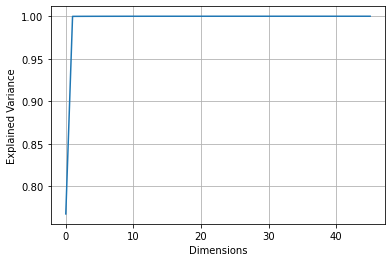

In [155]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.plot(cumsum)
str(pca.n_components_)

- I chose n_components=0.99

In [156]:
pca = PCA(n_components=0.99)
X_train_reduced=pca.fit_transform(X_train)
str(pca.n_components_)
n_pca = pca.n_components_
n_pca

2

In [157]:
pca = PCA(n_components=n_pca)
X_test_reduced=pca.fit_transform(X_test)
pca.n_components_


2

# VotingClassifier hard <br> accuracy: 0.8314657331598949

In [158]:
rnd_clf = RandomForestClassifier()
xgb_clf = XGBClassifier(verbosity = 0)
knn_clf = KNeighborsClassifier(n_neighbors=3)
dec_clf = DecisionTreeClassifier()

voting_clf_hard = VotingClassifier(
             estimators=[ ('rf', rnd_clf), ('xgb', xgb_clf), ('knn', knn_clf), ('dec', dec_clf)],
             voting='hard')

In [159]:
voting_clf_hard.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                 

In [160]:
for clf in (rnd_clf, xgb_clf, knn_clf, dec_clf, voting_clf_hard):
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.387900864223984
XGBClassifier 0.2167702306978073
KNeighborsClassifier 0.28676523105492463
DecisionTreeClassifier 0.350546389543604
VotingClassifier 0.31058495821727017


In [161]:
score_hard = cross_val_score(voting_clf_hard, X_test_reduced, y_test, cv=5).mean()
score_hard

0.8314657331598949

# VotingClassifier soft <br> accuracy: 0.8314657331598949

In [162]:
rnd_clf = RandomForestClassifier()
xgb_clf = XGBClassifier(verbosity = 0)
knn_clf = KNeighborsClassifier(n_neighbors=3)
dec_clf = DecisionTreeClassifier()

voting_clf_soft = VotingClassifier(
             estimators=[ ('rf', rnd_clf), ('xgb', xgb_clf), ('knn', knn_clf), ('dec', dec_clf)],
             voting='soft')

In [163]:
voting_clf_soft.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                 

In [164]:
for clf in ( rnd_clf, xgb_clf, knn_clf, dec_clf, voting_clf_soft):
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.3879365759588601
XGBClassifier 0.2167702306978073
KNeighborsClassifier 0.28676523105492463
DecisionTreeClassifier 0.350546389543604
VotingClassifier 0.31058495821727017


In [165]:
scores_soft = cross_val_score(voting_clf_soft, X_test_reduced, y_test, cv=5).mean()
scores_soft

0.8314657331598949

# XGBClassifier <br> accuracy: 0.9095728760170377

In [166]:
clf_xgb = XGBClassifier(verbosity = 0)
clf_xgb.fit(X_train_reduced, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [167]:
scores = cross_val_score(clf_xgb, X_test_reduced, y_test, cv=5).mean()
scores

0.9095728760170377

# Here i plot confusion matrix of the best model (XGBClassifier) and plot the accuracy in pie chart
- I didnt understand why the accuracy from cross validation is very good but the confusion matrix and f1 score very bad <br> and also why the accuracy from hard and soft voting is good in cross validation and bad itself

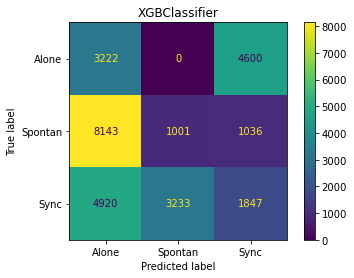

In [168]:
plot_confusion_matrix(clf_xgb.fit(X_train_reduced, y_train), X_test_reduced, y_test)
plt.title('XGBClassifier')
plt.show()

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Alone       0.33      0.51      0.40      7822
     Spontan       0.38      0.19      0.26     10180
        Sync       0.25      0.27      0.26     10000

    accuracy                           0.31     28002
   macro avg       0.32      0.33      0.31     28002
weighted avg       0.32      0.31      0.30     28002



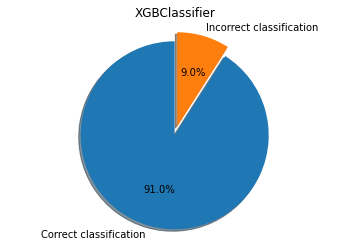

In [170]:
labels = ['Correct classification', 'Incorrect classification']
sizes = [scores.mean(), 1-scores.mean()]
explode = (0.1, 0)  # The cause of separation

fig1, ax1 = plt.subplots()
plt.title('XGBClassifier')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()